# Wikimedia Research - Translation Imbalances: Testing hypothesis #1


In this notebook we aim to find answer to research questions by interacting with the data sources relevant to it, __the related statement is__:
> Cultural context content account for a relevant portion of Wikipedia articles (7%-49%) and is less shared on average, which is causing the language imbalance on Wikipedia. Mass media-dominated content, which is more dominated by certain cultures, is more widely shared, and therefore, translated from larger and global languages more often.

__Research questions:__
- RQ 4.1.1 What type of content receives the biggest count?
- RQ. 4.1.2 What type of content receives the lowest count?

__Data sources__
- Data obtained from the APIs by language edition: https://www.mediawiki.org/wiki/API:Main_page
- Predictions of categories by article: https://www.mediawiki.org/wiki/ORES/Articletopic
- Obtain pages by Wikipedia category: https://petscan.wmflabs.org/

__Steps:__
1. Define the tool to use to get the top level categories of articles
2. Define the categories to use
3. Get pages belonging to a category (IDs)
4. Make API calls to get translation counts by page and aggregate by category
5. Explore further the groups of languages being translated and their pairs



__Concerns:__
- When comparing different articles, should be consider the source language or original language it was written in as a factor for diversity?


In [1]:
main_categories = ['Research', 'Library_science', 'Culture', 'The_arts', 'Geography', 
                   'Places', 'Health', 'Self-care', 'Health_care_occupations', 'History',
                   'Events', 'Formal_sciences','Mathematics', 'Logic', 'Mathematical_sciences',
                  'Science', 'Natural_sciences', 'Nature', 'People', 'Personal_life',
                  'Self', 'Surnames', 'Philosophy', 'Thought', 'Religion', 'Belief', 
                  'Society', 'Social_sciences', 'Technology', 'Applied_sciences']

len(main_categories)

30

In [2]:
# https://www.mediawiki.org/wiki/ORES/Articletopic
# https://ores.wikimedia.org/v3/scores/enwiki/?models=articletopic&revids=1161522245

# Tests

### 1. Define the tool to use to get the top level categories of articles




### Testing the accuracy of the articletopic model from https://ores.wikimedia.org/

- We are fetching random articles via: https://en.wikipedia.org/w/api.php?action=query&list=random&rnnamespace=0&rnlimit=10
- We get the page titles and fecth the page URL via: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Binfo
- We go to each page, check the categories at the end and estimate a list of 3-4 expected categories based on this.
- We finally build a list with all of this information.

```
{
    "batchcomplete": "",
    "continue": {
        "rncontinue": "0.141236895977|0.141238067536|13009515|0",
        "continue": "-||"
    },
    "query": {
        "random": [
            {
                "id": 60265289,
                "ns": 0,
                "title": "African Women's classification in the Cape Epic"
            },
            {
                "id": 46434099,
                "ns": 0,
                "title": "Adrien Kela"
            },
            {
                "id": 60533443,
                "ns": 0,
                "title": "Kenneth Bunn"
            },
            {
                "id": 45482666,
                "ns": 0,
                "title": "Cyrtocris fulvicornis"
            },
            {
                "id": 1808010,
                "ns": 0,
                "title": "Islwyn (UK Parliament constituency)"
            },
              {
                "id": 47284944,
                "ns": 0,
                "title": "Capanne, San Marino",
                "url": "https://en.wikipedia.org/wiki/Capanne,_San_Marino"
            },
            
            {
                "id": 28276181,
                "ns": 0,
                "title": "1988 Virginia Slims of Arizona \u2013 Singles",
                "url": "https://en.wikipedia.org/wiki/1988_Virginia_Slims_of_Arizona_%E2%80%93_Singles"
            },
            
            {
                "id": 22369872,
                "ns": 0,
                "title": "Herbert Munk",
                "url": "https://en.wikipedia.org/wiki/Herbert_Munk"
            },
            
            {
                "id": 33607623,
                "ns": 0,
                "title": "Risky Business (House)",
                "url": "https://en.wikipedia.org/wiki/Risky_Business_(House)"
            },
            
            {
                "id": 5864890,
                "ns": 0,
                "title": "Saskatchewan Glacier",
                "url": "https://en.wikipedia.org/wiki/Saskatchewan_Glacier"
            },
            
            {
                "id": 4494842,
                "ns": 0,
                "title": "Printer cable",
                "url": "https://en.wikipedia.org/wiki/Printer_cable"
            },
            
            {
                "id": 43821884,
                "ns": 0,
                "title": "James Carruthers",
                "url": "https://en.wikipedia.org/wiki/James_Carruthers"
            },
            
            {
                "id": 41505702,
                "ns": 0,
                "title": "Hammer of Heaven",
                "url": "https://en.wikipedia.org/wiki/Hammer_of_Heaven"
            },
            
            {
                "id": 70186733,
                "ns": 0,
                "title": "The Kyiv Independent",
                "url": "https://en.wikipedia.org/wiki/The_Kyiv_Independent"
            },
            
            {
                "id": 1137772,
                "ns": 0,
                "title": "State room",
                "url": "https://en.wikipedia.org/wiki/State_room"
            },
            
            {
                "id": 43640804,
                "ns": 0,
                "title": "Trials of Kirstin Lobato",
                "url": "https://en.wikipedia.org/wiki/Trials_of_Kirstin_Lobato"
            },
            
            {
                "id": 62111001,
                "ns": 0,
                "title": "Jessa Dillow Crisp",
                "url": "https://en.wikipedia.org/wiki/Jessa_Dillow_Crisp"
            },
            
            {
                "id": 30634407,
                "ns": 0,
                "title": "Mingqi",
                "url": "https://en.wikipedia.org/wiki/Mingqi"
            },
            
            {
                "id": 8238870,
                "ns": 0,
                "title": "Metronome (artists' and writers' organ)",
                "url": "https://en.wikipedia.org/wiki/Metronome_(artists%27_and_writers%27_organ)"
            },
            
            {
                "id": 9155219,
                "ns": 0,
                "title": "Richard Beauchamp, 2nd Baron Beauchamp",
                "url": "https://en.wikipedia.org/wiki/Richard_Beauchamp,_2nd_Baron_Beauchamp"
            },
            
            {
                "id": 26207504,
                "ns": 0,
                "title": "Single point of failure",
                "url": "https://en.wikipedia.org/wiki/Single_point_of_failure"
            },
            
            {
                "id": 50151305,
                "ns": 0,
                "title": "Ibrahim Al-Subaie",
                "url": "https://en.wikipedia.org/wiki/Ibrahim_Al-Subaie"
            },
            
            {
                "id": 36718302,
                "ns": 0,
                "title": "Biathlon at the 1994 Winter Olympics \u2013 Women's individual",
                "url": "https://en.wikipedia.org/wiki/Biathlon_at_the_1994_Winter_Olympics_%E2%80%93_Women%27s_individual"
            },
            
            {
                "id": 34004381,
                "ns": 0,
                "title": "Viola renifolia",
                "url": "https://en.wikipedia.org/wiki/Viola_renifolia"
            },
            
            {
                "id": 45715050,
                "ns": 0,
                "title": "LNWR 4ft 6in Tank Class",
                "url": "https://en.wikipedia.org/wiki/LNWR_4ft_6in_Tank_Class"
            },
            
            
        ]
    }
}

```

The expected results are:
1. '60265289': ['Sports', 'Africa', 'Culture']
2. '4643409': ['Biography', 'Sports', 'Women']
3. '60533443': ['Biography', 'Sports']
4. '45482666': ['STEM', 'Biology', 'Earth and environment']
5. '1808010': ['Politics', 'History', 'Geography']
6. '47284944': ['Geography', 'Europe', 'Southern Europe', 'History']
7. '28276181' : ['Sports', 'Society', 'Culture']
8. '22369872': ['Biography', 'History', 'Geography']
9. '33607623': ['Media', 'Television', 'Entertainment', 'North America']
10. '5864890': ['North America', 'Americas', 'Geography']
11. '4494842': ['STEM', 'Computing', 'Engineering']
12. '43821884': ['Biography', 'History']

In [3]:
import requests

In [4]:
## Define the expected results

random = [
    {
        "id": 60265289,
        "ns": 0,
        "title": "African Women's classification in the Cape Epic"
    },
    {
        "id": 46434099,
        "ns": 0,
        "title": "Adrien Kela"
    },
    {
        "id": 60533443,
        "ns": 0,
        "title": "Kenneth Bunn"
    },
    {
        "id": 45482666,
        "ns": 0,
        "title": "Cyrtocris fulvicornis"
    },
    {
        "id": 1808010,
        "ns": 0,
        "title": "Islwyn (UK Parliament constituency)"
    },
      {
        "id": 47284944,
        "ns": 0,
        "title": "Capanne, San Marino",
        "url": "https://en.wikipedia.org/wiki/Capanne,_San_Marino"
    },

    {
        "id": 28276181,
        "ns": 0,
        "title": "1988 Virginia Slims of Arizona \u2013 Singles",
        "url": "https://en.wikipedia.org/wiki/1988_Virginia_Slims_of_Arizona_%E2%80%93_Singles"
    },

    {
        "id": 22369872,
        "ns": 0,
        "title": "Herbert Munk",
        "url": "https://en.wikipedia.org/wiki/Herbert_Munk"
    },

    {
        "id": 33607623,
        "ns": 0,
        "title": "Risky Business (House)",
        "url": "https://en.wikipedia.org/wiki/Risky_Business_(House)"
    },

    {
        "id": 5864890,
        "ns": 0,
        "title": "Saskatchewan Glacier",
        "url": "https://en.wikipedia.org/wiki/Saskatchewan_Glacier"
    },

    {
        "id": 4494842,
        "ns": 0,
        "title": "Printer cable",
        "url": "https://en.wikipedia.org/wiki/Printer_cable"
    },

    {
        "id": 43821884,
        "ns": 0,
        "title": "James Carruthers",
        "url": "https://en.wikipedia.org/wiki/James_Carruthers"
    },

    {
        "id": 41505702,
        "ns": 0,
        "title": "Hammer of Heaven",
        "url": "https://en.wikipedia.org/wiki/Hammer_of_Heaven"
    },

    {
        "id": 70186733,
        "ns": 0,
        "title": "The Kyiv Independent",
        "url": "https://en.wikipedia.org/wiki/The_Kyiv_Independent"
    },

    {
        "id": 1137772,
        "ns": 0,
        "title": "State room",
        "url": "https://en.wikipedia.org/wiki/State_room"
    },

    {
        "id": 43640804,
        "ns": 0,
        "title": "Trials of Kirstin Lobato",
        "url": "https://en.wikipedia.org/wiki/Trials_of_Kirstin_Lobato"
    },

    {
        "id": 62111001,
        "ns": 0,
        "title": "Jessa Dillow Crisp",
        "url": "https://en.wikipedia.org/wiki/Jessa_Dillow_Crisp"
    },

    {
        "id": 30634407,
        "ns": 0,
        "title": "Mingqi",
        "url": "https://en.wikipedia.org/wiki/Mingqi"
    },

    {
        "id": 8238870,
        "ns": 0,
        "title": "Metronome (artists' and writers' organ)",
        "url": "https://en.wikipedia.org/wiki/Metronome_(artists%27_and_writers%27_organ)"
    },

    {
        "id": 9155219,
        "ns": 0,
        "title": "Richard Beauchamp, 2nd Baron Beauchamp",
        "url": "https://en.wikipedia.org/wiki/Richard_Beauchamp,_2nd_Baron_Beauchamp"
    },

    {
        "id": 26207504,
        "ns": 0,
        "title": "Single point of failure",
        "url": "https://en.wikipedia.org/wiki/Single_point_of_failure"
    },

    {
        "id": 50151305,
        "ns": 0,
        "title": "Ibrahim Al-Subaie",
        "url": "https://en.wikipedia.org/wiki/Ibrahim_Al-Subaie"
    },

    {
        "id": 36718302,
        "ns": 0,
        "title": "Biathlon at the 1994 Winter Olympics \u2013 Women's individual",
        "url": "https://en.wikipedia.org/wiki/Biathlon_at_the_1994_Winter_Olympics_%E2%80%93_Women%27s_individual"
    },

    {
        "id": 34004381,
        "ns": 0,
        "title": "Viola renifolia",
        "url": "https://en.wikipedia.org/wiki/Viola_renifolia"
    },

    {
        "id": 45715050,
        "ns": 0,
        "title": "LNWR 4ft 6in Tank Class",
        "url": "https://en.wikipedia.org/wiki/LNWR_4ft_6in_Tank_Class"
    }
]




# these are the expected categories by ID
expected_categories = {
'60265289': ['Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Culture.Biography.Women'],
'46434099': ['Culture.Biography.Biography*', 'Culture.Sports'],
'60533443': ['Culture.Biography.Biography*', 'Culture.Sports'],
'45482666': ['STEM.STEM*', 'STEM.Biology', 'STEM.Earth and environment'],
'1808010': ['History and Society.Politics and government', 'History and Society.History', 'Geography.Geographical'],
'47284944': ['Geography.Geographical', 'Geography.Regions.Europe.Europe*', 'Geography.Regions.Europe.Southern Europe', 'History and Society.History'],
'28276181' : ['Culture.Sports', 'Geography.Regions.Americas.North America*', 'Culture.Biography.Women'],
'22369872': ['Culture.Biography.Biography*', 'History and Society.History', 'Geography.Geographical'],
'33607623': ['Culture.Media.Media*', 'Culture.Media.Television', 'Culture.Media.Entertainment', 'North America'],
'5864890': ['Geography.Regions.Americas.North America', 'Geography.Regions.Americas', 'Geography.Geographical'],
'4494842': ['STEM.STEM*', 'STEM.Computing', 'STEM.Engineering'],
'43821884': ['Culture.Biography.Biography*', 'History and Society.History'],
'41505702': ['Culture.Media.Media*', 'Culture.Media.Music','Culture.Media.Radio', 'Culture.Media.Enterntainment'],
'70186733': ['Culture.Media.Media*', 'Culture.Media.Television','Culture.Internet Culture', 'Culture.Media.Enterntainment', 'History and Society.Politics and government'],
'1137772': ['History and Society.History', 'Geography.Geographical', 'Geography.Regions.Europe.Europe*', 'History and Society.Politics and government', 'Culture.Media.Media*', 'Culture.Performing arts', 'Culture.Visual arts.Visual arts*'],
'43640804': ['Culture.Biography.Women', 'History and Society.Society','History and Society.History'],
'62111001': ['Culture.Biography.Biography*', 'Culture.Media.Enterntainment', 'History and Society.History'],
'30634407': ['History and Society.History', 'Geography.Regions.Asia.Asia*', 'Geography.Regions.Asia.North Asia*', 'Culture.Visual arts.Visual arts*'],
'8238870': ['Culture.Media.Media*', 'Culture.Visual arts.Visual arts*'],
'9155219': ['Culture.Biography.Biography*','Geography.Regions.Europe.Europe*'],
'26207504': ['STEM.STEM*', 'STEM.Engineering', 'STEM.Computing', 'STEM.Technology'],
'50151305': ['Culture.Biography.Biography*', 'History and Society.History','Culture.Sports'],
'36718302': ['Culture.Sports', 'Culture.Biography.Women'],
'34004381': ['Geography.Geographical', 'STEM.Biology', 'STEM.Earth and Environment'],
'45715050': ['History and Society.History', 'STEM.STEM*', 'STEM.Engineering', 'History and Society.Transportation'],
    
}

expected_categories

{'60265289': ['Culture.Sports',
  'Geography.Regions.Africa.Africa*',
  'Culture.Biography.Women'],
 '46434099': ['Culture.Biography.Biography*', 'Culture.Sports'],
 '60533443': ['Culture.Biography.Biography*', 'Culture.Sports'],
 '45482666': ['STEM.STEM*', 'STEM.Biology', 'STEM.Earth and environment'],
 '1808010': ['History and Society.Politics and government',
  'History and Society.History',
  'Geography.Geographical'],
 '47284944': ['Geography.Geographical',
  'Geography.Regions.Europe.Europe*',
  'Geography.Regions.Europe.Southern Europe',
  'History and Society.History'],
 '28276181': ['Culture.Sports',
  'Geography.Regions.Americas.North America*',
  'Culture.Biography.Women'],
 '22369872': ['Culture.Biography.Biography*',
  'History and Society.History',
  'Geography.Geographical'],
 '33607623': ['Culture.Media.Media*',
  'Culture.Media.Television',
  'Culture.Media.Entertainment',
  'North America'],
 '5864890': ['Geography.Regions.Americas.North America',
  'Geography.Regions

In [5]:
## Process both results and merge togethers

articles_cat_merged = {}
titles = []

# for each item in the random list
for art in random:
    # get the id
    id_ = str(art['id'])
    article_cat_new = {'id': id_}
    article_cat_new['title'] = art['title'] 
    article_cat_new['expected_cat'] = expected_categories[id_]
    titles.append(art['title'])
    
    # set it
    articles_cat_merged[id_] = article_cat_new
    
articles_cat_merged

{'60265289': {'id': '60265289',
  'title': "African Women's classification in the Cape Epic",
  'expected_cat': ['Culture.Sports',
   'Geography.Regions.Africa.Africa*',
   'Culture.Biography.Women']},
 '46434099': {'id': '46434099',
  'title': 'Adrien Kela',
  'expected_cat': ['Culture.Biography.Biography*', 'Culture.Sports']},
 '60533443': {'id': '60533443',
  'title': 'Kenneth Bunn',
  'expected_cat': ['Culture.Biography.Biography*', 'Culture.Sports']},
 '45482666': {'id': '45482666',
  'title': 'Cyrtocris fulvicornis',
  'expected_cat': ['STEM.STEM*',
   'STEM.Biology',
   'STEM.Earth and environment']},
 '1808010': {'id': '1808010',
  'title': 'Islwyn (UK Parliament constituency)',
  'expected_cat': ['History and Society.Politics and government',
   'History and Society.History',
   'Geography.Geographical']},
 '47284944': {'id': '47284944',
  'title': 'Capanne, San Marino',
  'expected_cat': ['Geography.Geographical',
   'Geography.Regions.Europe.Europe*',
   'Geography.Regions.E

In [6]:
## Get last revision ID

revisions = {}

titles_str = "|".join(titles)   
url = f"https://en.wikipedia.org/w/api.php?action=query&prop=revisions&titles={titles_str}&rvprop=ids&format=json"

# Making a GET request
response = requests.get(url)
# See status code
status = response.status_code
res = response.json()

if status == 200:
    # process the results
    display(res)
    page_results = res['query']['pages']
    
    ids = list(articles_cat_merged.keys())
    # revisions - page id
    revisions_pages = {}
    for id_ in ids:
        page = page_results[id_] 
        revision_id = page['revisions'][-1]
        revisions_pages[id_] =  str(revision_id['revid'])
        
revisions_pages
    

{'batchcomplete': '',
 'query': {'pages': {'28276181': {'pageid': 28276181,
    'ns': 0,
    'title': '1988 Virginia Slims of Arizona – Singles',
    'revisions': [{'revid': 1097360621, 'parentid': 1083563900}]},
   '46434099': {'pageid': 46434099,
    'ns': 0,
    'title': 'Adrien Kela',
    'revisions': [{'revid': 1131896564, 'parentid': 885948410}]},
   '60265289': {'pageid': 60265289,
    'ns': 0,
    'title': "African Women's classification in the Cape Epic",
    'revisions': [{'revid': 1074183937, 'parentid': 995883150}]},
   '36718302': {'pageid': 36718302,
    'ns': 0,
    'title': "Biathlon at the 1994 Winter Olympics – Women's individual",
    'revisions': [{'revid': 1114685840, 'parentid': 1072599705}]},
   '47284944': {'pageid': 47284944,
    'ns': 0,
    'title': 'Capanne, San Marino',
    'revisions': [{'revid': 1099758502, 'parentid': 881640249}]},
   '45482666': {'pageid': 45482666,
    'ns': 0,
    'title': 'Cyrtocris fulvicornis',
    'revisions': [{'revid': 104560579

{'60265289': '1074183937',
 '46434099': '1131896564',
 '60533443': '1080503608',
 '45482666': '1045605798',
 '1808010': '1162679033',
 '47284944': '1099758502',
 '28276181': '1097360621',
 '22369872': '1140978713',
 '33607623': '1095806953',
 '5864890': '1114491070',
 '4494842': '844125533',
 '43821884': '1089350121',
 '41505702': '997006968',
 '70186733': '1163151823',
 '1137772': '1112910754',
 '43640804': '1154572734',
 '62111001': '1143997655',
 '30634407': '1158345780',
 '8238870': '1133609915',
 '9155219': '1156496402',
 '26207504': '1144873299',
 '50151305': '1155281273',
 '36718302': '1114685840',
 '34004381': '1013874582',
 '45715050': '1118005998'}

In [7]:
## Get the results

list_revi = list(revisions_pages.values())

revisions_list = "|".join(list_revi)
url = f"https://ores.wikimedia.org/v3/scores/enwiki/?models=articletopic&revids={revisions_list}"

# Making a GET request
response = requests.get(url)
# See status code
print(response.status_code)

results_revisions = response.json()['enwiki']['scores']
results_revisions

200


{'1013874582': {'articletopic': {'score': {'prediction': ['STEM.Biology',
     'STEM.STEM*'],
    'probability': {'Culture.Biography.Biography*': 0.0031084317166924823,
     'Culture.Biography.Women': 0.0009803049121985946,
     'Culture.Food and drink': 0.09242336852454172,
     'Culture.Internet culture': 0.0008515363091863077,
     'Culture.Linguistics': 0.00043891420619759344,
     'Culture.Literature': 0.0017456126108263857,
     'Culture.Media.Books': 0.0004604924985425731,
     'Culture.Media.Entertainment': 0.0004764972955101787,
     'Culture.Media.Films': 0.0001387873874122645,
     'Culture.Media.Media*': 0.0027164223946625566,
     'Culture.Media.Music': 9.759401349092416e-05,
     'Culture.Media.Radio': 2.5379689320860085e-05,
     'Culture.Media.Software': 0.0009201269892380221,
     'Culture.Media.Television': 0.00014731442291482467,
     'Culture.Media.Video games': 2.4675836900989654e-05,
     'Culture.Performing arts': 0.00016681160955285787,
     'Culture.Philosophy 

In [8]:
## Compare the expected results with the actual results
passes = 0
total_size = len(articles_cat_merged)

for page_id in revisions_pages:
    revision_id = revisions_pages[page_id]
    item = articles_cat_merged[page_id]
    # get the predicted categories and expected categories
    actual_results = results_revisions[revision_id]['articletopic']['score']['prediction']
    expected_results = item['expected_cat']
    
    
    # compare results by checking for common items
    print(f'\n\nCOMPARING FOR {page_id} with title <<{item["title"]}>>')
    print(f'\nEXPECTED RESULTS: {expected_results} \nACTUAL RESULTS:{actual_results}')
    intersect = list(set(actual_results).intersection(expected_results))
    
    if intersect:
        passes +=1
        print(f'The article with the id {page_id} got exactly {len(intersect)} match(es) in the predicted results list')
        print(f'Status: {passes} passes out of {total_size}')
        
print(f'\n\nFinal result is: {(passes/total_size)*100}%')



COMPARING FOR 60265289 with title <<African Women's classification in the Cape Epic>>

EXPECTED RESULTS: ['Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Culture.Biography.Women'] 
ACTUAL RESULTS:['Culture.Biography.Biography*', 'Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Geography.Regions.Africa.Southern Africa']
The article with the id 60265289 got exactly 2 match(es) in the predicted results list
Status: 1 passes out of 25


COMPARING FOR 46434099 with title <<Adrien Kela>>

EXPECTED RESULTS: ['Culture.Biography.Biography*', 'Culture.Sports'] 
ACTUAL RESULTS:['Culture.Sports', 'Geography.Regions.Oceania']
The article with the id 46434099 got exactly 1 match(es) in the predicted results list
Status: 2 passes out of 25


COMPARING FOR 60533443 with title <<Kenneth Bunn>>

EXPECTED RESULTS: ['Culture.Biography.Biography*', 'Culture.Sports'] 
ACTUAL RESULTS:['Culture.Biography.Biography*', 'Culture.Sports']
The article with the id 60533443 got exactly 2 match(es) in 

#### Supported languages

The supported languages are:
    - Czech
    - Korean
    - Vietnamese
    - Arabic
    - English
   
Notes:
- The results are still in English.
    
__Reference:__ https://ores-support-checklist.toolforge.org/

In [9]:
# Example of making a call with the cswiki (Czech)
ress = '22814052|22376572|22897051'
url = f"https://ores.wikimedia.org/v3/scores/cswiki/?models=articletopic&revids={ress}"

# Making a GET request
response = requests.get(url)
# See status code
print(response.status_code)

response.json()

200


{'cswiki': {'models': {'articletopic': {'version': '1.3.0'}},
  'scores': {'22376572': {'articletopic': {'score': {'prediction': ['Geography.Regions.Europe.Europe*',
       'History and Society.Military and warfare'],
      'probability': {'Culture.Biography.Biography*': 0.01734748973809565,
       'Culture.Biography.Women': 0.0008734782494353318,
       'Culture.Food and drink': 0.0033172337587473815,
       'Culture.Internet culture': 0.002627588131218483,
       'Culture.Linguistics': 0.009228339218182077,
       'Culture.Literature': 0.009496513305451145,
       'Culture.Media.Books': 0.002958332982475919,
       'Culture.Media.Entertainment': 0.002551308152631748,
       'Culture.Media.Films': 0.0005026620955611899,
       'Culture.Media.Media*': 0.021011287679556106,
       'Culture.Media.Music': 0.0004497918260572899,
       'Culture.Media.Radio': 0.00019531415828545804,
       'Culture.Media.Software': 0.0012731117686133658,
       'Culture.Media.Television': 0.0006339708230484

# Implementation

### 2. Define categories to use

In [1]:
## Get categories list and mappers by layers
import os
import yaml

directory = 'data/input/categories/taxonomy'
# corresponds to the top level categories [1st layer]
layer_cat_1st = []
# corresponds to the immediate inner categories after the top level categories [2nd layer]
layer_cat_2nd = {}
# correspond to the innermost categories after the inner categories [3rd layer]
layer_cat_3rd = {}

# iterate over each file to get all levels
for filename in os.listdir(directory):
    if filename.endswith(".yaml"):
        for top_cat, categories in yaml.safe_load(open(f'{directory}/{filename}')).items():
            # 1st layer
            layer_cat_1st.append(top_cat) 
            # 2nd layer
            layer_cat_2nd[top_cat] = list(categories.keys())
            # 3rd layer
            for cat, inner_cat in categories.items():
                if isinstance(inner_cat, dict):
                    layer_cat_3rd[cat] = list(inner_cat.keys())
                
    else:
        continue
# TODO: save results via Adam's libraries        
display("1ST LAYER:", layer_cat_1st )
display("2ND LAYER:", layer_cat_2nd )
display("3RD LAYER:", layer_cat_3rd )

'1ST LAYER:'

['Culture', 'Geography', 'History and Society', 'STEM']

'2ND LAYER:'

{'Culture': ['Biography',
  'Food and drink',
  'Internet culture',
  'Linguistics',
  'Literature',
  'Media',
  'Performing arts',
  'Philosophy and religion',
  'Sports',
  'Visual arts'],
 'Geography': ['Geographical', 'Regions'],
 'History and Society': ['History',
  'Society',
  'Business and economics',
  'Education',
  'Military and warfare',
  'Politics and government',
  'Transportation'],
 'STEM': ['STEM*',
  'Biology',
  'Chemistry',
  'Engineering',
  'Earth and environment',
  'Libraries & Information',
  'Computing',
  'Mathematics',
  'Medicine & Health',
  'Physics',
  'Space',
  'Technology']}

'3RD LAYER:'

{'Biography': ['Biography*', 'Women'],
 'Media': ['Media*',
  'Entertainment',
  'Music',
  'Films',
  'Books',
  'Radio',
  'Television',
  'Video games',
  'Software'],
 'Visual arts': ['Visual arts*',
  'Architecture',
  'Comics and Anime',
  'Fashion'],
 'Regions': ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']}

### 3. Get pages belonging to a category (IDs)

#### Steps:

- Given a top level category, get the immediate subcategories via:
    https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bcategorymembers
- Fetch the pages count for each and aggregate to find the total page count: 
    https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bcategoryinfo
- Calculate the ideal sample dsize. 
        

### English

In [2]:
## Map categories with the topics of the ORES model to retrieve pages
# to verify existence (manually) https://en.wikipedia.org/wiki/Special:CategoryTree

'''
__1st layer__
NOTES: it becomes problematic as some categories are too broad (i.e. STEM...) for the retrieval. 
To avoid losing/exclusing important info, we will start the research with the second layers and
group the results to analyze the first.
'''


layer_cat_2nd_prepare = layer_cat_2nd.copy()

# We have created a list that includes categories that are equivalent to the original but exist in the wiki
# STEM
layer_cat_2nd_prepare['STEM'] =  ['Biology','Chemistry','Engineering','Earth', 'Environmental science', 'Libraries',
                                  'Information', 'Computing','Mathematics', 'Medicine', 'Health','Physics',
                                  'Space','Technology']
# Culture
# Biography: ('Living People', 'Dead People')
layer_cat_2nd_prepare['Culture'] = ['Living People', 'Dead People' 'Food and drink', 'Internet culture', 'Linguistics',
                                  'Literature', 'Mass media', 'Performing arts', 'Philosophy', 'Religion', 'Sports', 'Visual arts']
# Geography
layer_cat_2nd_prepare['Geography'] = ['Geography', 'Regions']

# History and Society
layer_cat_2nd_prepare['History and Society'] = ['History', 'Society', 'Business', 'Economics', 'Education',
                                      'Military', 'War', 'Politics', 'Government', 'Transport']

### Czech

In [ ]:
## Map categories with the topics of the ORES model to retrieve pages
# to verify existence (manually) https://cs.wikipedia.org/w/index.php?title=Speci%C3%A1ln%C3%AD:Strom_kategori%C3%AD



layer_cat_2nd_prepare = layer_cat_2nd.copy()

# We have created a list that includes categories that are equivalent to the original but exist in the wiki
# STEM
layer_cat_2nd_prepare['STEM'] =  ['Biologie','Chemie','Inženýrství','Země', 'životní prostředí', 'Knihovny',
                                  'Informace', 'Informatics','Matematika', 'Lékařství', 'Zdraví','Fyzika',
                                  'Prostor','Technika']
# Culture
# Biography: ('Living People', 'Dead People')
layer_cat_2nd_prepare['Culture'] = ['Lidé' 'Gastronomie', 'Internetová kultura', 'Lingvistika',
                                  'Literatura', 'Masmédia', 'Umělci_múzických_umění', 'Filozofie', 'Náboženství', 'Sport', 'Výtvarné umění']
# Geography
layer_cat_2nd_prepare['Geography'] = ['Geografie', 'Regiony']

# History and Society
layer_cat_2nd_prepare['History and Society'] = ['Historie', 'Společnost', 'Podnikání', 'Ekonomika', 'Vzdělávání',
                                      'Vojenství', 'Válečné_lodě', 'Politika', 'Vláda', 'Doprava']

### Vietnamese

On defining the ideal sample size for the analysis:

__Parameters:__
- Confidence level: 95%
- Margin of error: 5-3%. We will initially start with 3% and expand to 3%

__References:__ 
 - https://www.surveymonkey.com/mp/sample-size-calculator/
 - https://tools4dev.org/resources/how-to-choose-a-samplesize/#:~:text=Most%20statisticians%20agree%20that%20the,to%20survey%20all%20of%20them.

In [3]:
## API call to get subcategories

In [4]:
## API call to get counts

In [5]:
## Define ideal count for each category and retrieve pages




### 4. Make API calls to get translation counts by page and aggregate by category

We are using the tool PetScan: https://petscan.wmflabs.org/

- Input category and query the results. 
- Save the results in CSV format.
- Make API call to get the translation counts per page.
- Create a new dataset from results.

In [6]:
## Import libraries
import csv
import os
import pandas as pd
import requests

In [7]:
## iterate over each file to collect all data

directory = 'data/input/categories/pages-ids'

categories_2nd_mapper = {}
cat_count = 0

# TODO: use the cache function to save these results to files since they are relatively static
for filename in os.listdir(directory):
    
    if filename.endswith(".csv"):
        cat_count += 1
        wiki_lang = filename.split('-')[0]
        filename_cat = filename.split('-')[1].capitalize()
       
        with open(f'{directory}/{filename}', mode='r', encoding="utf8") as csv_file:
            # read as a dictionary
            csv_reader = csv.DictReader(csv_file)    
               
            row_count = 0
            for row in csv_reader:
                row_count += 1
                row['langs_count'] = None
                row['category'] = filename_cat
                row['wiki_lang'] = wiki_lang
                page_title = row['title'].replace('_', ' ') # Consider removing the _ with ' '
                categories_2nd_mapper[page_title] = row
                
            # we are printing this count to help reference the (rough) expected number of counts
            print(f"ROW COUNT: {row_count} -- CATEGORY {filename_cat}")
# out
print(f"\nCATEGORIES COUNT: {cat_count}")
print(f"NUMBER OF UNIQUE PAGE TITLES: {len(list(categories_2nd_mapper.keys()))}")

ROW COUNT: 387 -- CATEGORY Biography
ROW COUNT: 385 -- CATEGORY Biology
ROW COUNT: 385 -- CATEGORY Business
ROW COUNT: 385 -- CATEGORY Chemistry
ROW COUNT: 385 -- CATEGORY Computing
ROW COUNT: 385 -- CATEGORY Earth
ROW COUNT: 385 -- CATEGORY Economic
ROW COUNT: 385 -- CATEGORY Education
ROW COUNT: 385 -- CATEGORY Engineering
ROW COUNT: 385 -- CATEGORY Environment
ROW COUNT: 385 -- CATEGORY Food and drink
ROW COUNT: 385 -- CATEGORY Geography
ROW COUNT: 385 -- CATEGORY Government
ROW COUNT: 385 -- CATEGORY Health
ROW COUNT: 385 -- CATEGORY History
ROW COUNT: 385 -- CATEGORY Libraries
ROW COUNT: 385 -- CATEGORY Linguistics
ROW COUNT: 385 -- CATEGORY Literature
ROW COUNT: 385 -- CATEGORY Mathematics
ROW COUNT: 385 -- CATEGORY Media
ROW COUNT: 385 -- CATEGORY Medicine
ROW COUNT: 385 -- CATEGORY Military
ROW COUNT: 385 -- CATEGORY Performing arts
ROW COUNT: 385 -- CATEGORY Philosophy
ROW COUNT: 385 -- CATEGORY Physics
ROW COUNT: 385 -- CATEGORY Politics
ROW COUNT: 385 -- CATEGORY Regions
ROW

In [8]:
page_titles = list(categories_2nd_mapper.keys())
len(page_titles)

12117

In [9]:
## Get count for all pages


# Reference: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Blanglinkscount
import traceback
from time import sleep

from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# general
result_pages_counts = []
page_titles = list(categories_2nd_mapper.keys())
# TODO: extend the 'lang' to more languages
lang = 'en'

# set requests parameters to retry on 'Max retries exceeded with url' and have enough wait time between exceptions
session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('https://', adapter)

# used to track call number
api_call_number = 0

# initialize
slice_start = -50
slice_end = 0
titles_len = len(page_titles)


while (slice_end < titles_len):
    try:
        # check to update slice values
        slice_start = slice_start + 50 
        slice_end =  slice_end + 50 
            
        print('\n\n\n')
        print(f"PAGE TITLE GROUP {page_titles[:5]}...")
        # work with page titles batches that make request per 50 titles within a user language group
        titles_l = page_titles[slice_start:slice_end]
        titles =  "|".join(titles_l)
        url = f'https://{lang}.wikipedia.org/w/api.php?action=query&prop=langlinkscount&titles={titles}&format=json'  

        # GET request
        response = session.get(url)
        print(f'\nResponse:  {response.json()}')
        
        if response.status_code != 200:
            raise Exception(f"The call failed: {response.status_code}")

        else:
            # See request JSON
            res = response.json()
            
            if res.get('query'):
                # save results to dictionary to process later
                res = res['query']['pages']
                result_pages_counts.append(res)


                api_call_number += 1
                print(f'\n\nPROGRESS: {slice_start}-{slice_end} \n\nCALL NUMBER: {api_call_number}')
            else: 
                raise Exception(res.get("error"))
            
    
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    
    except Exception as e:
        print(e)
        traceback.print_exc()
      






PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'16973645': {'pageid': 16973645, 'ns': 0, 'title': 'Amanda Oliveira', 'langlinkscount': 4}, '50693975': {'pageid': 50693975, 'ns': 0, 'title': 'Andreas Altmann', 'langlinkscount': 3}, '70851081': {'pageid': 70851081, 'ns': 0, 'title': 'Andrey Svintsov', 'langlinkscount': 1}, '3420968': {'pageid': 3420968, 'ns': 0, 'title': 'Andy Greenwald', 'langlinkscount': 3}, '63716335': {'pageid': 63716335, 'ns': 0, 'title': 'Anthi Papakonstantinou'}, '7338292': {'pageid': 7338292, 'ns': 0, 'title': 'Beaumont Hannant'}, '55989933': {'pageid': 55989933, 'ns': 0, 'title': 'Candela Andújar', 'langlinkscount': 6}, '58379856': {'pageid': 58379856, 'ns': 0, 'title': 'Carlos Tábora', 'langlinkscount': 2}, '31887064': {'pageid': 31887064, 'ns': 0, 'title': 'Chang Hyuk-jin', 'langlinkscount': 4}, '51407250': {'pageid': 5140725


Response:  {'batchcomplete': '', 'query': {'pages': {'17694959': {'pageid': 17694959, 'ns': 0, 'title': 'Alexis Danelón', 'langlinkscount': 4}, '26426830': {'pageid': 26426830, 'ns': 0, 'title': 'Alfie Joey'}, '60206707': {'pageid': 60206707, 'ns': 0, 'title': 'Barbara Hernandez', 'langlinkscount': 1}, '38820987': {'pageid': 38820987, 'ns': 0, 'title': 'Ben George', 'langlinkscount': 3}, '24899336': {'pageid': 24899336, 'ns': 0, 'title': 'Carol Joyce', 'langlinkscount': 1}, '35563146': {'pageid': 35563146, 'ns': 0, 'title': 'Cathy Chedal', 'langlinkscount': 6}, '3791085': {'pageid': 3791085, 'ns': 0, 'title': 'Cynthia Leonard', 'langlinkscount': 1}, '8722075': {'pageid': 8722075, 'ns': 0, 'title': 'Daniel Vaillant', 'langlinkscount': 7}, '3611411': {'pageid': 3611411, 'ns': 0, 'title': 'Darryll Lewis', 'langlinkscount': 2}, '2522121': {'pageid': 2522121, 'ns': 0, 'title': 'Denis Betts', 'langlinkscount': 3}, '11084640': {'pageid': 11084640, 'ns': 0, 'title': "Dhaffer L'Abidine", 'lang


Response:  {'batchcomplete': '', 'query': {'pages': {'3904630': {'pageid': 3904630, 'ns': 0, 'title': 'Aaron Fiora'}, '46308105': {'pageid': 46308105, 'ns': 0, 'title': 'Albina Rrahmani', 'langlinkscount': 4}, '1882022': {'pageid': 1882022, 'ns': 0, 'title': 'Alex Barron (American football)', 'langlinkscount': 3}, '57218535': {'pageid': 57218535, 'ns': 0, 'title': 'Alfred Bailey (Australian cricketer)', 'langlinkscount': 2}, '5788402': {'pageid': 5788402, 'ns': 0, 'title': 'Allison Balson', 'langlinkscount': 8}, '7006131': {'pageid': 7006131, 'ns': 0, 'title': 'Balthazar Armas'}, '2074972': {'pageid': 2074972, 'ns': 0, 'title': 'Bertrand Serlet', 'langlinkscount': 8}, '46533413': {'pageid': 46533413, 'ns': 0, 'title': 'Bianca Sánchez', 'langlinkscount': 5}, '2557867': {'pageid': 2557867, 'ns': 0, 'title': 'Boris Mikhailov (ice hockey)', 'langlinkscount': 22}, '39346919': {'pageid': 39346919, 'ns': 0, 'title': 'Boseko Lokombo', 'langlinkscount': 1}, '58565091': {'pageid': 58565091, 'ns


Response:  {'batchcomplete': '', 'query': {'pages': {'38713452': {'pageid': 38713452, 'ns': 0, 'title': 'Aki Thomas', 'langlinkscount': 1}, '33547445': {'pageid': 33547445, 'ns': 0, 'title': 'Alex Richards (journalist)'}, '2325155': {'pageid': 2325155, 'ns': 0, 'title': 'Alexander Yakovlev (diplomat)'}, '23508757': {'pageid': 23508757, 'ns': 0, 'title': 'Andreas Renschler', 'langlinkscount': 3}, '60499403': {'pageid': 60499403, 'ns': 0, 'title': 'Andy Fleming (activist)'}, '38392196': {'pageid': 38392196, 'ns': 0, 'title': 'Ari Taub (wrestler)', 'langlinkscount': 3}, '40107891': {'pageid': 40107891, 'ns': 0, 'title': 'Brandon Estrada'}, '25478576': {'pageid': 25478576, 'ns': 0, 'title': 'Brian Watts (ice hockey)', 'langlinkscount': 3}, '19347278': {'pageid': 19347278, 'ns': 0, 'title': 'Charlie Fellows (rugby union)'}, '3604846': {'pageid': 3604846, 'ns': 0, 'title': "Dan O'Brien (baseball executive)"}, '38698902': {'pageid': 38698902, 'ns': 0, 'title': 'Daniel Bednárik', 'langlinksco


Response:  {'batchcomplete': '', 'query': {'pages': {'2853': {'pageid': 2853, 'ns': 0, 'title': 'Aberdeen Bestiary', 'langlinkscount': 10}, '2250': {'pageid': 2250, 'ns': 0, 'title': 'Abiotic stress', 'langlinkscount': 6}, '1437': {'pageid': 1437, 'ns': 0, 'title': 'Abraxas', 'langlinkscount': 39}, '1908': {'pageid': 1908, 'ns': 0, 'title': 'Abzyme', 'langlinkscount': 17}, '1537': {'pageid': 1537, 'ns': 0, 'title': 'Acupuncture', 'langlinkscount': 86}, '1909': {'pageid': 1909, 'ns': 0, 'title': 'Adaptive radiation', 'langlinkscount': 46}, '1800': {'pageid': 1800, 'ns': 0, 'title': 'Adenosine triphosphate', 'langlinkscount': 79}, '2528': {'pageid': 2528, 'ns': 0, 'title': 'Adenylyl cyclase', 'langlinkscount': 30}, '2661': {'pageid': 2661, 'ns': 0, 'title': 'Affection', 'langlinkscount': 30}, '1910': {'pageid': 1910, 'ns': 0, 'title': 'Agarose gel electrophoresis', 'langlinkscount': 10}, '2547': {'pageid': 2547, 'ns': 0, 'title': 'Agent Orange', 'langlinkscount': 41}, '1208': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'6201': {'pageid': 6201, 'ns': 0, 'title': 'CITES', 'langlinkscount': 57}, '7120': {'pageid': 7120, 'ns': 0, 'title': 'Calreticulin', 'langlinkscount': 10}, '6446': {'pageid': 6446, 'ns': 0, 'title': 'Camouflage', 'langlinkscount': 56}, '7038': {'pageid': 7038, 'ns': 0, 'title': 'Candidiasis', 'langlinkscount': 48}, '6641': {'pageid': 6641, 'ns': 0, 'title': 'Cane toad', 'langlinkscount': 49}, '6344': {'pageid': 6344, 'ns': 0, 'title': 'Capsid', 'langlinkscount': 39}, '6824': {'pageid': 6824, 'ns': 0, 'title': 'Carl Sagan', 'langlinkscount': 97}, '6543': {'pageid': 6543, 'ns': 0, 'title': 'Carnivore', 'langlinkscount': 86}, '6678': {'pageid': 6678, 'ns': 0, 'title': 'Cat', 'langlinkscount': 256}, '6979': {'pageid': 6979, 'ns': 0, 'title': 'Cell Cycle', 'langlinkscount': 1}, '6339': {'pageid': 6339, 'ns': 0, 'title': 'Cell biology', 'langlinkscount': 84}, '7252': {'pageid': 7252, 'ns': 0, 'title': 'Cell cycle', 'langlinkscount': 58},


Response:  {'batchcomplete': '', 'query': {'pages': {'11994': {'pageid': 11994, 'ns': 0, 'title': 'Destroy All Monsters', 'langlinkscount': 17}, '10313': {'pageid': 10313, 'ns': 0, 'title': 'E. O. Wilson', 'langlinkscount': 51}, '10340': {'pageid': 10340, 'ns': 0, 'title': 'Ecdysis', 'langlinkscount': 27}, '9971': {'pageid': 9971, 'ns': 0, 'title': 'Eden Project', 'langlinkscount': 27}, '9730': {'pageid': 9730, 'ns': 0, 'title': 'Electron microscope', 'langlinkscount': 74}, '10273': {'pageid': 10273, 'ns': 0, 'title': 'Embryo drawing', 'langlinkscount': 3}, '10116': {'pageid': 10116, 'ns': 0, 'title': 'Endocytosis', 'langlinkscount': 45}, '9927': {'pageid': 9927, 'ns': 0, 'title': 'Endomembrane system', 'langlinkscount': 20}, '10286': {'pageid': 10286, 'ns': 0, 'title': 'Enver Hoxha', 'langlinkscount': 81}, '9944': {'pageid': 9944, 'ns': 0, 'title': 'Episome', 'langlinkscount': 8}, '10048': {'pageid': 10048, 'ns': 0, 'title': 'Ethanol', 'langlinkscount': 112}, '9737': {'pageid': 9737,


Response:  {'batchcomplete': '', 'query': {'pages': {'15235': {'pageid': 15235, 'ns': 0, 'title': 'Genomic imprinting', 'langlinkscount': 30}, '14384': {'pageid': 14384, 'ns': 0, 'title': 'HAL 9000', 'langlinkscount': 32}, '14374': {'pageid': 14374, 'ns': 0, 'title': 'Haematopoiesis', 'langlinkscount': 44}, '14348': {'pageid': 14348, 'ns': 0, 'title': 'Homo habilis', 'langlinkscount': 80}, '14403': {'pageid': 14403, 'ns': 0, 'title': 'Hydrogen peroxide', 'langlinkscount': 71}, '15514': {'pageid': 15514, 'ns': 0, 'title': 'Iblis', 'langlinkscount': 55}, '14631': {'pageid': 14631, 'ns': 0, 'title': 'Immanuel Kant', 'langlinkscount': 170}, '14958': {'pageid': 14958, 'ns': 0, 'title': 'Immune system', 'langlinkscount': 110}, '15188': {'pageid': 15188, 'ns': 0, 'title': 'In vitro', 'langlinkscount': 45}, '15187': {'pageid': 15187, 'ns': 0, 'title': 'In vivo', 'langlinkscount': 43}, '15018': {'pageid': 15018, 'ns': 0, 'title': 'Infusoria', 'langlinkscount': 22}, '14895': {'pageid': 14895, '


Response:  {'batchcomplete': '', 'query': {'pages': {'13593670': {'pageid': 13593670, 'ns': 0, 'title': 'ABC analysis', 'langlinkscount': 21}, '9605489': {'pageid': 9605489, 'ns': 0, 'title': 'Acuity Brands', 'langlinkscount': 3}, '30858021': {'pageid': 30858021, 'ns': 0, 'title': 'Apache OpenEJB', 'langlinkscount': 2}, '65393931': {'pageid': 65393931, 'ns': 0, 'title': 'Art gallery', 'langlinkscount': 29}, '12770471': {'pageid': 12770471, 'ns': 0, 'title': 'Beneficial interest'}, '36526': {'pageid': 36526, 'ns': 0, 'title': 'Cartel', 'langlinkscount': 51}, '73941859': {'pageid': 73941859, 'ns': 0, 'title': 'Challenge (Moroccan magazine)', 'langlinkscount': 2}, '67208515': {'pageid': 67208515, 'ns': 0, 'title': 'Chambers Ireland'}, '21699187': {'pageid': 21699187, 'ns': 0, 'title': 'Chief business development officer', 'langlinkscount': 1}, '18751478': {'pageid': 18751478, 'ns': 0, 'title': 'Chocolatier (video game)', 'langlinkscount': 2}, '58520578': {'pageid': 58520578, 'ns': 0, 'ti


Response:  {'batchcomplete': '', 'query': {'pages': {'2475816': {'pageid': 2475816, 'ns': 0, 'title': 'Bankruptcy discharge'}, '22999010': {'pageid': 22999010, 'ns': 0, 'title': 'Blockage discount'}, '29053639': {'pageid': 29053639, 'ns': 0, 'title': 'Bonita BPM', 'langlinkscount': 4}, '27416186': {'pageid': 27416186, 'ns': 0, 'title': 'Business Games'}, '2778933': {'pageid': 2778933, 'ns': 0, 'title': 'Business broker', 'langlinkscount': 22}, '1943968': {'pageid': 1943968, 'ns': 0, 'title': 'Cativa process', 'langlinkscount': 10}, '17787113': {'pageid': 17787113, 'ns': 0, 'title': 'Cellana (company)', 'langlinkscount': 1}, '57067601': {'pageid': 57067601, 'ns': 0, 'title': 'CloverWorks', 'langlinkscount': 21}, '99656': {'pageid': 99656, 'ns': 0, 'title': 'Creative destruction', 'langlinkscount': 26}, '12894259': {'pageid': 12894259, 'ns': 0, 'title': 'Côte des Landes'}, '1753454': {'pageid': 1753454, 'ns': 0, 'title': 'Dividend imputation', 'langlinkscount': 3}, '25654353': {'pageid'


Response:  {'batchcomplete': '', 'query': {'pages': {'1991706': {'pageid': 1991706, 'ns': 0, 'title': 'AMC Networks', 'langlinkscount': 11}, '74049118': {'pageid': 74049118, 'ns': 0, 'title': 'Anurag Batra'}, '2601548': {'pageid': 2601548, 'ns': 0, 'title': 'Arts centre', 'langlinkscount': 6}, '26176094': {'pageid': 26176094, 'ns': 0, 'title': 'Brand tribalism', 'langlinkscount': 1}, '14310639': {'pageid': 14310639, 'ns': 0, 'title': 'Broadwater Energy'}, '2412077': {'pageid': 2412077, 'ns': 0, 'title': 'Byssinosis', 'langlinkscount': 11}, '13439956': {'pageid': 13439956, 'ns': 0, 'title': 'Centro, Montevideo', 'langlinkscount': 6}, '23154038': {'pageid': 23154038, 'ns': 0, 'title': 'Channel coordination', 'langlinkscount': 1}, '28632367': {'pageid': 28632367, 'ns': 0, 'title': 'Chief innovation officer'}, '49597315': {'pageid': 49597315, 'ns': 0, 'title': 'Computer bureau', 'langlinkscount': 2}, '21087074': {'pageid': 21087074, 'ns': 0, 'title': 'Curtain coating', 'langlinkscount': 2


Response:  {'batchcomplete': '', 'query': {'pages': {'4260439': {'pageid': 4260439, 'ns': 0, 'title': '24SevenOffice', 'langlinkscount': 6}, '37785040': {'pageid': 37785040, 'ns': 0, 'title': 'Abandonment rate'}, '27429367': {'pageid': 27429367, 'ns': 0, 'title': 'Bavarian Auto Group', 'langlinkscount': 5}, '35004392': {'pageid': 35004392, 'ns': 0, 'title': 'British Estonian Chamber of Commerce', 'langlinkscount': 1}, '51081465': {'pageid': 51081465, 'ns': 0, 'title': 'Chemical protective clothing', 'langlinkscount': 1}, '30279470': {'pageid': 30279470, 'ns': 0, 'title': 'Copper Project'}, '218837': {'pageid': 218837, 'ns': 0, 'title': 'Delegation', 'langlinkscount': 17}, '3302651': {'pageid': 3302651, 'ns': 0, 'title': 'Department of Education (Ireland)', 'langlinkscount': 2}, '9080971': {'pageid': 9080971, 'ns': 0, 'title': "Designer's World"}, '12028001': {'pageid': 12028001, 'ns': 0, 'title': 'Enkeltpersonforetak', 'langlinkscount': 3}, '45229555': {'pageid': 45229555, 'ns': 0, 't


Response:  {'batchcomplete': '', 'query': {'pages': {'2767': {'pageid': 2767, 'ns': 0, 'title': 'ACE inhibitor', 'langlinkscount': 38}, '2473': {'pageid': 2473, 'ns': 0, 'title': 'Abacá', 'langlinkscount': 50}, '2330': {'pageid': 2330, 'ns': 0, 'title': 'Abbe number', 'langlinkscount': 32}, '2703': {'pageid': 2703, 'ns': 0, 'title': 'Aberration (astronomy)', 'langlinkscount': 43}, '3263': {'pageid': 3263, 'ns': 0, 'title': 'Acid rain', 'langlinkscount': 95}, '3038': {'pageid': 3038, 'ns': 0, 'title': 'Acid–base reaction', 'langlinkscount': 46}, '2838': {'pageid': 2838, 'ns': 0, 'title': 'Acrylic paint', 'langlinkscount': 42}, '2308': {'pageid': 2308, 'ns': 0, 'title': 'Actinide', 'langlinkscount': 96}, '2819': {'pageid': 2819, 'ns': 0, 'title': 'Aerodynamics', 'langlinkscount': 76}, '3262': {'pageid': 3262, 'ns': 0, 'title': 'Agar', 'langlinkscount': 67}, '2635': {'pageid': 2635, 'ns': 0, 'title': 'Agarose', 'langlinkscount': 18}, '2955': {'pageid': 2955, 'ns': 0, 'title': 'Alkali', '


Response:  {'batchcomplete': '', 'query': {'pages': {'6868': {'pageid': 6868, 'ns': 0, 'title': 'Caffeine', 'langlinkscount': 91}, '7522': {'pageid': 7522, 'ns': 0, 'title': 'Calorimetry', 'langlinkscount': 40}, '6949': {'pageid': 6949, 'ns': 0, 'title': 'Carbamazepine', 'langlinkscount': 42}, '7739': {'pageid': 7739, 'ns': 0, 'title': 'Carbide', 'langlinkscount': 48}, '7296': {'pageid': 7296, 'ns': 0, 'title': 'Cardiac glycoside', 'langlinkscount': 33}, '6986': {'pageid': 6986, 'ns': 0, 'title': 'Carotene', 'langlinkscount': 52}, '6944': {'pageid': 6944, 'ns': 0, 'title': 'Cathode', 'langlinkscount': 63}, '6943': {'pageid': 6943, 'ns': 0, 'title': 'Cathode ray', 'langlinkscount': 48}, '7807': {'pageid': 7807, 'ns': 0, 'title': 'Cavitation', 'langlinkscount': 46}, '6911': {'pageid': 6911, 'ns': 0, 'title': 'Cellulose', 'langlinkscount': 84}, '7834': {'pageid': 7834, 'ns': 0, 'title': 'Chain reaction', 'langlinkscount': 45}, '7446': {'pageid': 7446, 'ns': 0, 'title': 'Chalcolithic', 'l


Response:  {'batchcomplete': '', 'query': {'pages': {'12528': {'pageid': 12528, 'ns': 0, 'title': 'Cis–trans isomerism', 'langlinkscount': 43}, '11815': {'pageid': 11815, 'ns': 0, 'title': 'Food additive', 'langlinkscount': 57}, '13146': {'pageid': 13146, 'ns': 0, 'title': 'Gabbro', 'langlinkscount': 58}, '12243': {'pageid': 12243, 'ns': 0, 'title': 'Gadolinium', 'langlinkscount': 130}, '12241': {'pageid': 12241, 'ns': 0, 'title': 'Gallium', 'langlinkscount': 145}, '12858': {'pageid': 12858, 'ns': 0, 'title': 'Galvanization', 'langlinkscount': 31}, '12962': {'pageid': 12962, 'ns': 0, 'title': 'Gamma-Hydroxybutyric acid', 'langlinkscount': 45}, '12772': {'pageid': 12772, 'ns': 0, 'title': 'Gas mask', 'langlinkscount': 50}, '13160': {'pageid': 13160, 'ns': 0, 'title': 'Gelatin', 'langlinkscount': 62}, '12806': {'pageid': 12806, 'ns': 0, 'title': 'Gemstone', 'langlinkscount': 88}, '12242': {'pageid': 12242, 'ns': 0, 'title': 'Germanium', 'langlinkscount': 142}, '13017': {'pageid': 13017,


Response:  {'batchcomplete': '', 'query': {'pages': {'4349': {'pageid': 4349, 'ns': 0, 'title': 'BBC Red Button', 'langlinkscount': 5}, '4080': {'pageid': 4080, 'ns': 0, 'title': 'BQP', 'langlinkscount': 11}, '4505': {'pageid': 4505, 'ns': 0, 'title': 'Backbone cabal', 'langlinkscount': 2}, '4251': {'pageid': 4251, 'ns': 0, 'title': 'Baháʼí Faith', 'langlinkscount': 128}, '4820': {'pageid': 4820, 'ns': 0, 'title': 'Balfour Declaration', 'langlinkscount': 68}, '4819': {'pageid': 4819, 'ns': 0, 'title': 'Balfour Declaration of 1926', 'langlinkscount': 23}, '4232': {'pageid': 4232, 'ns': 0, 'title': 'Barter', 'langlinkscount': 67}, '4736': {'pageid': 4736, 'ns': 0, 'title': 'Bastard Operator From Hell', 'langlinkscount': 12}, '4748': {'pageid': 4748, 'ns': 0, 'title': 'Baudot code', 'langlinkscount': 25}, '4789': {'pageid': 4789, 'ns': 0, 'title': 'Behistun Inscription', 'langlinkscount': 64}, '4706': {'pageid': 4706, 'ns': 0, 'title': 'Berkeley DB', 'langlinkscount': 15}, '5036': {'page


Response:  {'batchcomplete': '', 'query': {'pages': {'9662': {'pageid': 9662, 'ns': 0, 'title': 'Book of Exodus', 'langlinkscount': 112}, '8573': {'pageid': 8573, 'ns': 0, 'title': 'Daoism–Taoism romanization issue'}, '8013': {'pageid': 8013, 'ns': 0, 'title': 'Data compression', 'langlinkscount': 61}, '8681': {'pageid': 8681, 'ns': 0, 'title': 'Data compression ratio', 'langlinkscount': 9}, '8495': {'pageid': 8495, 'ns': 0, 'title': 'Data set', 'langlinkscount': 26}, '8519': {'pageid': 8519, 'ns': 0, 'title': 'Data structure', 'langlinkscount': 67}, '7990': {'pageid': 7990, 'ns': 0, 'title': 'Data warehouse', 'langlinkscount': 45}, '8377': {'pageid': 8377, 'ns': 0, 'title': 'Database', 'langlinkscount': 100}, '8640': {'pageid': 8640, 'ns': 0, 'title': 'Database normalization', 'langlinkscount': 33}, '8729': {'pageid': 8729, 'ns': 0, 'title': 'David Deutsch', 'langlinkscount': 25}, '8274': {'pageid': 8274, 'ns': 0, 'title': 'Declaration of Arbroath', 'langlinkscount': 26}, '8372': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'15445': {'pageid': 15445, 'ns': 0, 'title': 'Entropy (information theory)', 'langlinkscount': 44}, '17112': {'pageid': 17112, 'ns': 0, 'title': 'HMAC', 'langlinkscount': 18}, '15403': {'pageid': 15403, 'ns': 0, 'title': 'ISO 4217', 'langlinkscount': 100}, '15508': {'pageid': 15508, 'ns': 0, 'title': 'Industrial espionage', 'langlinkscount': 26}, '15368': {'pageid': 15368, 'ns': 0, 'title': 'Insider trading', 'langlinkscount': 34}, '15459': {'pageid': 15459, 'ns': 0, 'title': 'International Classification of Diseases', 'langlinkscount': 69}, '15476': {'pageid': 15476, 'ns': 0, 'title': 'Internet protocol suite', 'langlinkscount': 78}, '15467': {'pageid': 15467, 'ns': 0, 'title': 'Interrupt latency', 'langlinkscount': 3}, '16438': {'pageid': 16438, 'ns': 0, 'title': 'JANET'}, '16009': {'pageid': 16009, 'ns': 0, 'title': 'JPEG', 'langlinkscount': 65}, '15630': {'pageid': 15630, 'ns': 0, 'title': 'James Cook', 'langlinkscount': 154}, '


Response:  {'batchcomplete': '', 'query': {'pages': {'2618': {'pageid': 2618, 'ns': 0, 'title': 'Aeacus', 'langlinkscount': 48}, '3124': {'pageid': 3124, 'ns': 0, 'title': 'Afterglow', 'langlinkscount': 21}, '2926': {'pageid': 2926, 'ns': 0, 'title': 'Antarctic', 'langlinkscount': 64}, '2747': {'pageid': 2747, 'ns': 0, 'title': 'Arabian Sea', 'langlinkscount': 122}, '3049': {'pageid': 3049, 'ns': 0, 'title': 'Autumn', 'langlinkscount': 174}, '4566': {'pageid': 4566, 'ns': 0, 'title': 'Baku', 'langlinkscount': 203}, '3335': {'pageid': 3335, 'ns': 0, 'title': 'Baltic Sea', 'langlinkscount': 170}, '3455': {'pageid': 3455, 'ns': 0, 'title': 'Barbados', 'langlinkscount': 223}, '4041': {'pageid': 4041, 'ns': 0, 'title': 'Bede', 'langlinkscount': 67}, '3457': {'pageid': 3457, 'ns': 0, 'title': 'Belarus', 'langlinkscount': 276}, '4170': {'pageid': 4170, 'ns': 0, 'title': 'Benelux', 'langlinkscount': 88}, '4862': {'pageid': 4862, 'ns': 0, 'title': 'Bengal', 'langlinkscount': 91}, '3459': {'pag


Response:  {'batchcomplete': '', 'query': {'pages': {'10106': {'pageid': 10106, 'ns': 0, 'title': 'Earthquake', 'langlinkscount': 176}, '9770': {'pageid': 9770, 'ns': 0, 'title': 'Eclipse', 'langlinkscount': 88}, '10531': {'pageid': 10531, 'ns': 0, 'title': 'El Niño', 'langlinkscount': 101}, '9356': {'pageid': 9356, 'ns': 0, 'title': 'El Salvador', 'langlinkscount': 224}, '10479': {'pageid': 10479, 'ns': 0, 'title': 'Elba', 'langlinkscount': 81}, '10091': {'pageid': 10091, 'ns': 0, 'title': 'Environmental law', 'langlinkscount': 43}, '9419': {'pageid': 9419, 'ns': 0, 'title': 'Eocene', 'langlinkscount': 75}, '9757': {'pageid': 9757, 'ns': 0, 'title': 'Eon (geology)', 'langlinkscount': 50}, '9366': {'pageid': 9366, 'ns': 0, 'title': 'Equatorial Guinea', 'langlinkscount': 224}, '9758': {'pageid': 9758, 'ns': 0, 'title': 'Era', 'langlinkscount': 31}, '9578': {'pageid': 9578, 'ns': 0, 'title': 'European Economic Community', 'langlinkscount': 83}, '10172': {'pageid': 10172, 'ns': 0, 'title


Response:  {'batchcomplete': '', 'query': {'pages': {'15927': {'pageid': 15927, 'ns': 0, 'title': 'J. G. Ballard', 'langlinkscount': 42}, '15660': {'pageid': 15660, 'ns': 0, 'title': 'Jamaica', 'langlinkscount': 230}, '16569': {'pageid': 16569, 'ns': 0, 'title': 'James P. Hogan (writer)', 'langlinkscount': 12}, '15642': {'pageid': 15642, 'ns': 0, 'title': 'January', 'langlinkscount': 264}, '16005': {'pageid': 16005, 'ns': 0, 'title': 'Jerome', 'langlinkscount': 84}, '15693': {'pageid': 15693, 'ns': 0, 'title': 'Jersey', 'langlinkscount': 123}, '16043': {'pageid': 16043, 'ns': 0, 'title': 'Jerusalem', 'langlinkscount': 229}, '16472': {'pageid': 16472, 'ns': 0, 'title': 'Jet stream', 'langlinkscount': 54}, '16309': {'pageid': 16309, 'ns': 0, 'title': 'Jianghu', 'langlinkscount': 5}, '16129': {'pageid': 16129, 'ns': 0, 'title': 'John Brunner (author)', 'langlinkscount': 25}, '15704': {'pageid': 15704, 'ns': 0, 'title': 'Johnston Atoll', 'langlinkscount': 69}, '16232': {'pageid': 16232, '


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: P_Leveraged_Loan_Index|A_Bank_for_the_Buck|CREEBBA|Lindahl_tax|Protectionism|Jacob_Viner|Martin_Hellwig|Crucible_of_Resistance|Race_to_the_bottom|Richard_Koo|List_of_Jewish_American_economists|Fredrick_D__Scott|Spending_wave|Piero_Sraffa.'}}, 'batchcomplete': '', 'query': {'pages': {'1507125': {'pageid': 1507125, 'ns': 0, 'title': '2005 Sunjiawan mine disaster', 'langlinkscount': 1}, '58231104': {'pageid': 58231104, 'ns': 0, 'title': 'Atlanta Postal Credit Union'}, '2119223': {'pageid': 2119223, 'ns': 0, 'title': 'Backward bending supply curve of labour', 'langlinkscount': 4}, '15710783': {'pageid': 15710783, 'ns': 0, 'title': 'Cammarano v. United States'}, '14103515': {'pageid': 14103515, 'ns': 0, 'title': 'Commissioner v. Soliman'}, '6300725': {'pageid': 6300725, 'ns': 0, 'title': 'Dahrendorf hypothesis', 'langlinkscount': 2}, '71365158': {'pageid': 71365158, 'ns': 0, 'title': 'Danuše Nerudová', 'langlinkscount': 9}, '9


Response:  {'batchcomplete': '', 'query': {'pages': {'47553771': {'pageid': 47553771, 'ns': 0, 'title': 'Accounting Historians Journal'}, '51744651': {'pageid': 51744651, 'ns': 0, 'title': 'Aes uxorium'}, '8302089': {'pageid': 8302089, 'ns': 0, 'title': 'Alchian–Allen effect', 'langlinkscount': 5}, '49938': {'pageid': 49938, 'ns': 0, 'title': 'Anarcho-syndicalism', 'langlinkscount': 51}, '24101971': {'pageid': 24101971, 'ns': 0, 'title': 'Andrew Kliman', 'langlinkscount': 1}, '34499407': {'pageid': 34499407, 'ns': 0, 'title': 'Anthony Neoh', 'langlinkscount': 2}, '34181606': {'pageid': 34181606, 'ns': 0, 'title': 'Arizona Department of Economic Security'}, '23257892': {'pageid': 23257892, 'ns': 0, 'title': 'Arthur Kade'}, '49314159': {'pageid': 49314159, 'ns': 0, 'title': 'Asset-Centricity'}, '31525596': {'pageid': 31525596, 'ns': 0, 'title': 'Barcelona Development Agenda'}, '42302714': {'pageid': 42302714, 'ns': 0, 'title': 'Bargaining model of war', 'langlinkscount': 2}, '2311541': 


Response:  {'batchcomplete': '', 'query': {'pages': {'14097537': {'pageid': 14097537, 'ns': 0, 'title': 'Acceptable Identification of Goods and Services Manual'}, '23701974': {'pageid': 23701974, 'ns': 0, 'title': 'African Finance Journal', 'langlinkscount': 1}, '325655': {'pageid': 325655, 'ns': 0, 'title': 'Alexander Rüstow', 'langlinkscount': 12}, '33391859': {'pageid': 33391859, 'ns': 0, 'title': 'Banco de Brasília', 'langlinkscount': 3}, '16136849': {'pageid': 16136849, 'ns': 0, 'title': 'Barack Obama Sr.', 'langlinkscount': 26}, '5062797': {'pageid': 5062797, 'ns': 0, 'title': 'Black billionaires', 'langlinkscount': 1}, '13830523': {'pageid': 13830523, 'ns': 0, 'title': 'CNN Business', 'langlinkscount': 7}, '12889951': {'pageid': 12889951, 'ns': 0, 'title': 'Cash flow loan'}, '4637096': {'pageid': 4637096, 'ns': 0, 'title': 'Character (income tax)'}, '16791269': {'pageid': 16791269, 'ns': 0, 'title': 'Electoral list', 'langlinkscount': 16}, '38193828': {'pageid': 38193828, 'ns':


Response:  {'batchcomplete': '', 'query': {'pages': {'23364842': {'pageid': 23364842, 'ns': 0, 'title': '3D stereo view'}, '42384402': {'pageid': 42384402, 'ns': 0, 'title': 'American Educational Resources Association'}, '71420732': {'pageid': 71420732, 'ns': 0, 'title': "Association Internationale des Écoles Supérieures d'Éducation Physique"}, '63998783': {'pageid': 63998783, 'ns': 0, 'title': 'Benedykt Zientara', 'langlinkscount': 1}, '25828468': {'pageid': 25828468, 'ns': 0, 'title': "Bloom's 2 sigma problem"}, '55874388': {'pageid': 55874388, 'ns': 0, 'title': "Byju's", 'langlinkscount': 4}, '38292': {'pageid': 38292, 'ns': 0, 'title': 'CESAER', 'langlinkscount': 10}, '65287214': {'pageid': 65287214, 'ns': 0, 'title': 'CISL Scuola', 'langlinkscount': 1}, '51010024': {'pageid': 51010024, 'ns': 0, 'title': 'Character Day'}, '48330318': {'pageid': 48330318, 'ns': 0, 'title': 'Co-teaching', 'langlinkscount': 7}, '56090879': {'pageid': 56090879, 'ns': 0, 'title': 'Coach (New Girl)'}, '


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Writers|Anna's_Archive|UNU-OP|Atlantykron|Sunsong|Hockerill_Educational_Foundation|Schmerenbeck_Educational_Centre_for_Gifted_and_Talented_Children|International_Scientific_Committee_on_Cultural_Landscapes|Self-supervised_learning|Play_money|Social_cognition|Lafayette_Morehouse|Educational_Review|Math_Arrow|House_system|Technological_University_of_the_Mixteca|List_of_graduation_songs|General_Education_in_a_Free_Society|Reading_Recovery|Ministry_of_Science_and_Education_(Croatia)|USERN|Eric_Hanushek|Liberty_District|Silva_Method|Parsons_USD_503|Romanian_Master_of_Mathematics_and_Sciences|Yoshio_Shimamoto|Machine_learning_in_physics|Harvard_fencing_scandal_of_2020|Jean_Augur|Permanent_European_Conference_for_the_Study_of_the_Rural_Landscape|Dual_enrollment|Hong_Kong_Baptist_University_School_of_Chinese_Medicine|Martha_Tracy|Ohio_Graduation_Test|Georgia_Educational_Technology_Fair|Advancing_Secondary_Science_Education_thru_T


Response:  {'batchcomplete': '', 'query': {'pages': {'59336053': {'pageid': 59336053, 'ns': 0, 'title': 'Air 424'}, '7306013': {'pageid': 7306013, 'ns': 0, 'title': 'Arts in education', 'langlinkscount': 1}, '25134863': {'pageid': 25134863, 'ns': 0, 'title': 'Auto-text', 'langlinkscount': 1}, '530916': {'pageid': 530916, 'ns': 0, 'title': 'Bachelor of Engineering', 'langlinkscount': 19}, '24879544': {'pageid': 24879544, 'ns': 0, 'title': 'Blue Velvet (digital project)'}, '34535535': {'pageid': 34535535, 'ns': 0, 'title': 'Carpenter Medal'}, '47948234': {'pageid': 47948234, 'ns': 0, 'title': 'Central Tibetan School Administration', 'langlinkscount': 2}, '49036357': {'pageid': 49036357, 'ns': 0, 'title': 'Cheng Duanli', 'langlinkscount': 1}, '7953446': {'pageid': 7953446, 'ns': 0, 'title': 'Child In Need Institute', 'langlinkscount': 1}, '87179': {'pageid': 87179, 'ns': 0, 'title': 'Closed-circuit television', 'langlinkscount': 55}, '61001664': {'pageid': 61001664, 'ns': 0, 'title': 'Co


Response:  {'batchcomplete': '', 'query': {'pages': {'2018': {'pageid': 2018, 'ns': 0, 'title': 'A. J. Ayer', 'langlinkscount': 48}, '1884': {'pageid': 1884, 'ns': 0, 'title': 'ASCII art', 'langlinkscount': 41}, '2201': {'pageid': 2201, 'ns': 0, 'title': 'Aage Bohr', 'langlinkscount': 69}, '655': {'pageid': 655, 'ns': 0, 'title': 'Abacus', 'langlinkscount': 109}, '2604': {'pageid': 2604, 'ns': 0, 'title': 'Abated', 'langlinkscount': 1}, '2606': {'pageid': 2606, 'ns': 0, 'title': 'Abatis', 'langlinkscount': 21}, '2396': {'pageid': 2396, 'ns': 0, 'title': 'Adhesive', 'langlinkscount': 73}, '682': {'pageid': 682, 'ns': 0, 'title': 'Adobe', 'langlinkscount': 35}, '2621': {'pageid': 2621, 'ns': 0, 'title': 'Aedicula', 'langlinkscount': 29}, '628': {'pageid': 628, 'ns': 0, 'title': 'Aldous Huxley', 'langlinkscount': 91}, '852': {'pageid': 852, 'ns': 0, 'title': 'Alexander Graham Bell', 'langlinkscount': 122}, '784': {'pageid': 784, 'ns': 0, 'title': 'Alfred Korzybski', 'langlinkscount': 26}


Response:  {'batchcomplete': '', 'query': {'pages': {'9931': {'pageid': 9931, 'ns': 0, 'title': 'Amplifier', 'langlinkscount': 43}, '8756': {'pageid': 8756, 'ns': 0, 'title': 'Daniel Dennett', 'langlinkscount': 45}, '8826': {'pageid': 8826, 'ns': 0, 'title': 'Davy lamp', 'langlinkscount': 26}, '9133': {'pageid': 9133, 'ns': 0, 'title': 'Dean Kamen', 'langlinkscount': 22}, '9008': {'pageid': 9008, 'ns': 0, 'title': 'Debit card', 'langlinkscount': 64}, '9541': {'pageid': 9541, 'ns': 0, 'title': 'Design of experiments', 'langlinkscount': 24}, '9101': {'pageid': 9101, 'ns': 0, 'title': 'Device driver', 'langlinkscount': 57}, '8966': {'pageid': 8966, 'ns': 0, 'title': 'Digital Access Signalling System 1'}, '8967': {'pageid': 8967, 'ns': 0, 'title': 'Digital Access Signalling System 2', 'langlinkscount': 1}, '8965': {'pageid': 8965, 'ns': 0, 'title': 'Digital Private Network Signalling System', 'langlinkscount': 4}, '8858': {'pageid': 8858, 'ns': 0, 'title': 'Digital compositing', 'langlink


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Research|Oil_skimmer|Madhusudan_Katti|Environmental_archaeology|Eco-Schools|List_of_landslides|Bioeffector|Nature|National_Chemical_Emergency_Centre|UniFrac|Backwater_valve|Rubroboletus_satanas|Albatrellus_subrubescens|Thermostad|Xylitol|Seroprevalence|Margin_of_exposure|Oil,_Gas_and_Energy_Law|Groundwater-related_subsidence|Coinfection|Maryland\'s_\\Rain_Tax\\""|Algal_bloom|Solar_still|Pooled_analysis|Water_supply_and_sanitation_in_Angola|Δ34S|Oil_Pollution_Act_of_1924|List_of_instruments_used_in_toxicology|Seismic_oceanography|Regulation_of_ship_pollution_in_the_United_States|Rain_garden|Avicide|Septic_drain_field|Rate_ratio.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Waste Management ', 'to': 'Waste Management'}], 'pages': {'43109270': {'pageid': 43109270, 'ns': 0, 'title': 'Acta Agriculturae Scandinavica B', 'langlinkscount': 1}, '65835438': {'pageid': 65835438, 'ns': 0, 'title': 'Biological Invasions


Response:  {'batchcomplete': '', 'query': {'pages': {'53839669': {'pageid': 53839669, 'ns': 0, 'title': 'Action for Climate Empowerment', 'langlinkscount': 2}, '17275317': {'pageid': 17275317, 'ns': 0, 'title': 'Anthoxanthin', 'langlinkscount': 8}, '23589578': {'pageid': 23589578, 'ns': 0, 'title': 'Assimilative capacity', 'langlinkscount': 4}, '9288194': {'pageid': 9288194, 'ns': 0, 'title': 'Atmospheric chemistry observational databases'}, '52281947': {'pageid': 52281947, 'ns': 0, 'title': 'Carbamate poisoning', 'langlinkscount': 1}, '13537130': {'pageid': 13537130, 'ns': 0, 'title': 'Chemosphere (journal)', 'langlinkscount': 4}, '14162612': {'pageid': 14162612, 'ns': 0, 'title': 'Chloramination', 'langlinkscount': 1}, '426184': {'pageid': 426184, 'ns': 0, 'title': 'Chrysotile', 'langlinkscount': 26}, '3667154': {'pageid': 3667154, 'ns': 0, 'title': 'Ciénega', 'langlinkscount': 2}, '3525088': {'pageid': 3525088, 'ns': 0, 'title': 'Crisis of the Late Middle Ages', 'langlinkscount': 1


Response:  {'batchcomplete': '', 'query': {'pages': {'30292739': {'pageid': 30292739, 'ns': 0, 'title': '2010 Indian onion crisis', 'langlinkscount': 1}, '8837273': {'pageid': 8837273, 'ns': 0, 'title': 'AHCC', 'langlinkscount': 4}, '5518664': {'pageid': 5518664, 'ns': 0, 'title': 'Acetylcarnitine', 'langlinkscount': 11}, '27783337': {'pageid': 27783337, 'ns': 0, 'title': 'Adverse food reaction', 'langlinkscount': 2}, '39272608': {'pageid': 39272608, 'ns': 0, 'title': 'Ag-gag', 'langlinkscount': 3}, '40885564': {'pageid': 40885564, 'ns': 0, 'title': 'Archives of Environmental Contamination and Toxicology', 'langlinkscount': 1}, '41192354': {'pageid': 41192354, 'ns': 0, 'title': 'Azerizin'}, '12813427': {'pageid': 12813427, 'ns': 0, 'title': 'Chloramine-T', 'langlinkscount': 18}, '2590808': {'pageid': 2590808, 'ns': 0, 'title': 'Coral calcium', 'langlinkscount': 1}, '2598754': {'pageid': 2598754, 'ns': 0, 'title': 'Cover charge', 'langlinkscount': 2}, '66254': {'pageid': 66254, 'ns': 0


Response:  {'batchcomplete': '', 'query': {'pages': {'1958314': {'pageid': 1958314, 'ns': 0, 'title': 'Apple of Discord', 'langlinkscount': 27}, '6821757': {'pageid': 6821757, 'ns': 0, 'title': 'Aspartame controversy', 'langlinkscount': 3}, '37202949': {'pageid': 37202949, 'ns': 0, 'title': 'Ateronon'}, '36502503': {'pageid': 36502503, 'ns': 0, 'title': 'Bag (fishing and hunting)', 'langlinkscount': 1}, '571478': {'pageid': 571478, 'ns': 0, 'title': 'Bambi effect', 'langlinkscount': 10}, '4945989': {'pageid': 4945989, 'ns': 0, 'title': 'Benecol', 'langlinkscount': 3}, '4044047': {'pageid': 4044047, 'ns': 0, 'title': 'Boil-water advisory', 'langlinkscount': 2}, '62676078': {'pageid': 62676078, 'ns': 0, 'title': "Capitol Hill's mystery soda machine", 'langlinkscount': 5}, '32865182': {'pageid': 32865182, 'ns': 0, 'title': 'Captain Edward F. Ney Memorial Award'}, '57766788': {'pageid': 57766788, 'ns': 0, 'title': 'Cuisine in the early modern world', 'langlinkscount': 1}, '47948609': {'pa


Response:  {'batchcomplete': '', 'query': {'pages': {'64137300': {'pageid': 64137300, 'ns': 0, 'title': '1981 Moroccan riots', 'langlinkscount': 3}, '19612516': {'pageid': 19612516, 'ns': 0, 'title': 'Ark of Taste', 'langlinkscount': 7}, '49965092': {'pageid': 49965092, 'ns': 0, 'title': 'Camera eats first', 'langlinkscount': 2}, '28336009': {'pageid': 28336009, 'ns': 0, 'title': 'Chew the fat'}, '33266021': {'pageid': 33266021, 'ns': 0, 'title': 'Clarifying agent', 'langlinkscount': 6}, '30353229': {'pageid': 30353229, 'ns': 0, 'title': 'Clean label', 'langlinkscount': 2}, '3115697': {'pageid': 3115697, 'ns': 0, 'title': 'Copper gluconate', 'langlinkscount': 8}, '28149295': {'pageid': 28149295, 'ns': 0, 'title': 'CulinaryCorps', 'langlinkscount': 1}, '4289470': {'pageid': 4289470, 'ns': 0, 'title': 'Cup of coffee', 'langlinkscount': 1}, '56228': {'pageid': 56228, 'ns': 0, 'title': 'Dairy', 'langlinkscount': 52}, '1179643': {'pageid': 1179643, 'ns': 0, 'title': 'Drag hunting', 'langli


Response:  {'batchcomplete': '', 'query': {'pages': {'66468831': {'pageid': 66468831, 'ns': 0, 'title': '2007–2008 Senegalese protests', 'langlinkscount': 1}, '16764556': {'pageid': 16764556, 'ns': 0, 'title': '2007–2008 world food price crisis', 'langlinkscount': 22}, '1256165': {'pageid': 1256165, 'ns': 0, 'title': 'Calorie restriction', 'langlinkscount': 18}, '30274709': {'pageid': 30274709, 'ns': 0, 'title': 'Consumer–resource interactions', 'langlinkscount': 2}, '9562130': {'pageid': 9562130, 'ns': 0, 'title': 'Culinary name', 'langlinkscount': 1}, '511626': {'pageid': 511626, 'ns': 0, 'title': 'Cultured meat', 'langlinkscount': 41}, '57050741': {'pageid': 57050741, 'ns': 0, 'title': 'Exogenous ketone', 'langlinkscount': 2}, '34709036': {'pageid': 34709036, 'ns': 0, 'title': 'Fibe Mini', 'langlinkscount': 3}, '23328162': {'pageid': 23328162, 'ns': 0, 'title': 'Food and sexuality', 'langlinkscount': 8}, '67319231': {'pageid': 67319231, 'ns': 0, 'title': 'Food art', 'langlinkscount


Response:  {'batchcomplete': '', 'query': {'pages': {'27052': {'pageid': 27052, 'ns': 0, 'title': 'Administrative division', 'langlinkscount': 65}, '47544': {'pageid': 47544, 'ns': 0, 'title': 'Carrying capacity', 'langlinkscount': 33}, '36656': {'pageid': 36656, 'ns': 0, 'title': 'County', 'langlinkscount': 79}, '17813': {'pageid': 17813, 'ns': 0, 'title': 'Demographics of Liechtenstein', 'langlinkscount': 12}, '19214': {'pageid': 19214, 'ns': 0, 'title': 'Demographics of Mayotte', 'langlinkscount': 4}, '27221': {'pageid': 27221, 'ns': 0, 'title': 'Demographics of Saint Pierre and Miquelon', 'langlinkscount': 4}, '42935': {'pageid': 42935, 'ns': 0, 'title': 'Detection', 'langlinkscount': 2}, '41113': {'pageid': 41113, 'ns': 0, 'title': 'Epoch', 'langlinkscount': 25}, '39562': {'pageid': 39562, 'ns': 0, 'title': 'Geochemistry', 'langlinkscount': 74}, '16644': {'pageid': 16644, 'ns': 0, 'title': 'Geography of Kazakhstan', 'langlinkscount': 30}, '16696': {'pageid': 16696, 'ns': 0, 'titl


Response:  {'batchcomplete': '', 'query': {'pages': {'99435': {'pageid': 99435, 'ns': 0, 'title': 'Agatharchides', 'langlinkscount': 24}, '89821': {'pageid': 89821, 'ns': 0, 'title': 'Ahmad ibn Fadlan', 'langlinkscount': 51}, '86822': {'pageid': 86822, 'ns': 0, 'title': 'Ali ibn Isa al-Asturlabi', 'langlinkscount': 12}, '98275': {'pageid': 98275, 'ns': 0, 'title': 'Aphotic zone', 'langlinkscount': 28}, '83242': {'pageid': 83242, 'ns': 0, 'title': 'Artur Gavazzi', 'langlinkscount': 4}, '94940': {'pageid': 94940, 'ns': 0, 'title': 'Baralku', 'langlinkscount': 6}, '101644': {'pageid': 101644, 'ns': 0, 'title': 'Barranyi (North Island) National Park', 'langlinkscount': 6}, '99470': {'pageid': 99470, 'ns': 0, 'title': 'Barry Lopez', 'langlinkscount': 10}, '100429': {'pageid': 100429, 'ns': 0, 'title': 'Bethio', 'langlinkscount': 1}, '95926': {'pageid': 95926, 'ns': 0, 'title': 'Burotu', 'langlinkscount': 2}, '95948': {'pageid': 95948, 'ns': 0, 'title': 'Cibaciba and Drakulu', 'langlinkscou


Response:  {'batchcomplete': '', 'query': {'pages': {'165411': {'pageid': 165411, 'ns': 0, 'title': 'Administrative divisions of Taiwan', 'langlinkscount': 17}, '166377': {'pageid': 166377, 'ns': 0, 'title': 'Advection', 'langlinkscount': 37}, '187740': {'pageid': 187740, 'ns': 0, 'title': 'Amt', 'langlinkscount': 23}, '164548': {'pageid': 164548, 'ns': 0, 'title': 'Annual cycle', 'langlinkscount': 4}, '181337': {'pageid': 181337, 'ns': 0, 'title': 'Capital city', 'langlinkscount': 219}, '174883': {'pageid': 174883, 'ns': 0, 'title': 'Catastrophism', 'langlinkscount': 36}, '180470': {'pageid': 180470, 'ns': 0, 'title': 'Continental Glacier', 'langlinkscount': 1}, '183054': {'pageid': 183054, 'ns': 0, 'title': 'Divisions of the world in Islam', 'langlinkscount': 15}, '174442': {'pageid': 174442, 'ns': 0, 'title': 'Drygalski Island', 'langlinkscount': 18}, '177645': {'pageid': 177645, 'ns': 0, 'title': 'Federal district', 'langlinkscount': 48}, '186421': {'pageid': 186421, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'220144': {'pageid': 220144, 'ns': 0, 'title': 'Districts of Småland'}, '224289': {'pageid': 224289, 'ns': 0, 'title': 'Ha (mythology)', 'langlinkscount': 9}, '220378': {'pageid': 220378, 'ns': 0, 'title': 'Hecataeus of Miletus', 'langlinkscount': 52}, '222771': {'pageid': 222771, 'ns': 0, 'title': 'ISO 3166-1', 'langlinkscount': 113}, '223168': {'pageid': 223168, 'ns': 0, 'title': 'ISO 3166-1 alpha-3', 'langlinkscount': 24}, '222030': {'pageid': 222030, 'ns': 0, 'title': 'ISO 3166-2', 'langlinkscount': 70}, '223358': {'pageid': 223358, 'ns': 0, 'title': 'ISO 3166-2:AR', 'langlinkscount': 31}, '222544': {'pageid': 222544, 'ns': 0, 'title': 'ISO 3166-2:AU', 'langlinkscount': 32}, '222753': {'pageid': 222753, 'ns': 0, 'title': 'ISO 3166-2:BE', 'langlinkscount': 30}, '223426': {'pageid': 223426, 'ns': 0, 'title': 'ISO 3166-2:BI', 'langlinkscount': 21}, '222754': {'pageid': 222754, 'ns': 0, 'title': 'ISO 3166-2:BR', 'langlinkscount': 30


Response:  {'batchcomplete': '', 'query': {'pages': {'54204916': {'pageid': 54204916, 'ns': 0, 'title': 'Audiovisual Media Authority (Albania)', 'langlinkscount': 2}, '11591940': {'pageid': 11591940, 'ns': 0, 'title': 'Barbados Police Service', 'langlinkscount': 2}, '54294469': {'pageid': 54294469, 'ns': 0, 'title': 'Ben-Gurion Day', 'langlinkscount': 4}, '336878': {'pageid': 336878, 'ns': 0, 'title': 'Bolivian gas conflict', 'langlinkscount': 10}, '42245688': {'pageid': 42245688, 'ns': 0, 'title': 'Bureau of Standards, Metrology and Inspection', 'langlinkscount': 1}, '15827887': {'pageid': 15827887, 'ns': 0, 'title': 'Business-education partnerships'}, '28152004': {'pageid': 28152004, 'ns': 0, 'title': 'Central Election Commission of Belarus', 'langlinkscount': 6}, '411864': {'pageid': 411864, 'ns': 0, 'title': 'Chief Executive of Macau', 'langlinkscount': 15}, '2945266': {'pageid': 2945266, 'ns': 0, 'title': 'Christopher Kelly (civil servant)'}, '6577309': {'pageid': 6577309, 'ns': 


Response:  {'batchcomplete': '', 'query': {'pages': {'39155014': {'pageid': 39155014, 'ns': 0, 'title': '2012 NIS public opinion manipulation scandal', 'langlinkscount': 4}, '60424451': {'pageid': 60424451, 'ns': 0, 'title': '2019 Abkhazian presidential election', 'langlinkscount': 10}, '45029640': {'pageid': 45029640, 'ns': 0, 'title': 'Alan K. Campbell'}, '39329331': {'pageid': 39329331, 'ns': 0, 'title': 'Cabinet of Hun Sen', 'langlinkscount': 1}, '36560553': {'pageid': 36560553, 'ns': 0, 'title': 'Chancellor of Justice (Sweden)', 'langlinkscount': 4}, '70075': {'pageid': 70075, 'ns': 0, 'title': 'Chancellor of the Exchequer', 'langlinkscount': 38}, '6516998': {'pageid': 6516998, 'ns': 0, 'title': 'Comprehensive Performance Assessment', 'langlinkscount': 1}, '51718327': {'pageid': 51718327, 'ns': 0, 'title': 'Cryptographic splitting'}, '33214327': {'pageid': 33214327, 'ns': 0, 'title': 'Deliberative Council of Princes and Ministers', 'langlinkscount': 5}, '41602343': {'pageid': 416


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Transparency_Foundation|Chief_Electoral_Office_(New_Zealand)|Sacheverell_riots|European_Certification_Body|Robe_Royal|Secretary_of_State_for_Levelling_Up,_Housing_and_Communities|Court_of_Appeal_of_Kenya|Single_Resolution_Board|Israeli_Citizens'_Fund|Mathematical_elimination|National_Examinations_Council_of_Tanzania|Ministry_of_Justice_and_Institutional_Transparency_(Bolivia)|Electoral_district_of_Montagu|The_Signals_Network|Christopher_Kolade|Pakistan–Turkmenistan_relations|Department_Assembly_of_Valle_del_Cauca|List_of_Turkish_civil_servants|Financial_Oversight_and_Management_Board_for_Puerto_Rico|Logocracy|Commission_for_Building_Fifty_New_Churches|American_Student_Government_Association|List_of_members_of_the_United_States_House_of_Representatives_in_the_17th_Congress_by_seniority|Environment_minister|Constitution_of_the_Federated_States_of_Micronesia|Bia_East_(Ghana_parliament_constituency)|Convention_on_the_Issue_of


Response:  {'batchcomplete': '', 'query': {'pages': {'2671': {'pageid': 2671, 'ns': 0, 'title': 'Abbahu', 'langlinkscount': 5}, '2720': {'pageid': 2720, 'ns': 0, 'title': 'Abeyance', 'langlinkscount': 4}, '2626': {'pageid': 2626, 'ns': 0, 'title': 'Aegeus', 'langlinkscount': 46}, '1662': {'pageid': 1662, 'ns': 0, 'title': 'Afonso VI of Portugal', 'langlinkscount': 43}, '1178': {'pageid': 1178, 'ns': 0, 'title': 'Afterlife', 'langlinkscount': 59}, '1557': {'pageid': 1557, 'ns': 0, 'title': 'Agrippina the Younger', 'langlinkscount': 53}, '983': {'pageid': 983, 'ns': 0, 'title': 'Albert Camus', 'langlinkscount': 129}, '1029': {'pageid': 1029, 'ns': 0, 'title': 'Albert Schweitzer', 'langlinkscount': 78}, '1578': {'pageid': 1578, 'ns': 0, 'title': 'Alcamenes', 'langlinkscount': 24}, '2047': {'pageid': 2047, 'ns': 0, 'title': 'Alcoholics Anonymous', 'langlinkscount': 47}, '2965': {'pageid': 2965, 'ns': 0, 'title': 'Alcoholism', 'langlinkscount': 103}, '1177': {'pageid': 1177, 'ns': 0, 'titl


Response:  {'batchcomplete': '', 'query': {'pages': {'8474': {'pageid': 8474, 'ns': 0, 'title': 'Arthur Wellesley, 1st Duke of Wellington', 'langlinkscount': 80}, '10568': {'pageid': 10568, 'ns': 0, 'title': 'Association football', 'langlinkscount': 227}, '8884': {'pageid': 8884, 'ns': 0, 'title': 'Danse Macabre', 'langlinkscount': 44}, '8846': {'pageid': 8846, 'ns': 0, 'title': 'Datura', 'langlinkscount': 62}, '8308': {'pageid': 8308, 'ns': 0, 'title': 'Delft', 'langlinkscount': 84}, '9059': {'pageid': 9059, 'ns': 0, 'title': 'Dementia praecox', 'langlinkscount': 10}, '8791': {'pageid': 8791, 'ns': 0, 'title': 'Dennis Hopper', 'langlinkscount': 68}, '8460': {'pageid': 8460, 'ns': 0, 'title': 'Dieting'}, '8608': {'pageid': 8608, 'ns': 0, 'title': 'Dolmen', 'langlinkscount': 69}, '8678': {'pageid': 8678, 'ns': 0, 'title': 'Donn', 'langlinkscount': 8}, '8467': {'pageid': 8467, 'ns': 0, 'title': 'Draco (lawgiver)', 'langlinkscount': 47}, '10235': {'pageid': 10235, 'ns': 0, 'title': 'ELIZ


Response:  {'batchcomplete': '', 'query': {'pages': {'53463061': {'pageid': 53463061, 'ns': 0, 'title': '2016 in Guyana', 'langlinkscount': 1}, '58479332': {'pageid': 58479332, 'ns': 0, 'title': 'Acontisma', 'langlinkscount': 1}, '5929391': {'pageid': 5929391, 'ns': 0, 'title': 'Battle of Noáin', 'langlinkscount': 7}, '56847351': {'pageid': 56847351, 'ns': 0, 'title': 'Bavarian Forest Club', 'langlinkscount': 2}, '552586': {'pageid': 552586, 'ns': 0, 'title': 'Bernard Williams', 'langlinkscount': 27}, '64409487': {'pageid': 64409487, 'ns': 0, 'title': 'City of Hormuz Ardeshir', 'langlinkscount': 2}, '15378': {'pageid': 15378, 'ns': 0, 'title': 'Copper IUD', 'langlinkscount': 10}, '69738869': {'pageid': 69738869, 'ns': 0, 'title': 'Criterion of contextual credibility', 'langlinkscount': 1}, '59691369': {'pageid': 59691369, 'ns': 0, 'title': 'Epistemic cultures', 'langlinkscount': 1}, '15374': {'pageid': 15374, 'ns': 0, 'title': 'Food irradiation', 'langlinkscount': 25}, '76446': {'page


Response:  {'batchcomplete': '', 'query': {'pages': {'14541698': {'pageid': 14541698, 'ns': 0, 'title': '1831 in Mexico', 'langlinkscount': 2}, '72386443': {'pageid': 72386443, 'ns': 0, 'title': '1870 in Iceland'}, '21175135': {'pageid': 21175135, 'ns': 0, 'title': '2000 in the European Union', 'langlinkscount': 1}, '71620572': {'pageid': 71620572, 'ns': 0, 'title': '2021 in Palau'}, '39124': {'pageid': 39124, 'ns': 0, 'title': 'Aloysius Lilius', 'langlinkscount': 31}, '43494988': {'pageid': 43494988, 'ns': 0, 'title': 'Ancasmarca', 'langlinkscount': 3}, '32522434': {'pageid': 32522434, 'ns': 0, 'title': 'Barwari', 'langlinkscount': 5}, '24815566': {'pageid': 24815566, 'ns': 0, 'title': 'Betic corridor', 'langlinkscount': 2}, '44390632': {'pageid': 44390632, 'ns': 0, 'title': 'Bolnisi inscriptions', 'langlinkscount': 8}, '72237639': {'pageid': 72237639, 'ns': 0, 'title': 'Catherine Fleming Bruce'}, '2519259': {'pageid': 2519259, 'ns': 0, 'title': 'Charles van Onselen', 'langlinkscount


Response:  {'batchcomplete': '', 'query': {'pages': {'46308913': {'pageid': 46308913, 'ns': 0, 'title': '1819 in Brazil', 'langlinkscount': 2}, '50263651': {'pageid': 50263651, 'ns': 0, 'title': '2013 Country Liberal Party leadership spill'}, '71756243': {'pageid': 71756243, 'ns': 0, 'title': '2022 in Palau'}, '69713826': {'pageid': 69713826, 'ns': 0, 'title': 'Abu Simbel Phoenician graffiti'}, '1904629': {'pageid': 1904629, 'ns': 0, 'title': 'Action of May 1612', 'langlinkscount': 1}, '36283601': {'pageid': 36283601, 'ns': 0, 'title': "All Saints' Flood (1304)", 'langlinkscount': 1}, '3709469': {'pageid': 3709469, 'ns': 0, 'title': 'Androlepsy', 'langlinkscount': 6}, '53179425': {'pageid': 53179425, 'ns': 0, 'title': 'Angelo Bissessarsingh', 'langlinkscount': 2}, '95777': {'pageid': 95777, 'ns': 0, 'title': 'Atanua', 'langlinkscount': 2}, '26199368': {'pageid': 26199368, 'ns': 0, 'title': 'Bishop of Victoria', 'langlinkscount': 1}, '180394': {'pageid': 180394, 'ns': 0, 'title': 'Butr


Response:  {'batchcomplete': '', 'query': {'pages': {'34558': {'pageid': 34558, 'ns': 0, 'title': '20th century', 'langlinkscount': 169}, '61406175': {'pageid': 61406175, 'ns': 0, 'title': '4Q127', 'langlinkscount': 1}, '59695059': {'pageid': 59695059, 'ns': 0, 'title': 'African-American Research Library and Cultural Center'}, '1395': {'pageid': 1395, 'ns': 0, 'title': 'Amazing Grace', 'langlinkscount': 41}, '67280799': {'pageid': 67280799, 'ns': 0, 'title': 'Ampheres', 'langlinkscount': 1}, '149685': {'pageid': 149685, 'ns': 0, 'title': 'Antiquarian', 'langlinkscount': 19}, '2064': {'pageid': 2064, 'ns': 0, 'title': 'Antonio Canova', 'langlinkscount': 52}, '27058106': {'pageid': 27058106, 'ns': 0, 'title': 'Armenia (East Syriac diocese)', 'langlinkscount': 1}, '38640172': {'pageid': 38640172, 'ns': 0, 'title': 'Biographical Encyclopedia of Astronomers', 'langlinkscount': 2}, '73347034': {'pageid': 73347034, 'ns': 0, 'title': 'Bisfi Vidyapati Dih'}, '14989889': {'pageid': 14989889, 'n


Response:  {'batchcomplete': '', 'query': {'pages': {'46505': {'pageid': 46505, 'ns': 0, 'title': 'Airplane!', 'langlinkscount': 39}, '41881': {'pageid': 41881, 'ns': 0, 'title': 'All About Eve', 'langlinkscount': 57}, '51744': {'pageid': 51744, 'ns': 0, 'title': 'American Pie (song)', 'langlinkscount': 28}, '38751': {'pageid': 38751, 'ns': 0, 'title': 'ArXiv', 'langlinkscount': 50}, '42993': {'pageid': 42993, 'ns': 0, 'title': 'Back to the Future', 'langlinkscount': 80}, '49528': {'pageid': 49528, 'ns': 0, 'title': 'Baen Free Library', 'langlinkscount': 1}, '41953': {'pageid': 41953, 'ns': 0, 'title': 'Bohemian Rhapsody', 'langlinkscount': 61}, '51906': {'pageid': 51906, 'ns': 0, 'title': "Breakfast at Tiffany's (film)", 'langlinkscount': 54}, '41971': {'pageid': 41971, 'ns': 0, 'title': 'Brothers Grimm', 'langlinkscount': 94}, '47542': {'pageid': 47542, 'ns': 0, 'title': 'Buffy the Vampire Slayer', 'langlinkscount': 51}, '53889': {'pageid': 53889, 'ns': 0, 'title': 'Centre Pompidou'


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Mrs__Miller|Kiss_Me,_Kate|The_Quiet_Man|Guess_Who's_Coming_to_Dinner|National_Archives_and_Records_Administration|Lindisfarne_Gospels|Roch_Carrier|Tacoma_Narrows_Bridge_Collapse|The_Band_Wagon|The_Big_Parade|The_Black_Pirate|Blacksmith_Scene|Bride_of_Frankenstein|Bringing_Up_Baby|Broken_Blossoms|Chan_Is_Missing|The_Cheat_(1915_film)|Chulas_Fronteras|City_Lights|Sullivan's_Travels|Civilization_(film)|Cologne:_From_the_Diary_of_Ray_and_Esther|Cops_(film)|North_by_Northwest|A_Corner_in_Wheat|The_Cool_World_(film)|Czechoslovakia_1968|David_Holzman's_Diary|The_Day_the_Earth_Stood_Still|Dead_Birds_(1963_film)|The_Deer_Hunter|Detour_(1945_film)|Do_the_Right_Thing|The_Docks_of_New_York|Dog_Star_Man|Dont_Look_Back|Double_Indemnity|Duck_Amuck|Duck_Soup_(1933_film)|E_T__the_Extra-Terrestrial|Easy_Rider|Eaux_d'Artifice|El_Norte_(film)|The_Exploits_of_Elaine|The_Fall_of_the_House_of_Usher_(1928_American_film)|Fantasia_(1940_film)|Fatt


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Nico|Chess_libraries|Ada_Adler|Miracle_on_34th_Street|Rio_Bravo_(film)|Melvil_Dewey|War_Requiem|Gaius_Asinius_Pollio|Fibber_McGee_and_Molly|Boston_Public_Library|OK_Computer|Suspense_(radio_drama)|Clarendon_Building|Radcliffe_Camera|Bodleian_Library|Ferris_Bueller's_Day_Off|The_Lion_King|University_of_Bonn|Fiddler_on_the_Roof|Apple_I|Akihabara|BearShare|Binary-coded_decimal|Badtrans|Cult_film|Capybara|Internet_filter|Counter_(digital)|David_D__Friedman|Douglas_Adams|Dilbert|Doom_(1993_video_game)|Enhanced_Data_rates_for_GSM_Evolution|Filk_music|Fair_use|First_Fandom|Gnutella|Telecommunications_in_Georgia_(country)|Shock_site|Goodtimes_virus|Telecommunications_in_Haiti|Telecommunications_in_Honduras|HTTPS|H_263|EFnet."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'The Velvet Underground ', 'to': 'The Velvet Underground'}], 'pages': {'77856': {'pageid': 77856, 'ns': 0, 'title': 'Mary Poppins (film)', 'langlinks


Response:  {'batchcomplete': '', 'query': {'pages': {'33645': {'pageid': 33645, 'ns': 0, 'title': 'Blog', 'langlinkscount': 118}, '38514': {'pageid': 38514, 'ns': 0, 'title': 'Broadband Integrated Services Digital Network', 'langlinkscount': 5}, '38892': {'pageid': 38892, 'ns': 0, 'title': 'Chat room', 'langlinkscount': 15}, '37314': {'pageid': 37314, 'ns': 0, 'title': 'Cypherpunk', 'langlinkscount': 15}, '39675': {'pageid': 39675, 'ns': 0, 'title': 'DeCSS', 'langlinkscount': 13}, '37275': {'pageid': 37275, 'ns': 0, 'title': 'Denise Richards', 'langlinkscount': 53}, '38553': {'pageid': 38553, 'ns': 0, 'title': 'Dotdash Meredith', 'langlinkscount': 27}, '35221': {'pageid': 35221, 'ns': 0, 'title': 'FTZ 1 TR 6', 'langlinkscount': 1}, '38340': {'pageid': 38340, 'ns': 0, 'title': 'Frame Relay', 'langlinkscount': 34}, '38809': {'pageid': 38809, 'ns': 0, 'title': 'GNU Privacy Guard', 'langlinkscount': 35}, '35507': {'pageid': 35507, 'ns': 0, 'title': 'HTTP 404', 'langlinkscount': 52}, '3748


Response:  {'batchcomplete': '', 'query': {'pages': {'46526': {'pageid': 46526, 'ns': 0, 'title': 'Advance-fee scam', 'langlinkscount': 30}, '53256': {'pageid': 53256, 'ns': 0, 'title': 'Advogato', 'langlinkscount': 1}, '47498': {'pageid': 47498, 'ns': 0, 'title': 'All your base are belong to us', 'langlinkscount': 34}, '48582': {'pageid': 48582, 'ns': 0, 'title': 'ArtCyclopedia', 'langlinkscount': 8}, '46428': {'pageid': 46428, 'ns': 0, 'title': 'Assassination market', 'langlinkscount': 3}, '46001': {'pageid': 46001, 'ns': 0, 'title': 'Browser engine', 'langlinkscount': 34}, '51746': {'pageid': 51746, 'ns': 0, 'title': 'Cisco', 'langlinkscount': 63}, '50879': {'pageid': 50879, 'ns': 0, 'title': 'Communications in Madagascar', 'langlinkscount': 2}, '48662': {'pageid': 48662, 'ns': 0, 'title': 'Computer number format', 'langlinkscount': 6}, '46704': {'pageid': 46704, 'ns': 0, 'title': 'Consumer Broadband and Digital Television Promotion Act', 'langlinkscount': 2}, '44193': {'pageid': 4


Response:  {'batchcomplete': '', 'query': {'pages': {'31863361': {'pageid': 31863361, 'ns': 0, 'title': "1001 Children's Books You Must Read Before You Grow Up", 'langlinkscount': 2}, '73129847': {'pageid': 73129847, 'ns': 0, 'title': 'Alice and Sparkle'}, '3836788': {'pageid': 3836788, 'ns': 0, 'title': 'Amplification (rhetoric)', 'langlinkscount': 13}, '269714': {'pageid': 269714, 'ns': 0, 'title': 'Artemis Fowl II', 'langlinkscount': 12}, '3926605': {'pageid': 3926605, 'ns': 0, 'title': 'Back to School with Franklin', 'langlinkscount': 3}, '27595775': {'pageid': 27595775, 'ns': 0, 'title': 'Chelsea Chelsea Bang Bang'}, '26258600': {'pageid': 26258600, 'ns': 0, 'title': 'Deveeri'}, '38401086': {'pageid': 38401086, 'ns': 0, 'title': 'East European Comic Con', 'langlinkscount': 1}, '539743': {'pageid': 539743, 'ns': 0, 'title': 'Epic of Manas', 'langlinkscount': 44}, '978102': {'pageid': 978102, 'ns': 0, 'title': 'Gunther', 'langlinkscount': 26}, '69074671': {'pageid': 69074671, 'ns':


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: G__Taylor|Annales_Ceccanenses|Charles_Thomson|The_Cornelius_Quartet|De_proprietatibus_rerum|Tree_and_Leaf|Codex_Aesinas|Kiss_Kiss_Bang_Bang_(book)|List_of_Marathi_people_in_literature_and_journalism|Paradox_(literature)|List_of_Dave_and_Morley_stories|Weather_rock|Washing_the_Ethiopian_White|Witness_of_Gor|Diary_of_a_Young_Naturalist|List_of_novels_set_in_Stockholm|Lennon_Remembers|A_Time_for_George_Stavros|In_Search_of_My_Father|Nostradamus_in_popular_culture|Silverchest|Zandru's_Forge|Convergence_(book_series)|SPEECH_Act|Adalbert_of_Spalding|Freedom_of_speech_in_the_United_States|Muchachos_bañándose_en_la_laguna_de_Maracaibo|Bibliographical_Society_of_the_University_of_Virginia|Robert_J__Kirkpatrick|Donga_(magazine)|Zami:_A_New_Spelling_of_My_Name|Becoming:_Basic_Considerations_for_Psychology_of_Personality|1001_Nights_of_Snowfall|Commentarii_in_Somnium_Scipionis|Timon_in_Love|Renesmee_Carlie_Cullen|Erhard_Göpel|La_muñe


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Talented_series|The_Neil_Gaiman_Reader|Baronci_Altarpiece|The_Magus_of_Strovolos|Squib_(writing)|Mannorð|Deeper_into_Movies|Housekeeping_vs__The_Dirt|Omnibus_edition|Thumb_index|Robert_Creeley_Foundation|The_Great_Gatsby|Amra_Coluim_Chille|The_Evangelical_Universalist|St_Crispin's_Day_Speech|Outline_of_poetry."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Gifted ', 'to': 'Gifted'}], 'pages': {'7792155': {'pageid': 7792155, 'ns': 0, 'title': 'Avot of Rabbi Natan', 'langlinkscount': 7}, '64348887': {'pageid': 64348887, 'ns': 0, 'title': 'Blackboard: African American Bestsellers'}, '15711838': {'pageid': 15711838, 'ns': 0, 'title': 'Cornelian dilemma', 'langlinkscount': 3}, '17404344': {'pageid': 17404344, 'ns': 0, 'title': 'Der Vampyr (Lindpaintner)'}, '8142296': {'pageid': 8142296, 'ns': 0, 'title': 'Dorothy Britton', 'langlinkscount': 2}, '68640402': {'pageid': 68640402, 'ns': 0, 'title': 'Ednah Shepard Thom


Response:  {'batchcomplete': '', 'query': {'pages': {'47192433': {'pageid': 47192433, 'ns': 0, 'title': 'ADHD rating scale', 'langlinkscount': 2}, '991': {'pageid': 991, 'ns': 0, 'title': 'Absolute value', 'langlinkscount': 74}, '974': {'pageid': 974, 'ns': 0, 'title': 'Ada Lovelace', 'langlinkscount': 105}, '340': {'pageid': 340, 'ns': 0, 'title': 'Alain Connes', 'langlinkscount': 34}, '736': {'pageid': 736, 'ns': 0, 'title': 'Albert Einstein', 'langlinkscount': 216}, '1751': {'pageid': 1751, 'ns': 0, 'title': 'Alexander Anderson (mathematician)', 'langlinkscount': 10}, '775': {'pageid': 775, 'ns': 0, 'title': 'Algorithm', 'langlinkscount': 125}, '32448511': {'pageid': 32448511, 'ns': 0, 'title': 'All Things Ransome'}, '1309': {'pageid': 1309, 'ns': 0, 'title': 'Almost all', 'langlinkscount': 12}, '677': {'pageid': 677, 'ns': 0, 'title': 'Ambiguity', 'langlinkscount': 31}, '1723': {'pageid': 1723, 'ns': 0, 'title': 'Ammonius Hermiae', 'langlinkscount': 24}, '1737': {'pageid': 1737, '


Response:  {'batchcomplete': '', 'query': {'pages': {'6172': {'pageid': 6172, 'ns': 0, 'title': 'Cantor set', 'langlinkscount': 34}, '6173': {'pageid': 6173, 'ns': 0, 'title': 'Cardinal number', 'langlinkscount': 43}, '6174': {'pageid': 6174, 'ns': 0, 'title': 'Cardinality', 'langlinkscount': 51}, '6125': {'pageid': 6125, 'ns': 0, 'title': 'Carl Friedrich Gauss', 'langlinkscount': 151}, '7723': {'pageid': 7723, 'ns': 0, 'title': 'Carmichael number', 'langlinkscount': 23}, '7706': {'pageid': 7706, 'ns': 0, 'title': 'Cartesian coordinate system', 'langlinkscount': 73}, '7163': {'pageid': 7163, 'ns': 0, 'title': 'Catenary', 'langlinkscount': 33}, '7003': {'pageid': 7003, 'ns': 0, 'title': 'Cauchy distribution', 'langlinkscount': 26}, '6085': {'pageid': 6085, 'ns': 0, 'title': 'Cauchy sequence', 'langlinkscount': 43}, '7583': {'pageid': 7583, 'ns': 0, 'title': 'Cauchy–Riemann equations', 'langlinkscount': 32}, '7125': {'pageid': 7125, 'ns': 0, 'title': 'Center (group theory)', 'langlinksc


Response:  {'batchcomplete': '', 'query': {'pages': {'10475': {'pageid': 10475, 'ns': 0, 'title': 'Enrico Bombieri', 'langlinkscount': 37}, '10606': {'pageid': 10606, 'ns': 0, 'title': 'Factorial', 'langlinkscount': 79}, '11545': {'pageid': 11545, 'ns': 0, 'title': 'Feedback', 'langlinkscount': 51}, '10989': {'pageid': 10989, 'ns': 0, 'title': 'Felix Hausdorff', 'langlinkscount': 44}, '10918': {'pageid': 10918, 'ns': 0, 'title': 'Fibonacci sequence', 'langlinkscount': 29}, '10603': {'pageid': 10603, 'ns': 0, 'title': 'Field (mathematics)', 'langlinkscount': 60}, '10859': {'pageid': 10859, 'ns': 0, 'title': 'Fields Medal', 'langlinkscount': 75}, '11742': {'pageid': 11742, 'ns': 0, 'title': 'Finite set', 'langlinkscount': 44}, '10983': {'pageid': 10983, 'ns': 0, 'title': 'First-order logic', 'langlinkscount': 30}, '11344': {'pageid': 11344, 'ns': 0, 'title': 'First-order predicate', 'langlinkscount': 1}, '11376': {'pageid': 11376, 'ns': 0, 'title': 'Floating-point arithmetic', 'langlink


Response:  {'batchcomplete': '', 'query': {'pages': {'7714070': {'pageid': 7714070, 'ns': 0, 'title': 'Acoustic transmission'}, '3096721': {'pageid': 3096721, 'ns': 0, 'title': 'Bit-oriented protocol', 'langlinkscount': 5}, '220533': {'pageid': 220533, 'ns': 0, 'title': 'Black-and-white', 'langlinkscount': 41}, '67369301': {'pageid': 67369301, 'ns': 0, 'title': 'China Worker Net'}, '1260585': {'pageid': 1260585, 'ns': 0, 'title': 'Color commentator', 'langlinkscount': 4}, '15851039': {'pageid': 15851039, 'ns': 0, 'title': 'Davy Crockett and the River Pirates', 'langlinkscount': 4}, '292259': {'pageid': 292259, 'ns': 0, 'title': 'Deutsche Welle', 'langlinkscount': 71}, '34388118': {'pageid': 34388118, 'ns': 0, 'title': 'Doremi Labs', 'langlinkscount': 2}, '329524': {'pageid': 329524, 'ns': 0, 'title': 'Eugenie Scott', 'langlinkscount': 18}, '10996770': {'pageid': 10996770, 'ns': 0, 'title': 'Fat Guy Stuck in Internet', 'langlinkscount': 2}, '238777': {'pageid': 238777, 'ns': 0, 'title'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Google ', 'to': 'Google'}], 'pages': {'46474472': {'pageid': 46474472, 'ns': 0, 'title': 'Advanced Safety Features'}, '30875386': {'pageid': 30875386, 'ns': 0, 'title': 'Agência Brasil', 'langlinkscount': 7}, '924719': {'pageid': 924719, 'ns': 0, 'title': 'Airchain', 'langlinkscount': 1}, '68380922': {'pageid': 68380922, 'ns': 0, 'title': 'AllSides', 'langlinkscount': 3}, '70356888': {'pageid': 70356888, 'ns': 0, 'title': 'Anchor (film)', 'langlinkscount': 6}, '68316525': {'pageid': 68316525, 'ns': 0, 'title': 'Australian Postal and Telecommunications Union'}, '33844071': {'pageid': 33844071, 'ns': 0, 'title': 'Azealia Banks', 'langlinkscount': 37}, '22250489': {'pageid': 22250489, 'ns': 0, 'title': 'Berkeley Center for New Media'}, '48541643': {'pageid': 48541643, 'ns': 0, 'title': 'Black (2015 Belgian film)', 'langlinkscount': 4}, '49977006': {'pageid': 49977006, 'ns': 0, 'title': 'COBRA (consumer theory)'}, '316309


Response:  {'batchcomplete': '', 'query': {'pages': {'74036139': {'pageid': 74036139, 'ns': 0, 'title': 'Ahora Te Puedes Marchar'}, '49414810': {'pageid': 49414810, 'ns': 0, 'title': 'Bielefeld gibt es doch!'}, '113604': {'pageid': 113604, 'ns': 0, 'title': 'Broadcasting', 'langlinkscount': 46}, '3722214': {'pageid': 3722214, 'ns': 0, 'title': 'CNN controversies', 'langlinkscount': 2}, '69148168': {'pageid': 69148168, 'ns': 0, 'title': 'Classical music in hip hop'}, '67424786': {'pageid': 67424786, 'ns': 0, 'title': 'Constitutional Forum'}, '34031520': {'pageid': 34031520, 'ns': 0, 'title': 'Digital omnivore', 'langlinkscount': 2}, '484875': {'pageid': 484875, 'ns': 0, 'title': 'Dorkbot'}, '38799090': {'pageid': 38799090, 'ns': 0, 'title': 'Drakengard 3', 'langlinkscount': 11}, '954079': {'pageid': 954079, 'ns': 0, 'title': 'Film studies', 'langlinkscount': 22}, '31254022': {'pageid': 31254022, 'ns': 0, 'title': 'Free speech in the media during the 2011 Libyan Civil War', 'langlinksco


Response:  {'warnings': {'main': {'*': 'Unrecognized parameters: Friends|Sticky_, Sweet_Tour|Hinako_(anime_character)|Lydia_the_Tattooed_Lady|Rotary_storage|Blind_stamp|Free_content|Bill_of_sale, Wilkins)|The_American_Rationalist|Showgirls|Mirage_Tavern|Paul_Ajlouny|The_Book_of_Pooh:_Stories_from_the_Heart|Kino_Flo|The_Namibian|Bitch_Better_Have_My_Money|Talking_Tom_.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Current Opinion (Lippincott Williams ', 'to': 'Current Opinion (Lippincott Williams'}], 'pages': {'-1': {'ns': 0, 'title': 'Current Opinion (Lippincott Williams', 'missing': ''}, '23118350': {'pageid': 23118350, 'ns': 0, 'title': 'ART Teenz', 'langlinkscount': 1}, '8869321': {'pageid': 8869321, 'ns': 0, 'title': 'Aerospace Journalist of the Year Awards'}, '788825': {'pageid': 788825, 'ns': 0, 'title': 'Bibleman'}, '47457342': {'pageid': 47457342, 'ns': 0, 'title': 'Birth registration campaign in Liberia'}, '46474016': {'pageid': 46474016, 'ns': 0, 'title': 'CONt


Response:  {'batchcomplete': '', 'query': {'pages': {'22623': {'pageid': 22623, 'ns': 0, 'title': 'Combined oral contraceptive pill', 'langlinkscount': 42}, '24095': {'pageid': 24095, 'ns': 0, 'title': 'Diana, Princess of Wales', 'langlinkscount': 115}, '20428': {'pageid': 20428, 'ns': 0, 'title': 'Marcello Malpighi', 'langlinkscount': 51}, '20435': {'pageid': 20435, 'ns': 0, 'title': 'Martin Gardner', 'langlinkscount': 40}, '20452': {'pageid': 20452, 'ns': 0, 'title': 'Meconium aspiration syndrome', 'langlinkscount': 11}, '20875': {'pageid': 20875, 'ns': 0, 'title': 'Melancholia', 'langlinkscount': 56}, '20866': {'pageid': 20866, 'ns': 0, 'title': 'Metamorphosis', 'langlinkscount': 66}, '20962': {'pageid': 20962, 'ns': 0, 'title': 'Methadone', 'langlinkscount': 55}, '20762': {'pageid': 20762, 'ns': 0, 'title': 'Michael Crichton', 'langlinkscount': 69}, '21035': {'pageid': 21035, 'ns': 0, 'title': 'Migraine', 'langlinkscount': 84}, '20613': {'pageid': 20613, 'ns': 0, 'title': 'Morphin


Response:  {'batchcomplete': '', 'query': {'pages': {'33816777': {'pageid': 33816777, 'ns': 0, 'title': '115th Infantry Regiment (Imperial Japanese Army)', 'langlinkscount': 1}, '30221261': {'pageid': 30221261, 'ns': 0, 'title': '210 Squadron (Israel)', 'langlinkscount': 2}, '3798183': {'pageid': 3798183, 'ns': 0, 'title': 'Acheson–Lilienthal Report', 'langlinkscount': 5}, '57265659': {'pageid': 57265659, 'ns': 0, 'title': 'Battle of Almansa reenactment', 'langlinkscount': 1}, '73675460': {'pageid': 73675460, 'ns': 0, 'title': 'Battle of Geneina', 'langlinkscount': 4}, '32480206': {'pageid': 32480206, 'ns': 0, 'title': 'Battle of Tacuarembó', 'langlinkscount': 5}, '72443118': {'pageid': 72443118, 'ns': 0, 'title': 'Belgian minehunter Oostende (M940)'}, '5958562': {'pageid': 5958562, 'ns': 0, 'title': 'Bet On Soldier: Blood Sport', 'langlinkscount': 4}, '420024': {'pageid': 420024, 'ns': 0, 'title': 'Captain general', 'langlinkscount': 17}, '43599854': {'pageid': 43599854, 'ns': 0, 'ti


Response:  {'batchcomplete': '', 'query': {'pages': {'5418177': {'pageid': 5418177, 'ns': 0, 'title': '102 Squadron (Israel)', 'langlinkscount': 5}, '14318910': {'pageid': 14318910, 'ns': 0, 'title': '1983 Soviet nuclear false alarm incident', 'langlinkscount': 10}, '60243871': {'pageid': 60243871, 'ns': 0, 'title': '3rd Guards Tank Division', 'langlinkscount': 1}, '67008534': {'pageid': 67008534, 'ns': 0, 'title': '7 Pasiklab sa Army'}, '11154073': {'pageid': 11154073, 'ns': 0, 'title': '80th Anniversary Armistice Remembrance Medal'}, '4215743': {'pageid': 4215743, 'ns': 0, 'title': 'ACP 131'}, '27773147': {'pageid': 27773147, 'ns': 0, 'title': 'Ahmadiyya Militia'}, '20733138': {'pageid': 20733138, 'ns': 0, 'title': 'André Shepherd', 'langlinkscount': 3}, '12524432': {'pageid': 12524432, 'ns': 0, 'title': 'Atomic Robo', 'langlinkscount': 1}, '11398356': {'pageid': 11398356, 'ns': 0, 'title': 'Baoding Military Academy', 'langlinkscount': 8}, '250897': {'pageid': 250897, 'ns': 0, 'titl


Response:  {'batchcomplete': '', 'query': {'pages': {'51068768': {'pageid': 51068768, 'ns': 0, 'title': '157th Division (Imperial Japanese Army)', 'langlinkscount': 2}, '67404328': {'pageid': 67404328, 'ns': 0, 'title': '30th Armored Brigade (South Korea)', 'langlinkscount': 1}, '44628996': {'pageid': 44628996, 'ns': 0, 'title': 'A day that will live in infamy'}, '68861156': {'pageid': 68861156, 'ns': 0, 'title': 'Abdorrasul Zarrin', 'langlinkscount': 1}, '42630451': {'pageid': 42630451, 'ns': 0, 'title': 'Asian Tigers (militant group)', 'langlinkscount': 1}, '32797322': {'pageid': 32797322, 'ns': 0, 'title': 'Bayeux Tapestry tituli', 'langlinkscount': 2}, '72446575': {'pageid': 72446575, 'ns': 0, 'title': 'Belgian minehunter Brugge (M942)'}, '47894032': {'pageid': 47894032, 'ns': 0, 'title': 'Blasting mat'}, '17310823': {'pageid': 17310823, 'ns': 0, 'title': 'Blockade of Germany', 'langlinkscount': 14}, '69350582': {'pageid': 69350582, 'ns': 0, 'title': 'Bukovel (counter unmanned air


Response:  {'batchcomplete': '', 'query': {'pages': {'11071767': {'pageid': 11071767, 'ns': 0, 'title': '15th Mechanized Brigade (Romania)'}, '31579365': {'pageid': 31579365, 'ns': 0, 'title': '1st Division (Norway)'}, '49937965': {'pageid': 49937965, 'ns': 0, 'title': '3rd Field Ambulance (Australia)'}, '46278551': {'pageid': 46278551, 'ns': 0, 'title': '704 Naval Air Squadron'}, '30133094': {'pageid': 30133094, 'ns': 0, 'title': '72nd Shinbu Squadron', 'langlinkscount': 2}, '1591387': {'pageid': 1591387, 'ns': 0, 'title': 'Able Team'}, '42206987': {'pageid': 42206987, 'ns': 0, 'title': 'Air System Development and Test Wing RAAF'}, '6679480': {'pageid': 6679480, 'ns': 0, 'title': 'Arms Export Control Act', 'langlinkscount': 2}, '7059069': {'pageid': 7059069, 'ns': 0, 'title': 'Arthur William Gebaur Jr.'}, '2093122': {'pageid': 2093122, 'ns': 0, 'title': 'Australian Military Forces'}, '39556343': {'pageid': 39556343, 'ns': 0, 'title': 'CFS Carp Richardson Detachment'}, '63571861': {'p


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Talent_Agency|L'Italiana_in_Londra|Chamber_play|Social_circus|Social_Studies_(book)|Burlesque_Hall_of_Fame|M11_link_road_protest|Kurt_Adler|Lollapalooza|The_Merry_Wives_of_Windsor_(opera)|Greg_Frewin|Compagnie_della_Calza|Memorial_reconstruction."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Scout Model ', 'to': 'Scout Model'}], 'pages': {'-1': {'ns': 0, 'title': 'Scout Model', 'missing': ''}, '73318103': {'pageid': 73318103, 'ns': 0, 'title': 'Aladár Tóth', 'langlinkscount': 3}, '36651203': {'pageid': 36651203, 'ns': 0, 'title': 'Alceste (Schweitzer)', 'langlinkscount': 1}, '68625267': {'pageid': 68625267, 'ns': 0, 'title': 'American Institute of Musicology', 'langlinkscount': 1}, '2097847': {'pageid': 2097847, 'ns': 0, 'title': 'Ba-ta-clan', 'langlinkscount': 9}, '10460168': {'pageid': 10460168, 'ns': 0, 'title': 'Beautiful Angle'}, '26550027': {'pageid': 26550027, 'ns': 0, 'title': 'Brønnøysund Musikkorps


Response:  {'batchcomplete': '', 'query': {'pages': {'25079692': {'pageid': 25079692, 'ns': 0, 'title': 'A Survey'}, '39174513': {'pageid': 39174513, 'ns': 0, 'title': 'Anhemitonic scale'}, '1281396': {'pageid': 1281396, 'ns': 0, 'title': 'Billboard Liberation Front', 'langlinkscount': 2}, '5255883': {'pageid': 5255883, 'ns': 0, 'title': 'Canadian Swing Championships'}, '40922676': {'pageid': 40922676, 'ns': 0, 'title': 'Canente (Collasse)', 'langlinkscount': 1}, '37914': {'pageid': 37914, 'ns': 0, 'title': 'Carmen', 'langlinkscount': 60}, '2290495': {'pageid': 2290495, 'ns': 0, 'title': 'Combat reenactment', 'langlinkscount': 1}, '42052601': {'pageid': 42052601, 'ns': 0, 'title': 'Easy to Be Hard'}, '41904390': {'pageid': 41904390, 'ns': 0, 'title': 'Future of StoryTelling', 'langlinkscount': 1}, '5946770': {'pageid': 5946770, 'ns': 0, 'title': 'Gianni di Parigi', 'langlinkscount': 7}, '23497521': {'pageid': 23497521, 'ns': 0, 'title': 'Hippodrama', 'langlinkscount': 2}, '41981586': 


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Smith|File_09812|The_Mad_Adventures_of_Rabbi_Jacob|Rejects_Revenge_Theatre_Company|Das_Märchen_von_der_schönen_Lilie|You_and_I_(Celine_Dion_song)|I_saw_rock_and_roll_future_and_its_name_is_Bruce_Springsteen|A_Sleepin'_Bee|The_Sultan_of_Mocha|Shades_of_Harlem|List_of_the_KLF's_creative_associates|Yakov_Kreizberg|Black_Planet_Award|Comédie-Italienne|Whitey_on_the_Moon|Arbos_–_Company_for_Music_and_Theatre|Le_bourgeois_de_Calais|Circus_Knie|Shah_Ismayil_(opera)|Exposed_(2013_film)|Wyrd_Con_Interactive_Theater_convention."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Alice ', 'to': 'Alice'}], 'pages': {'400077': {'pageid': 400077, 'ns': 0, 'title': 'Alice', 'langlinkscount': 29}, '4027120': {'pageid': 4027120, 'ns': 0, 'title': 'Apostrophes: A Book of Tributes to Masters of Music'}, '17132025': {'pageid': 17132025, 'ns': 0, 'title': 'Belle (Patrick Fiori, Daniel Lavoie and Garou song)', 'langlinkscount': 9}, '81


Response:  {'batchcomplete': '', 'query': {'pages': {'38635478': {'pageid': 38635478, 'ns': 0, 'title': '1934 in philosophy', 'langlinkscount': 2}, '58925668': {'pageid': 58925668, 'ns': 0, 'title': 'Allan Silverman', 'langlinkscount': 1}, '27388899': {'pageid': 27388899, 'ns': 0, 'title': 'Association for Informal Logic and Critical Thinking'}, '10856882': {'pageid': 10856882, 'ns': 0, 'title': 'Australian realism', 'langlinkscount': 5}, '31276033': {'pageid': 31276033, 'ns': 0, 'title': "Bradley's regress", 'langlinkscount': 1}, '991623': {'pageid': 991623, 'ns': 0, 'title': 'Cambridge Platonists', 'langlinkscount': 19}, '22340827': {'pageid': 22340827, 'ns': 0, 'title': 'Communitas perfecta', 'langlinkscount': 4}, '352939': {'pageid': 352939, 'ns': 0, 'title': 'Comparative literature', 'langlinkscount': 38}, '3885297': {'pageid': 3885297, 'ns': 0, 'title': 'Comprehension (logic)', 'langlinkscount': 3}, '302883': {'pageid': 302883, 'ns': 0, 'title': 'Crispin Wright', 'langlinkscount


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Lily_Safra_Center_for_Ethics|Matsya_Nyaya|1932_in_philosophy|Absolute_monarchy|David_Savan|Reflective_disclosure|Postcritique|Therapeutic_nihilism|Kimberley_Brownlee|Surendranath_Dasgupta|Potentiality_and_actuality|Andres_Luure|Faculty_of_Philosophy_and_Letters,_University_of_Buenos_Aires|Cambridge_change|James_Felt|Richard_McKirahan|Particular|Navya-Nyāya|Criticism_of_welfare|Baron_d'Holbach|Political_authority|Contrastivism|Philipp_Rosemann|Aesthetics|Mary_Warnock,_Baroness_Warnock|Enactivism|Olympe_de_Gouges|Truth_by_consensus|Nihilism|Freedom_versus_license|Journal_of_the_Philosophy_of_History|Introduction_to_Metaphysics_(essay)."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Edmond ', 'to': 'Edmond'}], 'pages': {'38121581': {'pageid': 38121581, 'ns': 0, 'title': '1996 in philosophy', 'langlinkscount': 2}, '35950757': {'pageid': 35950757, 'ns': 0, 'title': 'Apophantic', 'langlinkscount': 3}, '55008943': {


Response:  {'batchcomplete': '', 'query': {'pages': {'38648294': {'pageid': 38648294, 'ns': 0, 'title': '1909 in philosophy', 'langlinkscount': 2}, '50341580': {'pageid': 50341580, 'ns': 0, 'title': 'Adil Asadov', 'langlinkscount': 4}, '18581389': {'pageid': 18581389, 'ns': 0, 'title': 'Antidisestablishmentarianism', 'langlinkscount': 10}, '49610247': {'pageid': 49610247, 'ns': 0, 'title': 'Assemblage (philosophy)', 'langlinkscount': 3}, '14918546': {'pageid': 14918546, 'ns': 0, 'title': 'Avicennism', 'langlinkscount': 10}, '55534784': {'pageid': 55534784, 'ns': 0, 'title': 'Bart Schultz'}, '24434456': {'pageid': 24434456, 'ns': 0, 'title': 'Capitalism and Islam', 'langlinkscount': 2}, '27327454': {'pageid': 27327454, 'ns': 0, 'title': 'Capitalist peace', 'langlinkscount': 4}, '39184783': {'pageid': 39184783, 'ns': 0, 'title': 'Classification of Types of Construction', 'langlinkscount': 1}, '52985732': {'pageid': 52985732, 'ns': 0, 'title': 'Collegium of Black Women Philosophers', 'la


Response:  {'batchcomplete': '', 'query': {'pages': {'55353989': {'pageid': 55353989, 'ns': 0, 'title': '12th century in philosophy', 'langlinkscount': 1}, '880': {'pageid': 880, 'ns': 0, 'title': 'ABBA', 'langlinkscount': 148}, '2443': {'pageid': 2443, 'ns': 0, 'title': 'Acceleration', 'langlinkscount': 133}, '1198': {'pageid': 1198, 'ns': 0, 'title': 'Acoustics', 'langlinkscount': 81}, '1293': {'pageid': 1293, 'ns': 0, 'title': 'Alfred Lawson', 'langlinkscount': 5}, '1271': {'pageid': 1271, 'ns': 0, 'title': 'Analytical engine', 'langlinkscount': 31}, '1168': {'pageid': 1168, 'ns': 0, 'title': 'Anaximander', 'langlinkscount': 87}, '2786': {'pageid': 2786, 'ns': 0, 'title': 'Andrei Sakharov', 'langlinkscount': 91}, '2660572': {'pageid': 2660572, 'ns': 0, 'title': 'Aniconism', 'langlinkscount': 16}, '1317': {'pageid': 1317, 'ns': 0, 'title': 'Antimatter', 'langlinkscount': 78}, '1327': {'pageid': 1327, 'ns': 0, 'title': 'Antiparticle', 'langlinkscount': 68}, '1962': {'pageid': 1962, '


Response:  {'batchcomplete': '', 'query': {'pages': {'19447': {'pageid': 19447, 'ns': 0, 'title': 'Group (mathematics)', 'langlinkscount': 81}, '15417': {'pageid': 15417, 'ns': 0, 'title': 'Intermolecular force', 'langlinkscount': 42}, '15539': {'pageid': 15539, 'ns': 0, 'title': 'Ion implantation', 'langlinkscount': 18}, '16290': {'pageid': 16290, 'ns': 0, 'title': 'Jerk (physics)', 'langlinkscount': 39}, '15944': {'pageid': 15944, 'ns': 0, 'title': 'Jet engine', 'langlinkscount': 77}, '15737': {'pageid': 15737, 'ns': 0, 'title': 'John Bardeen', 'langlinkscount': 85}, '16077': {'pageid': 16077, 'ns': 0, 'title': 'John Hagelin', 'langlinkscount': 8}, '18381': {'pageid': 18381, 'ns': 0, 'title': 'John William Strutt, 3rd Baron Rayleigh', 'langlinkscount': 85}, '17070': {'pageid': 17070, 'ns': 0, 'title': 'Kaluza–Klein theory', 'langlinkscount': 27}, '17297': {'pageid': 17297, 'ns': 0, 'title': 'Karl Ferdinand Braun', 'langlinkscount': 88}, '17327': {'pageid': 17327, 'ns': 0, 'title': '


Response:  {'batchcomplete': '', 'query': {'pages': {'61422263': {'pageid': 61422263, 'ns': 0, 'title': '24 July 2019 Mogadishu bombing'}, '31507795': {'pageid': 31507795, 'ns': 0, 'title': 'Anonymous elector', 'langlinkscount': 1}, '56556388': {'pageid': 56556388, 'ns': 0, 'title': 'Basic Principles for the Treatment of Prisoners', 'langlinkscount': 3}, '53298220': {'pageid': 53298220, 'ns': 0, 'title': 'Beutelsbach consensus', 'langlinkscount': 3}, '7967932': {'pageid': 7967932, 'ns': 0, 'title': 'Britons Publishing Society'}, '6221021': {'pageid': 6221021, 'ns': 0, 'title': 'Community Courts of Eritrea'}, '73799854': {'pageid': 73799854, 'ns': 0, 'title': 'Controlocracy'}, '1335652': {'pageid': 1335652, 'ns': 0, 'title': 'De-policing'}, '1970945': {'pageid': 1970945, 'ns': 0, 'title': 'Freedom of contract', 'langlinkscount': 21}, '59469600': {'pageid': 59469600, 'ns': 0, 'title': 'Isaäc Arend Diepenhorst', 'langlinkscount': 2}, '73321665': {'pageid': 73321665, 'ns': 0, 'title': 'Ka


Response:  {'batchcomplete': '', 'query': {'pages': {'40776425': {'pageid': 40776425, 'ns': 0, 'title': "1960 Commonwealth Prime Ministers' Conference"}, '11899488': {'pageid': 11899488, 'ns': 0, 'title': 'Abuse of corpse'}, '24407772': {'pageid': 24407772, 'ns': 0, 'title': 'Actuel Marx', 'langlinkscount': 1}, '10907882': {'pageid': 10907882, 'ns': 0, 'title': 'African-American leftism'}, '4465051': {'pageid': 4465051, 'ns': 0, 'title': 'Allan Gibbard', 'langlinkscount': 6}, '1790746': {'pageid': 1790746, 'ns': 0, 'title': 'Amban', 'langlinkscount': 13}, '472557': {'pageid': 472557, 'ns': 0, 'title': 'Argumentum ad lazarum', 'langlinkscount': 18}, '1218279': {'pageid': 1218279, 'ns': 0, 'title': 'Biopower', 'langlinkscount': 14}, '68173732': {'pageid': 68173732, 'ns': 0, 'title': 'Casablanca Uprisings of 1952', 'langlinkscount': 2}, '29349564': {'pageid': 29349564, 'ns': 0, 'title': 'Case of the Union of Liberation of Belarus', 'langlinkscount': 6}, '30864698': {'pageid': 30864698, '


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Blood_(novel)|Young_Mayors_and_Independents|Embassy_of_Switzerland,_London|Multicultural_marketing|NIS_Directive|Incumbent|2021_Chaman_bombings|Cross_Examination_Debate_Association|New_Democratic_Party_of_Serbia|Internal_Security_Service|Direct_applicability|Legislative_violence|Connected_Mathematics|Corporate_language_policy|United_Patriotic_Front|Cabinet_of_Moldova|List_of_things_named_after_George_W__Bush|Twitter_diplomacy|Three_Ducal_Ministers|Recorder_(Bible)|Kapzsczyzna|Feminazi|Kabyle_Provisional_Government|Consular_corps|The_Political_Zoo|Ugly_Gerry|Quick_count|Vice_President_of_Ciskei|Pennsylvania_House_of_Representatives,_District_36|Armed_Forces_Parliamentary_Scheme|Truth_and_Reconciliation_Commission_(South_Africa)|World_society|LGBT_movements_in_the_United_States|Chittenden-7-2_Vermont_Representative_District,_2002–2012|Smoking_in_association_football|International_Day_of_No_Prostitution.'}}, 'batchcomplete':


Response:  {'batchcomplete': '', 'query': {'pages': {'71617761': {'pageid': 71617761, 'ns': 0, 'title': 'Abuse in gymnastics'}, '65006411': {'pageid': 65006411, 'ns': 0, 'title': 'Addiction to power in The Lord of the Rings', 'langlinkscount': 1}, '64418595': {'pageid': 64418595, 'ns': 0, 'title': 'Alt-America'}, '6788164': {'pageid': 6788164, 'ns': 0, 'title': 'Appeal Group'}, '48994314': {'pageid': 48994314, 'ns': 0, 'title': 'Arakan Liberation Party', 'langlinkscount': 2}, '20824119': {'pageid': 20824119, 'ns': 0, 'title': 'Ballot title', 'langlinkscount': 1}, '19283178': {'pageid': 19283178, 'ns': 0, 'title': 'Benito Mussolini', 'langlinkscount': 146}, '37669149': {'pageid': 37669149, 'ns': 0, 'title': 'Bessarabian question', 'langlinkscount': 2}, '22450735': {'pageid': 22450735, 'ns': 0, 'title': 'Canadian Political Science Association'}, '5507214': {'pageid': 5507214, 'ns': 0, 'title': 'Conspiracy of the Machetes', 'langlinkscount': 2}, '13686672': {'pageid': 13686672, 'ns': 0, 


Response:  {'batchcomplete': '', 'query': {'pages': {'3226': {'pageid': 3226, 'ns': 0, 'title': 'Azores', 'langlinkscount': 112}, '4756': {'pageid': 4756, 'ns': 0, 'title': 'Bakassi', 'langlinkscount': 25}, '3453': {'pageid': 3453, 'ns': 0, 'title': 'Baker Island', 'langlinkscount': 79}, '4147': {'pageid': 4147, 'ns': 0, 'title': 'Bali', 'langlinkscount': 48}, '4829': {'pageid': 4829, 'ns': 0, 'title': 'Balkans', 'langlinkscount': 146}, '4687': {'pageid': 4687, 'ns': 0, 'title': 'Balochistan, Pakistan', 'langlinkscount': 88}, '3454': {'pageid': 3454, 'ns': 0, 'title': 'Bangladesh', 'langlinkscount': 262}, '4995': {'pageid': 4995, 'ns': 0, 'title': 'Barbagia', 'langlinkscount': 16}, '3738': {'pageid': 3738, 'ns': 0, 'title': 'Basque language', 'langlinkscount': 144}, '4660': {'pageid': 4660, 'ns': 0, 'title': 'Basques', 'langlinkscount': 86}, '4563': {'pageid': 4563, 'ns': 0, 'title': 'Battle of Jutland', 'langlinkscount': 52}, '3764': {'pageid': 3764, 'ns': 0, 'title': 'Bavaria', 'lan


Response:  {'batchcomplete': '', 'query': {'pages': {'8133': {'pageid': 8133, 'ns': 0, 'title': 'Dalai Lama', 'langlinkscount': 107}, '8227': {'pageid': 8227, 'ns': 0, 'title': 'Danish language', 'langlinkscount': 168}, '8167': {'pageid': 8167, 'ns': 0, 'title': 'Dartmoor', 'langlinkscount': 39}, '7994': {'pageid': 7994, 'ns': 0, 'title': 'David Thompson (explorer)', 'langlinkscount': 19}, '7930': {'pageid': 7930, 'ns': 0, 'title': 'Delaware', 'langlinkscount': 183}, '7959': {'pageid': 7959, 'ns': 0, 'title': 'Democracy', 'langlinkscount': 191}, '9055': {'pageid': 9055, 'ns': 0, 'title': 'Derry', 'langlinkscount': 76}, '8504': {'pageid': 8504, 'ns': 0, 'title': 'Dublin', 'langlinkscount': 191}, '8769': {'pageid': 8769, 'ns': 0, 'title': 'Dutch West India Company', 'langlinkscount': 43}, '9483': {'pageid': 9483, 'ns': 0, 'title': 'East Berlin', 'langlinkscount': 67}, '10312': {'pageid': 10312, 'ns': 0, 'title': 'East Pakistan', 'langlinkscount': 59}, '9643': {'pageid': 9643, 'ns': 0, '


Response:  {'batchcomplete': '', 'query': {'pages': {'2759509': {'pageid': 2759509, 'ns': 0, 'title': 'A Voyage to Arcturus', 'langlinkscount': 8}, '54477073': {'pageid': 54477073, 'ns': 0, 'title': 'Al-Mawazin', 'langlinkscount': 3}, '3865671': {'pageid': 3865671, 'ns': 0, 'title': 'Aspersion', 'langlinkscount': 5}, '24190473': {'pageid': 24190473, 'ns': 0, 'title': 'Asylum (antiquity)', 'langlinkscount': 6}, '23493385': {'pageid': 23493385, 'ns': 0, 'title': "Bishop's House, Iona"}, '3864828': {'pageid': 3864828, 'ns': 0, 'title': 'Catholic guilt', 'langlinkscount': 1}, '294996': {'pageid': 294996, 'ns': 0, 'title': 'Charles Taylor (philosopher)', 'langlinkscount': 34}, '45410322': {'pageid': 45410322, 'ns': 0, 'title': 'Charlotta Roos', 'langlinkscount': 1}, '497380': {'pageid': 497380, 'ns': 0, 'title': 'Chosen people', 'langlinkscount': 14}, '26292475': {'pageid': 26292475, 'ns': 0, 'title': 'Deo gratias', 'langlinkscount': 5}, '24334534': {'pageid': 24334534, 'ns': 0, 'title': '


Response:  {'batchcomplete': '', 'query': {'pages': {'51097731': {'pageid': 51097731, 'ns': 0, 'title': 'Alfred Leo Smith'}, '73383733': {'pageid': 73383733, 'ns': 0, 'title': 'Aluk Todolo', 'langlinkscount': 1}, '7063839': {'pageid': 7063839, 'ns': 0, 'title': 'Angel in My Pocket', 'langlinkscount': 1}, '1789': {'pageid': 1789, 'ns': 0, 'title': 'Apuleius', 'langlinkscount': 66}, '90588': {'pageid': 90588, 'ns': 0, 'title': 'Badessy', 'langlinkscount': 2}, '68383942': {'pageid': 68383942, 'ns': 0, 'title': 'Balül', 'langlinkscount': 3}, '5714555': {'pageid': 5714555, 'ns': 0, 'title': 'Blasphemy in Pakistan', 'langlinkscount': 5}, '27992068': {'pageid': 27992068, 'ns': 0, 'title': 'Chaplet of the Five Wounds of Jesus', 'langlinkscount': 1}, '9125148': {'pageid': 9125148, 'ns': 0, 'title': "Château d'Aguilar", 'langlinkscount': 6}, '37180424': {'pageid': 37180424, 'ns': 0, 'title': "Confucius' Birthday", 'langlinkscount': 4}, '870434': {'pageid': 870434, 'ns': 0, 'title': 'Daphnomancy


Response:  {'batchcomplete': '', 'query': {'pages': {'15124285': {'pageid': 15124285, 'ns': 0, 'title': '1978 Revelation on Priesthood', 'langlinkscount': 1}, '5276113': {'pageid': 5276113, 'ns': 0, 'title': 'A New Creed'}, '2666422': {'pageid': 2666422, 'ns': 0, 'title': 'Abd-ru-shin', 'langlinkscount': 12}, '2533249': {'pageid': 2533249, 'ns': 0, 'title': 'Armenian mythology', 'langlinkscount': 31}, '24427945': {'pageid': 24427945, 'ns': 0, 'title': 'Arzenu'}, '4724915': {'pageid': 4724915, 'ns': 0, 'title': 'Bhagat Puran Singh', 'langlinkscount': 2}, '274531': {'pageid': 274531, 'ns': 0, 'title': 'Bill Bright', 'langlinkscount': 14}, '36637150': {'pageid': 36637150, 'ns': 0, 'title': 'Bà Chúa Kho', 'langlinkscount': 2}, '43640958': {'pageid': 43640958, 'ns': 0, 'title': 'Chiriku Hachimangu', 'langlinkscount': 3}, '13613980': {'pageid': 13613980, 'ns': 0, 'title': 'Conservative Judaism outreach'}, '679377': {'pageid': 679377, 'ns': 0, 'title': 'Duchsustus', 'langlinkscount': 2}, '50


Response:  {'batchcomplete': '', 'query': {'pages': {'20220083': {'pageid': 20220083, 'ns': 0, 'title': 'Adon', 'langlinkscount': 5}, '42864954': {'pageid': 42864954, 'ns': 0, 'title': 'Akali Prahlad Singh', 'langlinkscount': 1}, '51399846': {'pageid': 51399846, 'ns': 0, 'title': 'Benevolence and the Mandate of Heaven'}, '43795945': {'pageid': 43795945, 'ns': 0, 'title': 'Bhatt Kirat', 'langlinkscount': 2}, '24764779': {'pageid': 24764779, 'ns': 0, 'title': 'Calming the storm', 'langlinkscount': 15}, '67931778': {'pageid': 67931778, 'ns': 0, 'title': 'Church membership', 'langlinkscount': 1}, '486093': {'pageid': 486093, 'ns': 0, 'title': 'Clairaudience', 'langlinkscount': 2}, '63684189': {'pageid': 63684189, 'ns': 0, 'title': 'Common Service Book'}, '1986739': {'pageid': 1986739, 'ns': 0, 'title': 'Communitas', 'langlinkscount': 2}, '60102061': {'pageid': 60102061, 'ns': 0, 'title': 'Cosmic Christ'}, '5870424': {'pageid': 5870424, 'ns': 0, 'title': 'Crass', 'langlinkscount': 31}, '55


Response:  {'batchcomplete': '', 'query': {'pages': {'63599492': {'pageid': 63599492, 'ns': 0, 'title': 'A History of Economic Thought'}, '70952745': {'pageid': 70952745, 'ns': 0, 'title': 'Alice Blanchard Coleman'}, '2415368': {'pageid': 2415368, 'ns': 0, 'title': 'Bookstore tourism', 'langlinkscount': 4}, '64585090': {'pageid': 64585090, 'ns': 0, 'title': 'Centennial Generation'}, '7471277': {'pageid': 7471277, 'ns': 0, 'title': 'Center for the Study of Religion and Society'}, '56101234': {'pageid': 56101234, 'ns': 0, 'title': 'Chicago Bulls championship riots'}, '8410651': {'pageid': 8410651, 'ns': 0, 'title': 'Cleavage (politics)', 'langlinkscount': 11}, '1645052': {'pageid': 1645052, 'ns': 0, 'title': 'Colon (rhetoric)', 'langlinkscount': 5}, '20914042': {'pageid': 20914042, 'ns': 0, 'title': 'Comedy', 'langlinkscount': 106}, '911884': {'pageid': 911884, 'ns': 0, 'title': 'Comedy of manners', 'langlinkscount': 20}, '7698591': {'pageid': 7698591, 'ns': 0, 'title': 'Common Componen


Response:  {'batchcomplete': '', 'query': {'pages': {'34340693': {'pageid': 34340693, 'ns': 0, 'title': '2005 Liechtenstein constitutional referendum', 'langlinkscount': 1}, '39246512': {'pageid': 39246512, 'ns': 0, 'title': 'Administration of justice', 'langlinkscount': 3}, '2289022': {'pageid': 2289022, 'ns': 0, 'title': 'Adscript', 'langlinkscount': 2}, '3052071': {'pageid': 3052071, 'ns': 0, 'title': 'Anime industry', 'langlinkscount': 10}, '4148425': {'pageid': 4148425, 'ns': 0, 'title': 'Anthroponymy', 'langlinkscount': 36}, '11312136': {'pageid': 11312136, 'ns': 0, 'title': 'Bill Cunningham (judge)', 'langlinkscount': 2}, '1087181': {'pageid': 1087181, 'ns': 0, 'title': 'Blót', 'langlinkscount': 20}, '41999191': {'pageid': 41999191, 'ns': 0, 'title': 'Chief Culture Officer'}, '72009': {'pageid': 72009, 'ns': 0, 'title': 'Civil union', 'langlinkscount': 48}, '35204947': {'pageid': 35204947, 'ns': 0, 'title': 'Classifier constructions in sign languages', 'langlinkscount': 1}, '73


Response:  {'batchcomplete': '', 'query': {'pages': {'19997989': {'pageid': 19997989, 'ns': 0, 'title': 'BREEAM', 'langlinkscount': 12}, '60912532': {'pageid': 60912532, 'ns': 0, 'title': 'Catholic Church and race', 'langlinkscount': 1}, '3544498': {'pageid': 3544498, 'ns': 0, 'title': 'Committee on the Administration of Justice'}, '44940948': {'pageid': 44940948, 'ns': 0, 'title': 'Cornwall Archaeological Society'}, '3311399': {'pageid': 3311399, 'ns': 0, 'title': 'Dickinson classification'}, '66138087': {'pageid': 66138087, 'ns': 0, 'title': 'Disability in the State of Palestine', 'langlinkscount': 1}, '50006198': {'pageid': 50006198, 'ns': 0, 'title': 'Diversity Explosion'}, '20395887': {'pageid': 20395887, 'ns': 0, 'title': 'Dual narrative', 'langlinkscount': 1}, '30999796': {'pageid': 30999796, 'ns': 0, 'title': 'Felisberto Caldeira Brant, Marquis of Barbacena', 'langlinkscount': 5}, '18738893': {'pageid': 18738893, 'ns': 0, 'title': 'Feltrinelli Prize', 'langlinkscount': 8}, '37


Response:  {'batchcomplete': '', 'query': {'pages': {'28349748': {'pageid': 28349748, 'ns': 0, 'title': 'Ambient awareness', 'langlinkscount': 3}, '642871': {'pageid': 642871, 'ns': 0, 'title': 'Archaeological culture', 'langlinkscount': 54}, '4340832': {'pageid': 4340832, 'ns': 0, 'title': 'Campaign button'}, '65899438': {'pageid': 65899438, 'ns': 0, 'title': 'Canyu'}, '38293460': {'pageid': 38293460, 'ns': 0, 'title': 'Charlie Brotman', 'langlinkscount': 4}, '49316944': {'pageid': 49316944, 'ns': 0, 'title': 'Congregate care in the United States'}, '7745490': {'pageid': 7745490, 'ns': 0, 'title': 'Cultural universal', 'langlinkscount': 12}, '7884801': {'pageid': 7884801, 'ns': 0, 'title': 'Dashboard of Sustainability', 'langlinkscount': 1}, '16094284': {'pageid': 16094284, 'ns': 0, 'title': 'Digital history', 'langlinkscount': 9}, '623166': {'pageid': 623166, 'ns': 0, 'title': 'Dihydrogen monoxide parody', 'langlinkscount': 31}, '33849304': {'pageid': 33849304, 'ns': 0, 'title': 'Ec


Response:  {'batchcomplete': '', 'query': {'pages': {'32533': {'pageid': 32533, 'ns': 0, 'title': 'Euclidean vector', 'langlinkscount': 92}, '37232': {'pageid': 37232, 'ns': 0, 'title': "Fermat's principle", 'langlinkscount': 40}, '29040': {'pageid': 29040, 'ns': 0, 'title': 'Generalized Stokes theorem', 'langlinkscount': 2}, '30562': {'pageid': 30562, 'ns': 0, 'title': 'Glossary of topology', 'langlinkscount': 6}, '28162': {'pageid': 28162, 'ns': 0, 'title': 'List of nearest stars and brown dwarfs', 'langlinkscount': 42}, '28691': {'pageid': 28691, 'ns': 0, 'title': 'Protein secondary structure', 'langlinkscount': 31}, '36603': {'pageid': 36603, 'ns': 0, 'title': 'Rotaxane', 'langlinkscount': 15}, '28782': {'pageid': 28782, 'ns': 0, 'title': 'Self-similarity', 'langlinkscount': 34}, '29635': {'pageid': 29635, 'ns': 0, 'title': 'Sierpiński carpet', 'langlinkscount': 26}, '29638': {'pageid': 29638, 'ns': 0, 'title': 'Sierpiński triangle', 'langlinkscount': 32}, '28399': {'pageid': 2839


Response:  {'batchcomplete': '', 'query': {'pages': {'55611': {'pageid': 55611, 'ns': 0, 'title': 'Alexandroff extension', 'langlinkscount': 11}, '57709': {'pageid': 57709, 'ns': 0, 'title': 'Amur', 'langlinkscount': 107}, '55227': {'pageid': 55227, 'ns': 0, 'title': 'Baire category theorem', 'langlinkscount': 23}, '59220': {'pageid': 59220, 'ns': 0, 'title': 'Base (topology)', 'langlinkscount': 24}, '50250': {'pageid': 50250, 'ns': 0, 'title': 'Canaan', 'langlinkscount': 83}, '59214': {'pageid': 59214, 'ns': 0, 'title': 'Customs', 'langlinkscount': 66}, '56061': {'pageid': 56061, 'ns': 0, 'title': 'Discrete space', 'langlinkscount': 23}, '61028': {'pageid': 61028, 'ns': 0, 'title': 'East', 'langlinkscount': 160}, '52119': {'pageid': 52119, 'ns': 0, 'title': 'Embedding', 'langlinkscount': 19}, '53932': {'pageid': 53932, 'ns': 0, 'title': 'Euclidean distance', 'langlinkscount': 34}, '50344': {'pageid': 50344, 'ns': 0, 'title': 'Frontier', 'langlinkscount': 14}, '48389': {'pageid': 4838


Response:  {'batchcomplete': '', 'query': {'pages': {'168041': {'pageid': 168041, 'ns': 0, 'title': 'Anatomical terms of location', 'langlinkscount': 35}, '124503': {'pageid': 124503, 'ns': 0, 'title': 'Angle Township, Lake of the Woods County, Minnesota', 'langlinkscount': 3}, '143706': {'pageid': 143706, 'ns': 0, 'title': 'Ardennes', 'langlinkscount': 70}, '156823': {'pageid': 156823, 'ns': 0, 'title': 'Baarle-Hertog', 'langlinkscount': 45}, '118701': {'pageid': 118701, 'ns': 0, 'title': 'Baarle-Nassau', 'langlinkscount': 52}, '160556': {'pageid': 160556, 'ns': 0, 'title': 'Ball (mathematics)', 'langlinkscount': 43}, '153681': {'pageid': 153681, 'ns': 0, 'title': 'Celestial equator', 'langlinkscount': 67}, '138404': {'pageid': 138404, 'ns': 0, 'title': 'Chain complex', 'langlinkscount': 17}, '142352': {'pageid': 142352, 'ns': 0, 'title': 'Circumpolar star', 'langlinkscount': 33}, '161875': {'pageid': 161875, 'ns': 0, 'title': 'Dana Scott', 'langlinkscount': 34}, '162132': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'52418863': {'pageid': 52418863, 'ns': 0, 'title': '2016 NBA season'}, '66832052': {'pageid': 66832052, 'ns': 0, 'title': '2018 K League', 'langlinkscount': 1}, '1035512': {'pageid': 1035512, 'ns': 0, 'title': 'Aerobie', 'langlinkscount': 3}, '72367608': {'pageid': 72367608, 'ns': 0, 'title': 'Al-Salam SC', 'langlinkscount': 1}, '1983800': {'pageid': 1983800, 'ns': 0, 'title': 'American Skiing Company'}, '1698794': {'pageid': 1698794, 'ns': 0, 'title': 'Artistic roller skating', 'langlinkscount': 19}, '2026581': {'pageid': 2026581, 'ns': 0, 'title': "Babe Ruth's called shot", 'langlinkscount': 1}, '46415683': {'pageid': 46415683, 'ns': 0, 'title': 'Bandy ball', 'langlinkscount': 3}, '23086341': {'pageid': 23086341, 'ns': 0, 'title': 'Battle of Old Trafford', 'langlinkscount': 7}, '43178109': {'pageid': 43178109, 'ns': 0, 'title': 'Born Wild (film)', 'langlinkscount': 2}, '6374679': {'pageid': 6374679, 'ns': 0, 'title': 'British Free


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Trials_World_Championships_–_Women's_dual|World_MMA_Awards|International_Federation_of_Sport_Climbing|1827_in_sports|Punaniska|North_American_Association_of_Sports_Economists|League_Against_Cruel_Sports|1877_in_sports|World_Artistic_Gymnastics_Championships_–_Women's_individual_all-around|Waboba|2021_in_sports_by_month|Carlos_Gracida|Fantasy_Focus_(XM_radio_program)|Marco_Antonio_Nazareth|Dribbling|List_of_college_women's_ice_hockey_coaches_with_250_wins|Seed_(sports)|Paintball_equipment|Trade_stimulator|Hailes_(ball_game)|Minister_of_Education,_Culture,_Sports,_Science_and_Technology|Iceland's_Strongest_Viking|List_of_American_public_address_announcers|Tetherball|Defensive_Player_of_the_Year_Award|Ignatz_Kolisch|Maurizio_Montalbini|Canoe_polo|Narendra_Dhar_Jayal|List_of_doping_cases_in_sport_(X)|Hexathlon|Space_derby."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'UCI Mountain Bike ', 'to': 'UCI Mountain Bik


Response:  {'batchcomplete': '', 'query': {'pages': {'31076733': {'pageid': 31076733, 'ns': 0, 'title': '1984 1000 km of Spa', 'langlinkscount': 2}, '17937211': {'pageid': 17937211, 'ns': 0, 'title': 'ATP Bologna'}, '20781113': {'pageid': 20781113, 'ns': 0, 'title': 'Australian Defence Force Basketball Association'}, '12591741': {'pageid': 12591741, 'ns': 0, 'title': 'Autobus (cycling)', 'langlinkscount': 12}, '59231905': {'pageid': 59231905, 'ns': 0, 'title': 'Banner (playing card)', 'langlinkscount': 1}, '25344716': {'pageid': 25344716, 'ns': 0, 'title': 'Baseball Australia Hall of Fame', 'langlinkscount': 1}, '9958080': {'pageid': 9958080, 'ns': 0, 'title': 'Beach tennis', 'langlinkscount': 14}, '69296521': {'pageid': 69296521, 'ns': 0, 'title': 'Bhutan at the South Asian Games'}, '17369818': {'pageid': 17369818, 'ns': 0, 'title': 'Big 12 Conference softball tournament'}, '31598824': {'pageid': 31598824, 'ns': 0, 'title': 'Bike bus', 'langlinkscount': 4}, '57792619': {'pageid': 577


Response:  {'batchcomplete': '', 'query': {'pages': {'57096844': {'pageid': 57096844, 'ns': 0, 'title': 'ACP 125', 'langlinkscount': 1}, '55962927': {'pageid': 55962927, 'ns': 0, 'title': 'AI aftermath scenarios'}, '41659736': {'pageid': 41659736, 'ns': 0, 'title': 'Airpush', 'langlinkscount': 1}, '51231091': {'pageid': 51231091, 'ns': 0, 'title': 'Alternatives assessment'}, '18498287': {'pageid': 18498287, 'ns': 0, 'title': 'An Introduction to Sustainable Development'}, '40716': {'pageid': 40716, 'ns': 0, 'title': 'Angular misalignment loss'}, '61410441': {'pageid': 61410441, 'ns': 0, 'title': 'Bicomponent fiber'}, '27792533': {'pageid': 27792533, 'ns': 0, 'title': 'Bowler Communications System', 'langlinkscount': 1}, '5938019': {'pageid': 5938019, 'ns': 0, 'title': 'Complexity theory and organizations', 'langlinkscount': 2}, '16089380': {'pageid': 16089380, 'ns': 0, 'title': 'Cut-off factor'}, '43555890': {'pageid': 43555890, 'ns': 0, 'title': 'Cyber geography', 'langlinkscount': 2}


Response:  {'batchcomplete': '', 'query': {'pages': {'852442': {'pageid': 852442, 'ns': 0, 'title': 'ASTM International', 'langlinkscount': 28}, '55568742': {'pageid': 55568742, 'ns': 0, 'title': 'Advertising ID'}, '49071369': {'pageid': 49071369, 'ns': 0, 'title': 'Agricultural technology', 'langlinkscount': 7}, '2473812': {'pageid': 2473812, 'ns': 0, 'title': 'Ball and beam'}, '904341': {'pageid': 904341, 'ns': 0, 'title': 'Bored cylindrical lock'}, '349459': {'pageid': 349459, 'ns': 0, 'title': 'Brazilian Silicon Valley', 'langlinkscount': 1}, '36826605': {'pageid': 36826605, 'ns': 0, 'title': 'Comparison of satellite buses'}, '27125801': {'pageid': 27125801, 'ns': 0, 'title': 'Comparison of train and tram tracks', 'langlinkscount': 1}, '73644390': {'pageid': 73644390, 'ns': 0, 'title': 'Connected Scarf'}, '47887859': {'pageid': 47887859, 'ns': 0, 'title': 'Cycle of quantification/qualification', 'langlinkscount': 3}, '7726042': {'pageid': 7726042, 'ns': 0, 'title': 'Electronic per


Response:  {'batchcomplete': '', 'query': {'pages': {'11438514': {'pageid': 11438514, 'ns': 0, 'title': 'Analog device', 'langlinkscount': 5}, '10927936': {'pageid': 10927936, 'ns': 0, 'title': 'BioValley (Europe)', 'langlinkscount': 2}, '31401098': {'pageid': 31401098, 'ns': 0, 'title': 'CAT-iq', 'langlinkscount': 3}, '23195439': {'pageid': 23195439, 'ns': 0, 'title': 'Charge contrast imaging'}, '55204891': {'pageid': 55204891, 'ns': 0, 'title': 'Chronology of bladed weapons', 'langlinkscount': 3}, '8725303': {'pageid': 8725303, 'ns': 0, 'title': 'Comparison of high-definition optical disc formats', 'langlinkscount': 1}, '25268825': {'pageid': 25268825, 'ns': 0, 'title': 'Comparisons of media players', 'langlinkscount': 2}, '6890125': {'pageid': 6890125, 'ns': 0, 'title': 'Data auditing', 'langlinkscount': 3}, '21401753': {'pageid': 21401753, 'ns': 0, 'title': 'Digital transition'}, '564695': {'pageid': 564695, 'ns': 0, 'title': 'Discrete system', 'langlinkscount': 7}, '13315204': {'


Response:  {'batchcomplete': '', 'query': {'pages': {'12278306': {'pageid': 12278306, 'ns': 0, 'title': 'A6 motorway (Cyprus)', 'langlinkscount': 7}, '26325690': {'pageid': 26325690, 'ns': 0, 'title': 'Access stratum', 'langlinkscount': 1}, '25584223': {'pageid': 25584223, 'ns': 0, 'title': 'Adolphe Clément-Bayard', 'langlinkscount': 7}, '49713470': {'pageid': 49713470, 'ns': 0, 'title': 'Aeroporto Guglielmo Marconi di Bologna (company)', 'langlinkscount': 2}, '1835200': {'pageid': 1835200, 'ns': 0, 'title': 'Automation surprise', 'langlinkscount': 1}, '739917': {'pageid': 739917, 'ns': 0, 'title': 'Bureau International des Containers', 'langlinkscount': 1}, '31877611': {'pageid': 31877611, 'ns': 0, 'title': 'Comparison of CRT, LCD, plasma, and OLED displays'}, '28393571': {'pageid': 28393571, 'ns': 0, 'title': 'Comparison of dosimeters', 'langlinkscount': 2}, '4198568': {'pageid': 4198568, 'ns': 0, 'title': 'Coverage map', 'langlinkscount': 1}, '1223187': {'pageid': 1223187, 'ns': 0,


Response:  {'batchcomplete': '', 'query': {'pages': {'728854': {'pageid': 728854, 'ns': 0, 'title': '23rd Street station (IRT Lexington Avenue Line)', 'langlinkscount': 10}, '8152036': {'pageid': 8152036, 'ns': 0, 'title': 'Ascom EasyTicket'}, '18876099': {'pageid': 18876099, 'ns': 0, 'title': 'Association of Nene River Clubs'}, '36888548': {'pageid': 36888548, 'ns': 0, 'title': 'Beli Dunav Metro Station', 'langlinkscount': 3}, '15216412': {'pageid': 15216412, 'ns': 0, 'title': 'Chrysler ecoVoyager', 'langlinkscount': 2}, '3152263': {'pageid': 3152263, 'ns': 0, 'title': 'Dive brake', 'langlinkscount': 3}, '22459005': {'pageid': 22459005, 'ns': 0, 'title': 'EPPML'}, '16105186': {'pageid': 16105186, 'ns': 0, 'title': 'Electric car', 'langlinkscount': 75}, '32385083': {'pageid': 32385083, 'ns': 0, 'title': 'Endeavor Award'}, '840147': {'pageid': 840147, 'ns': 0, 'title': 'Exhaust gas', 'langlinkscount': 31}, '8583079': {'pageid': 8583079, 'ns': 0, 'title': 'FLYER (magazine)', 'langlinksc


Response:  {'batchcomplete': '', 'query': {'pages': {'728857': {'pageid': 728857, 'ns': 0, 'title': '28th Street station (IRT Lexington Avenue Line)', 'langlinkscount': 8}, '2492612': {'pageid': 2492612, 'ns': 0, 'title': '34th Street–Penn Station (IRT Broadway–Seventh Avenue Line)', 'langlinkscount': 8}, '28481733': {'pageid': 28481733, 'ns': 0, 'title': '86th Street station (Second Avenue Subway)', 'langlinkscount': 7}, '1536554': {'pageid': 1536554, 'ns': 0, 'title': 'Aiguille du Midi', 'langlinkscount': 39}, '10118007': {'pageid': 10118007, 'ns': 0, 'title': 'Amazing Vacation Homes'}, '5825315': {'pageid': 5825315, 'ns': 0, 'title': 'Automotive acronyms and abbreviations'}, '2976760': {'pageid': 2976760, 'ns': 0, 'title': 'Baluster', 'langlinkscount': 39}, '1446314': {'pageid': 1446314, 'ns': 0, 'title': 'British Shipbuilders', 'langlinkscount': 4}, '3882878': {'pageid': 3882878, 'ns': 0, 'title': 'Bus Riders Union (Los Angeles)'}, '25237005': {'pageid': 25237005, 'ns': 0, 'title'


Response:  {'batchcomplete': '', 'query': {'pages': {'7022086': {'pageid': 7022086, 'ns': 0, 'title': '62nd Street/New Utrecht Avenue station', 'langlinkscount': 7}, '60227914': {'pageid': 60227914, 'ns': 0, 'title': 'Atmosfair', 'langlinkscount': 1}, '14851307': {'pageid': 14851307, 'ns': 0, 'title': 'Avion de Transport Supersonique Futur'}, '31879870': {'pageid': 31879870, 'ns': 0, 'title': 'Bernoulli grip', 'langlinkscount': 3}, '57709336': {'pageid': 57709336, 'ns': 0, 'title': 'BlueSG'}, '70519064': {'pageid': 70519064, 'ns': 0, 'title': 'Bustimes.org'}, '59049021': {'pageid': 59049021, 'ns': 0, 'title': 'Cas Oorthuys', 'langlinkscount': 5}, '73967075': {'pageid': 73967075, 'ns': 0, 'title': 'Central Registration and Identification System'}, '50415662': {'pageid': 50415662, 'ns': 0, 'title': 'Chrysler ETV-1'}, '1471182': {'pageid': 1471182, 'ns': 0, 'title': 'Crutch', 'langlinkscount': 38}, '21892870': {'pageid': 21892870, 'ns': 0, 'title': 'Cut (earthworks)', 'langlinkscount': 9


Response:  {'batchcomplete': '', 'query': {'pages': {'4306461': {'pageid': 4306461, 'ns': 0, 'title': '91:an', 'langlinkscount': 1}, '2026459': {'pageid': 2026459, 'ns': 0, 'title': 'Allegorical sculpture', 'langlinkscount': 1}, '8870404': {'pageid': 8870404, 'ns': 0, 'title': 'An Experiment on a Bird in the Air Pump', 'langlinkscount': 18}, '44477159': {'pageid': 44477159, 'ns': 0, 'title': 'AndrewAndrew'}, '67349276': {'pageid': 67349276, 'ns': 0, 'title': 'Annegret Hannawa', 'langlinkscount': 1}, '20486509': {'pageid': 20486509, 'ns': 0, 'title': 'Art Monthly', 'langlinkscount': 2}, '22812406': {'pageid': 22812406, 'ns': 0, 'title': 'Art of the Middle Paleolithic', 'langlinkscount': 5}, '26561586': {'pageid': 26561586, 'ns': 0, 'title': 'Artist Profile'}, '6932919': {'pageid': 6932919, 'ns': 0, 'title': 'Balamangalam', 'langlinkscount': 1}, '23511888': {'pageid': 23511888, 'ns': 0, 'title': 'Big Man Japan', 'langlinkscount': 8}, '42649919': {'pageid': 42649919, 'ns': 0, 'title': 'B


Response:  {'batchcomplete': '', 'query': {'pages': {'12489517': {'pageid': 12489517, 'ns': 0, 'title': '100 Great Paintings', 'langlinkscount': 1}, '67886008': {'pageid': 67886008, 'ns': 0, 'title': 'Alabay Statue', 'langlinkscount': 3}, '73380827': {'pageid': 73380827, 'ns': 0, 'title': 'Allan Mitelman', 'langlinkscount': 1}, '57486047': {'pageid': 57486047, 'ns': 0, 'title': 'American Art Collaborative'}, '36664545': {'pageid': 36664545, 'ns': 0, 'title': 'Architecture of Tamil Nadu', 'langlinkscount': 3}, '34823744': {'pageid': 34823744, 'ns': 0, 'title': 'Art Gallery of Southwestern Manitoba', 'langlinkscount': 1}, '46931988': {'pageid': 46931988, 'ns': 0, 'title': 'Beco do Batman', 'langlinkscount': 1}, '14176489': {'pageid': 14176489, 'ns': 0, 'title': 'Bible paper', 'langlinkscount': 15}, '64776609': {'pageid': 64776609, 'ns': 0, 'title': 'Building a Gothic cathedral'}, '26393316': {'pageid': 26393316, 'ns': 0, 'title': 'Colors!', 'langlinkscount': 3}, '15559907': {'pageid': 1


Response:  {'batchcomplete': '', 'query': {'pages': {'41679372': {'pageid': 41679372, 'ns': 0, 'title': 'A Family Finds Entertainment'}, '23019588': {'pageid': 23019588, 'ns': 0, 'title': 'Academia Mexicana de Arquitectura', 'langlinkscount': 2}, '60318872': {'pageid': 60318872, 'ns': 0, 'title': 'Armada Tapestries'}, '31766826': {'pageid': 31766826, 'ns': 0, 'title': 'Ars Fennica Award', 'langlinkscount': 6}, '3126392': {'pageid': 3126392, 'ns': 0, 'title': 'Aviation photography', 'langlinkscount': 6}, '5801047': {'pageid': 5801047, 'ns': 0, 'title': 'Ball head', 'langlinkscount': 4}, '66673736': {'pageid': 66673736, 'ns': 0, 'title': 'Cadillac Moon'}, '57644682': {'pageid': 57644682, 'ns': 0, 'title': 'Catherine Grenier', 'langlinkscount': 3}, '3457000': {'pageid': 3457000, 'ns': 0, 'title': 'Chalk carving'}, '52216704': {'pageid': 52216704, 'ns': 0, 'title': 'Co-op Mosaic'}, '2920947': {'pageid': 2920947, 'ns': 0, 'title': 'Communication Arts', 'langlinkscount': 2}, '36609862': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'31604414': {'pageid': 31604414, 'ns': 0, 'title': '90210 (season 4)', 'langlinkscount': 5}, '10260791': {'pageid': 10260791, 'ns': 0, 'title': 'A Beautiful Mind (soundtrack)', 'langlinkscount': 1}, '843118': {'pageid': 843118, 'ns': 0, 'title': 'Affair of the Placards', 'langlinkscount': 12}, '39864259': {'pageid': 39864259, 'ns': 0, 'title': 'Ain El Fouara Fountain', 'langlinkscount': 6}, '42639808': {'pageid': 42639808, 'ns': 0, 'title': 'Alexander Sauerweid', 'langlinkscount': 5}, '5298789': {'pageid': 5298789, 'ns': 0, 'title': 'Ap-41 process'}, '1891604': {'pageid': 1891604, 'ns': 0, 'title': 'Aperture priority', 'langlinkscount': 11}, '12000292': {'pageid': 12000292, 'ns': 0, 'title': 'Australian Network for Art and Technology'}, '988771': {'pageid': 988771, 'ns': 0, 'title': 'Bitmap textures'}, '11628771': {'pageid': 11628771, 'ns': 0, 'title': 'Bowellism', 'langlinkscount': 2}, '27574283': {'pageid': 27574283, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'29637192': {'pageid': 29637192, 'ns': 0, 'title': 'Academy on Human Rights and Humanitarian Law'}, '28867868': {'pageid': 28867868, 'ns': 0, 'title': 'Albert K. Dawson', 'langlinkscount': 1}, '38999766': {'pageid': 38999766, 'ns': 0, 'title': 'Augusto Ferrer-Dalmau', 'langlinkscount': 10}, '8110575': {'pageid': 8110575, 'ns': 0, 'title': 'Battle of Stalingrad in popular culture', 'langlinkscount': 4}, '69955410': {'pageid': 69955410, 'ns': 0, 'title': 'British–Polish–Ukrainian trilateral pact', 'langlinkscount': 2}, '58808852': {'pageid': 58808852, 'ns': 0, 'title': 'Byzantine–Venetian treaty of 1268', 'langlinkscount': 8}, '12374539': {'pageid': 12374539, 'ns': 0, 'title': 'Combined Anti-Armor Team'}, '67259281': {'pageid': 67259281, 'ns': 0, 'title': 'Commemoration Ode'}, '60455116': {'pageid': 60455116, 'ns': 0, 'title': 'Conscientious objection in South Korea'}, '21482247': {'pageid': 21482247, 'ns': 0, 'title': 'Convention of 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Bergpartei, die \\ÜberPartei\\""', 'missing': ''}, '16305035': {'pageid': 16305035, 'ns': 0, 'title': '1938 Polish ultimatum to Lithuania', 'langlinkscount': 16}, '26667693': {'pageid': 26667693, 'ns': 0, 'title': 'Abbeville Scimitar'}, '3104940': {'pageid': 3104940, 'ns': 0, 'title': 'Abuja Accord (Liberia)', 'langlinkscount': 1}, '71282982': {'pageid': 71282982, 'ns': 0, 'title': "Aftermath of the Eighty Years' War"}, '54978326': {'pageid': 54978326, 'ns': 0, 'title': 'Age of Empires II: Definitive Edition', 'langlinkscount': 14}, '23292229': {'pageid': 23292229, 'ns': 0, 'title': 'Akihito', 'langlinkscount': 111}, '18935020': {'pageid': 18935020, 'ns': 0, 'title': 'Appropriation (art)', 'langlinkscount': 13}, '37463133': {'pageid': 37463133, 'ns': 0, 'title': 'Association of Returnees from China', 'langlinkscount': 2}, '74123447': {'pageid': 74123447, 'ns': 0, 'title': 'Atlantic Gardens Veterans Cemetery


Response:  {'batchcomplete': '', 'query': {'pages': {'5656322': {'pageid': 5656322, 'ns': 0, 'title': '303 (comics)'}, '215166': {'pageid': 215166, 'ns': 0, 'title': 'Appeasement', 'langlinkscount': 38}, '65897507': {'pageid': 65897507, 'ns': 0, 'title': 'Armenian genocide and the Holocaust', 'langlinkscount': 3}, '55112755': {'pageid': 55112755, 'ns': 0, 'title': 'Attack on Pearl Harbor in popular culture', 'langlinkscount': 2}, '24125782': {'pageid': 24125782, 'ns': 0, 'title': 'Background of the Spanish Civil War', 'langlinkscount': 2}, '23630180': {'pageid': 23630180, 'ns': 0, 'title': 'Battle command', 'langlinkscount': 1}, '43310907': {'pageid': 43310907, 'ns': 0, 'title': 'Battle of Ambarawa', 'langlinkscount': 2}, '4778746': {'pageid': 4778746, 'ns': 0, 'title': 'Battle of Banquan', 'langlinkscount': 13}, '58095538': {'pageid': 58095538, 'ns': 0, 'title': 'Bride trains'}, '68872125': {'pageid': 68872125, 'ns': 0, 'title': 'Carmel-by-the-Sea World War I Memorial Arch'}, '136560


Response:  {'batchcomplete': '', 'query': {'pages': {'15162635': {'pageid': 15162635, 'ns': 0, 'title': '2008 Taiwanese transitional justice referendum'}, '13481925': {'pageid': 13481925, 'ns': 0, 'title': '391 (magazine)', 'langlinkscount': 5}, '70287460': {'pageid': 70287460, 'ns': 0, 'title': 'Abdallah ibn Hamdan', 'langlinkscount': 2}, '4866649': {'pageid': 4866649, 'ns': 0, 'title': 'Alpha Bravo Charlie', 'langlinkscount': 1}, '67790155': {'pageid': 67790155, 'ns': 0, 'title': 'Articles of Surrender of New Netherland'}, '71501982': {'pageid': 71501982, 'ns': 0, 'title': 'Athlete Refugee Team at the 2022 European Championships', 'langlinkscount': 1}, '496527': {'pageid': 496527, 'ns': 0, 'title': 'Belligerent', 'langlinkscount': 13}, '4694860': {'pageid': 4694860, 'ns': 0, 'title': 'Bergen Prizes'}, '14858632': {'pageid': 14858632, 'ns': 0, 'title': 'Blazing Combat', 'langlinkscount': 2}, '1358686': {'pageid': 1358686, 'ns': 0, 'title': 'Bomb tower', 'langlinkscount': 2}, '2912734

In [12]:
## Process API results

# 243 iterations, given 12117 items
# iterate over list of JSON results, per item, get the page_id to set and the count to use for the update
available_processed = 0
for json_item in result_pages_counts:
    for _, body in json_item.items():
        # get item to update
        page_title = body['title']
        page_data = categories_2nd_mapper.get(page_title)
        if page_data:
            available_processed += 1
            # get langs count, some pages won't have any translations, and the key will not be present
            langs_count = body.get('langlinkscount', 0)
            page_data['langs_count'] = langs_count

resi_result = len(categories_2nd_mapper) - available_processed         
print(f'We processed {available_processed}/{len(categories_2nd_mapper)},\
 which means we lost {((resi_result/len(categories_2nd_mapper))*100):.2f}% of our data')

We processed 11434/12117, which means we lost 5.64% of our data


In [14]:
## Create a new dataset from results

df = pd.DataFrame.from_records(list(categories_2nd_mapper.values()))
# drop columns
df = df.drop(columns=['number', 'number', 'namespace', 'length', 'touched'])
# drop rows with a None lang_count: this is an intentional value (Nan/None) because we want to
# drop items that are not longer present or valid
df = df[df['langs_count'].notna()]
# convert float to int
df['langs_count'] = df['langs_count'].astype(int)
df

,title,pageid,langs_count,category
0,Ngerak_Florencio,46723233,1,Biography
1,Mario-Philippe_Losembe,54306622,1,Biography
2,Olivier_Megaton,28372980,15,Biography
3,Jen_and_Sylvia_Soska,32595745,6,Biography
4,Yuka_Ebihara,54576698,1,Biography
...,...,...,...,...
12112,Laws_of_War_on_Land_(Oxford_1880),72172500,0,War
12113,Memorial_against_war_and_fascism,63083258,6,War
12114,Beatrice_Wood,168787,17,War
12115,R._C._Sherriff,1298107,13,War


### 5. Results

### Total translation counts by topic/category

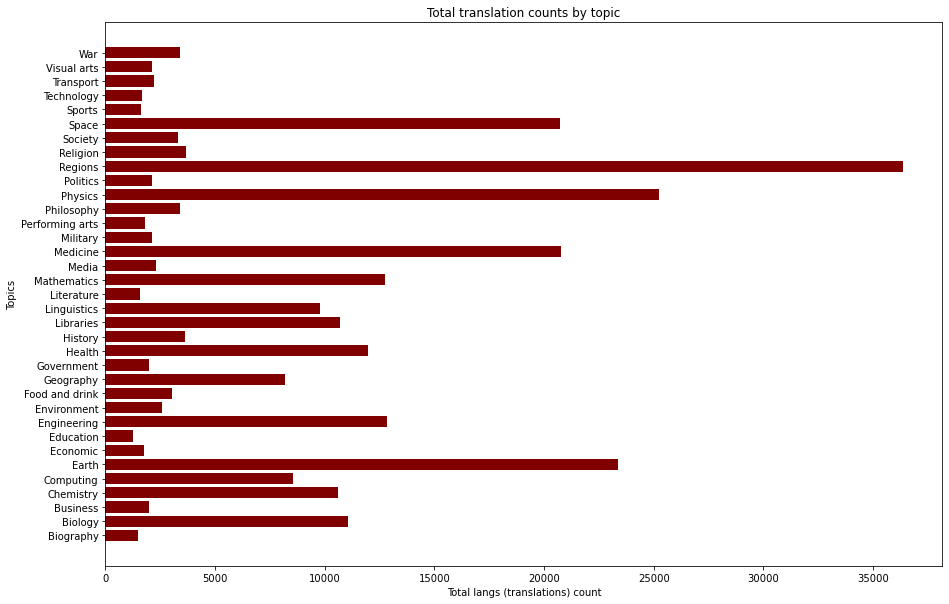

In [64]:
## Pie chart
import numpy as np
import matplotlib.pyplot as plt
 
data_pie = df.groupby(['category'])['langs_count'].sum()
courses = list(data_pie.index)
values = list(data_pie.values)

fig = plt.figure(figsize = (15, 10))
plt.barh(courses, values, color ='maroon')     
 
plt.xlabel("Total langs (translations) count")
plt.ylabel("Topics")
plt.title("Total translation counts by topic")
plt.show()

In [ ]:
grp = df.groupby('category')
grp.describe().reset_index()

### Mean by category/topic

Mean is the average of all of the numbers. The disadvantage of the mean is that big numbers will greatly affect the final
results, and it is harder to predict what is the "common" number of translations it gets.

In [ ]:
display(df.groupby('category').mean(numeric_only=True).reset_index(0))

### Median by category/topic

A median is a value separating the higher half from the lower half of a data sample, a population or a probability distribution. For a data set, it may be thought of as "the middle" value.


In [16]:
display(df.groupby('category').median(numeric_only=True).reset_index(0))

,category,langs_count
0,Biography,2.0
1,Biology,54.0
2,Business,1.0
3,Chemistry,63.0
4,Computing,35.0
5,Earth,90.0
6,Economic,1.0
7,Education,1.0
8,Engineering,40.0
9,Environment,2.5


### Mode by category/topic

The mode of a set of data values is the value that appears most often. The disadvantage of using the mode is that we get 
an absolute number, where the category may be getting something in a particular range. Such that, 4 (translations per article)  has 6 counts (appeareances), but 3 and 5 (translations per articles) appear 5 and 4 times respectively.  


In [17]:
df.groupby(['category'])['langs_count'].agg(pd.Series.mode)

category
Biography                              0
Biology                     [35, 47, 84]
Business                               0
Chemistry          [33, 62, 67, 69, 130]
Computing                        [4, 18]
Earth                                 15
Economic                               0
Education                              0
Engineering                            1
Environment                            0
Food and drink                         0
Geography                              0
Government                             0
Health                                57
History                                0
Libraries                             31
Linguistics                            1
Literature                             0
Mathematics                           16
Media                                  0
Medicine                              44
Military                               0
Performing arts                        0
Philosophy                             0
Physics

### Categorize and group according to ranges


- __<= 4__: low
- __<= 7__: medium
- __> 7__: high

In [18]:
from enum import Enum

# we are defining categories and benchmarks to group articles
class TranslationsCategory(Enum):
    LOW = 4
    MEDIUM = 7     
    HIGH = 7
    

In [19]:
df['status'] = df.apply(lambda row: "low" if (row.langs_count <= TranslationsCategory.LOW.value)
                                      else "medium" if (row.langs_count <= TranslationsCategory.MEDIUM.value) 
                                      else "high", axis = 1)


df

,title,pageid,langs_count,category,status
0,Ngerak_Florencio,46723233,1,Biography,low
1,Mario-Philippe_Losembe,54306622,1,Biography,low
2,Olivier_Megaton,28372980,15,Biography,high
3,Jen_and_Sylvia_Soska,32595745,6,Biography,medium
4,Yuka_Ebihara,54576698,1,Biography,low
...,...,...,...,...,...
12112,Laws_of_War_on_Land_(Oxford_1880),72172500,0,War,low
12113,Memorial_against_war_and_fascism,63083258,6,War,medium
12114,Beatrice_Wood,168787,17,War,high
12115,R._C._Sherriff,1298107,13,War,high


In [24]:

status_by_category = df.groupby('category')['status'].value_counts()

display(status_by_category)


sum(status_by_category['Biography'].values)

category     status
Biography    low       300
             high       51
             medium     36
Biology      high      166
             low         4
                      ... 
Visual arts  high       69
             medium     30
War          low       246
             high      104
             medium     35
Name: status, Length: 104, dtype: int64

387

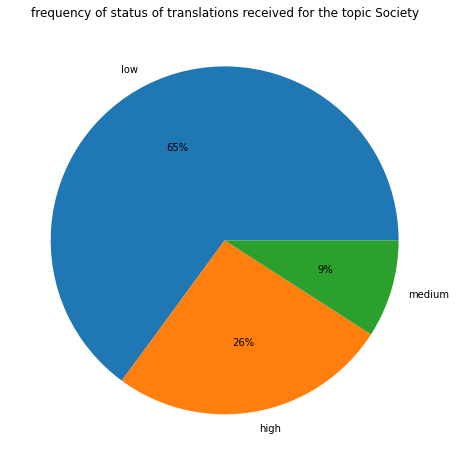

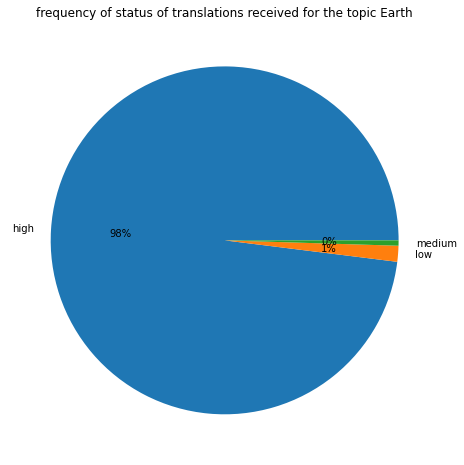

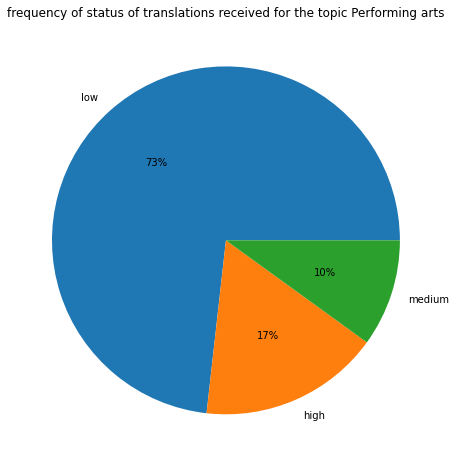

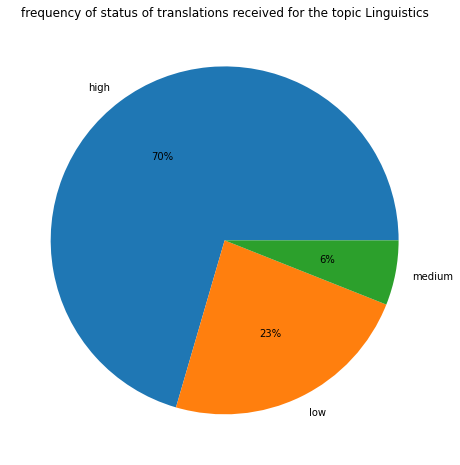

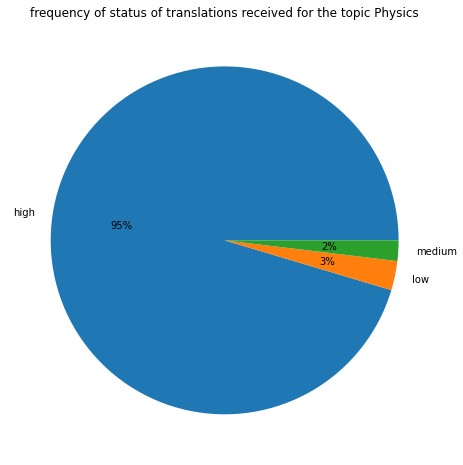

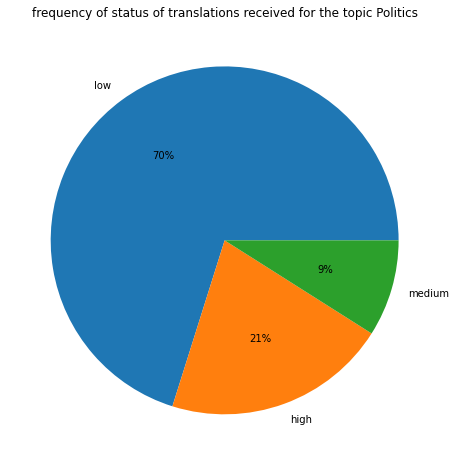

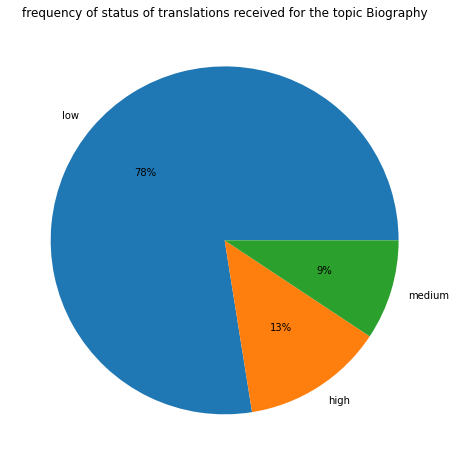

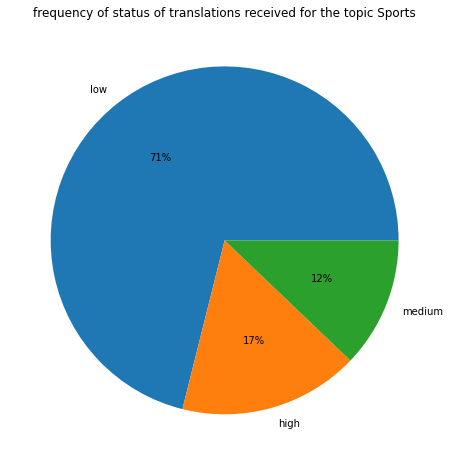

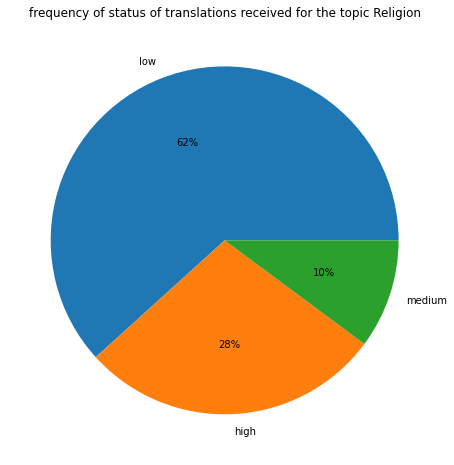

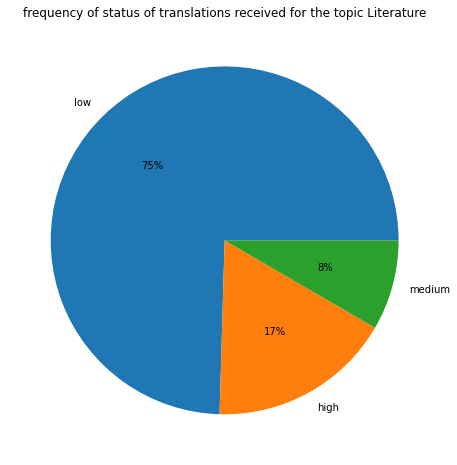

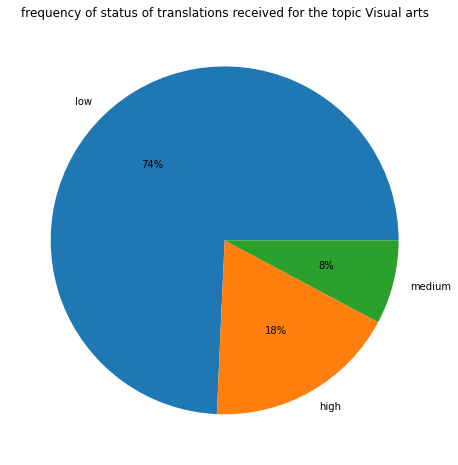

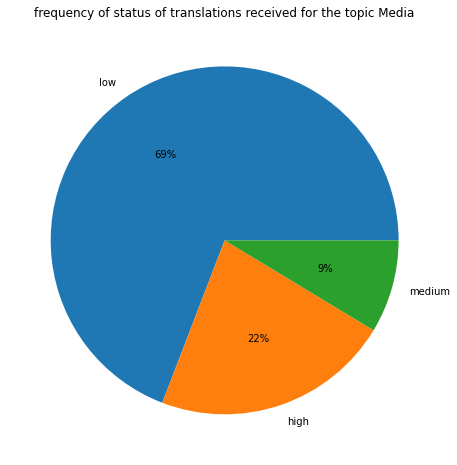

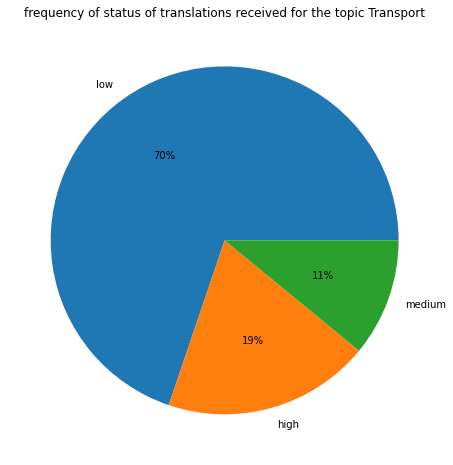

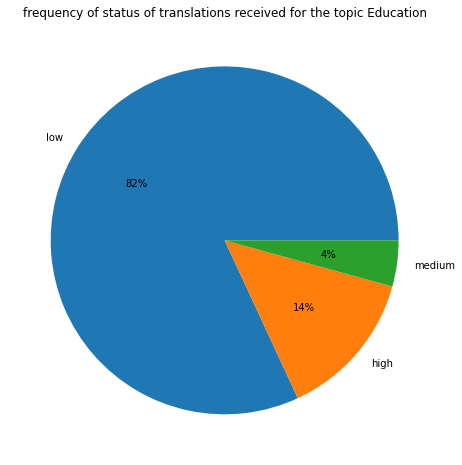

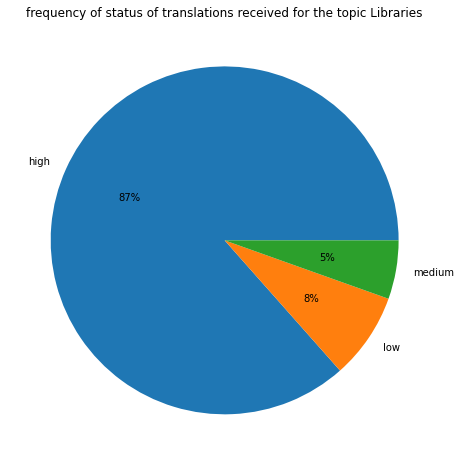

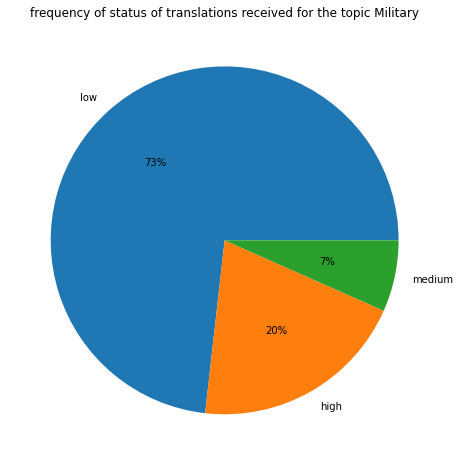

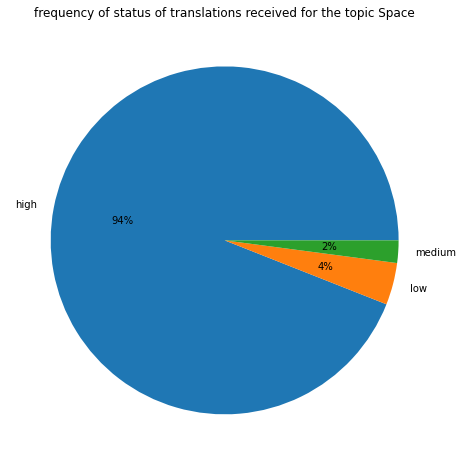

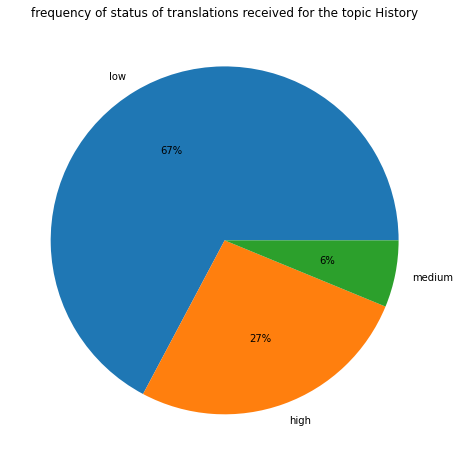

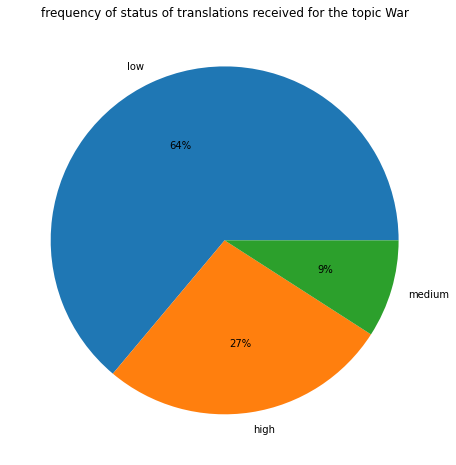

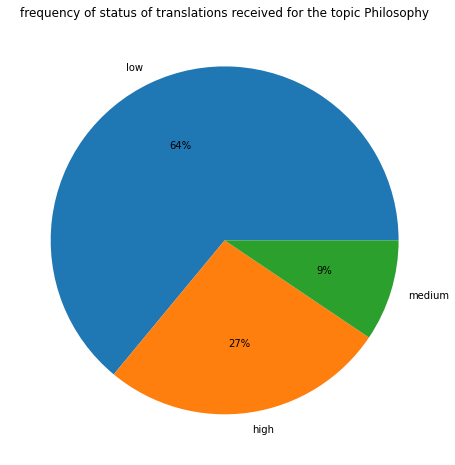

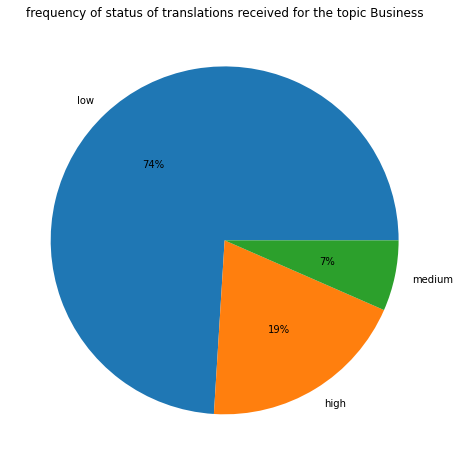

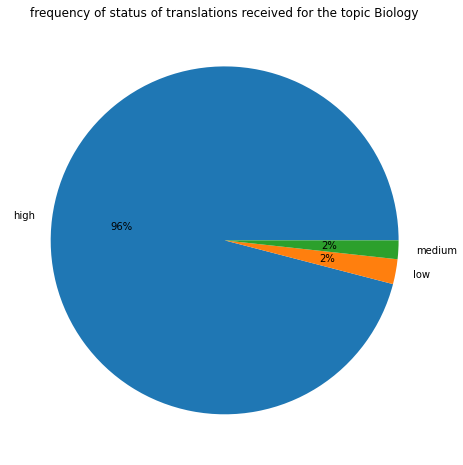

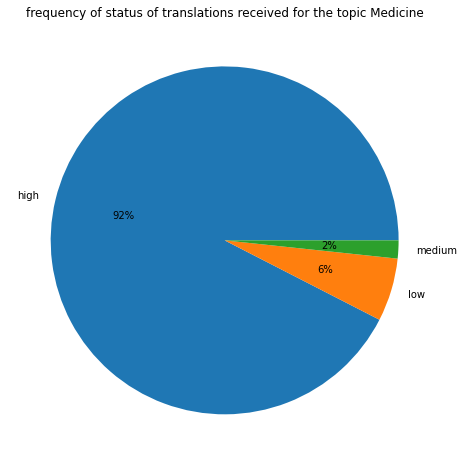

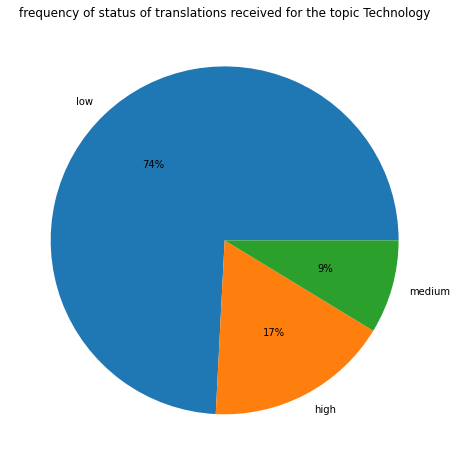

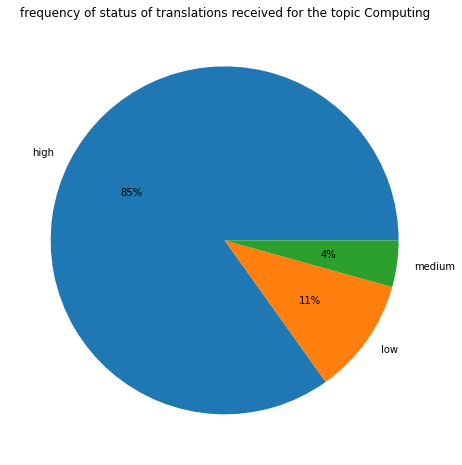

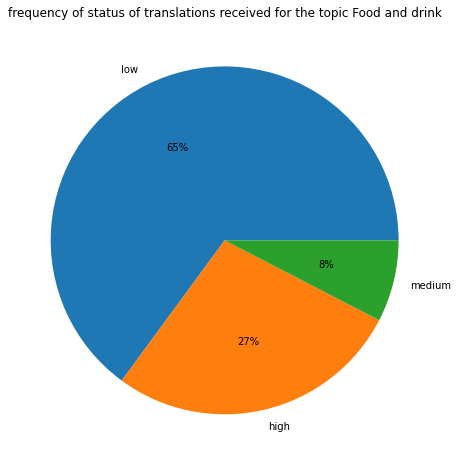

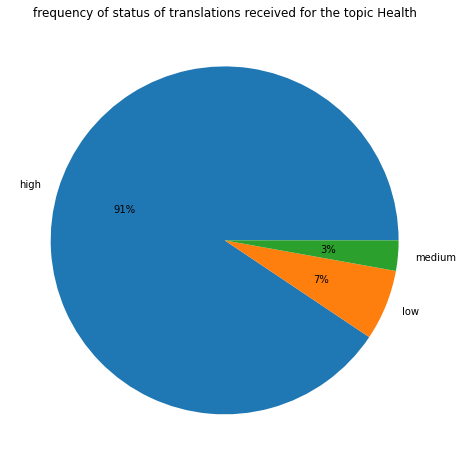

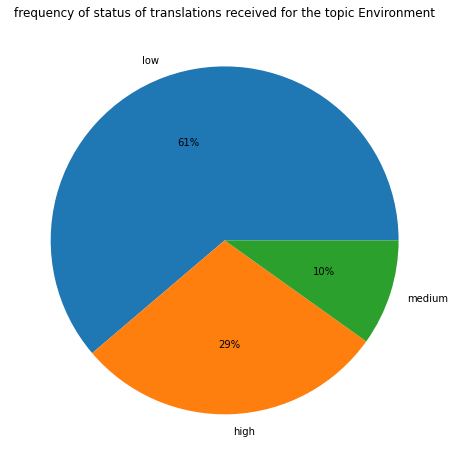

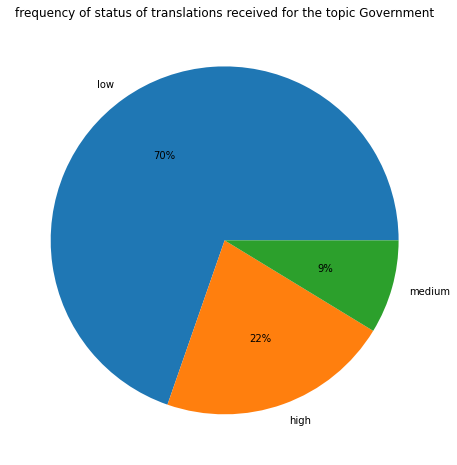

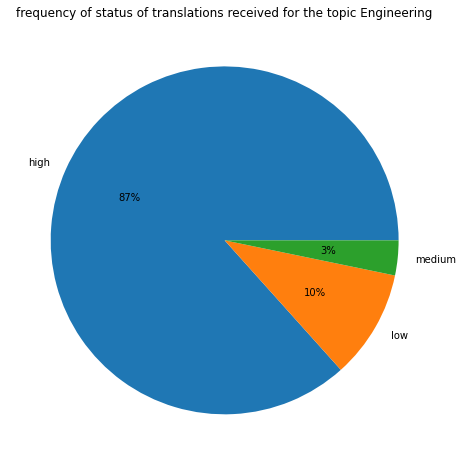

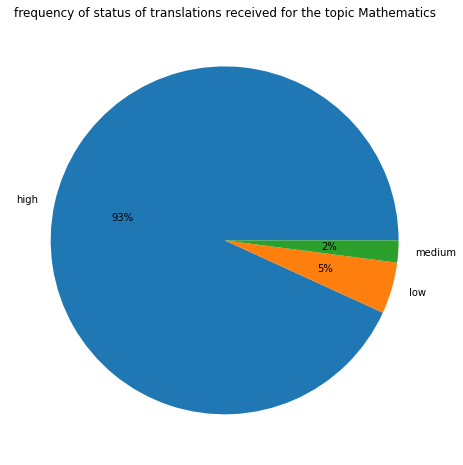

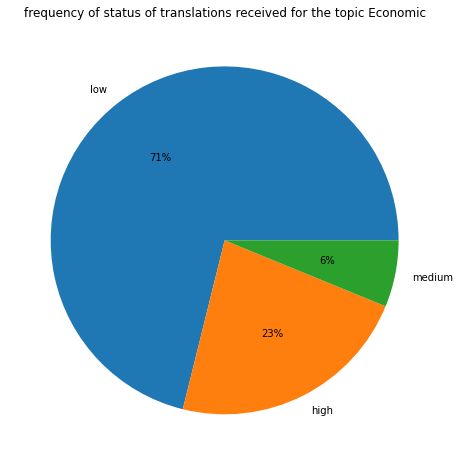

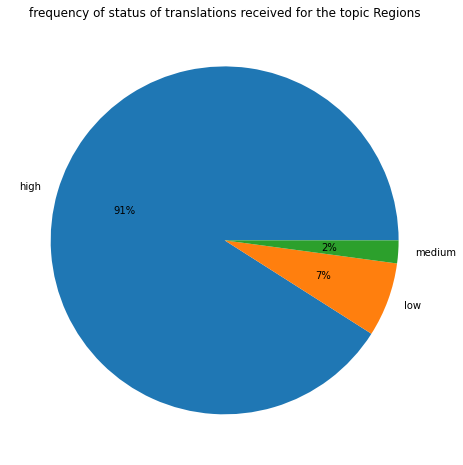

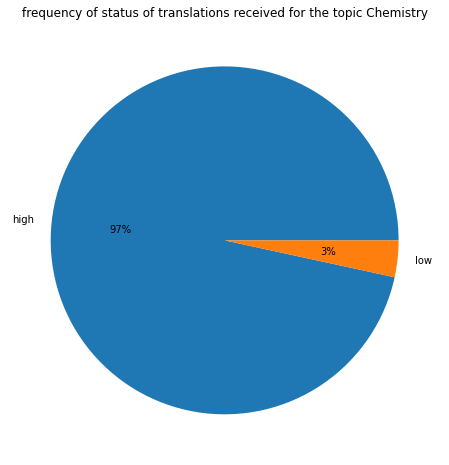

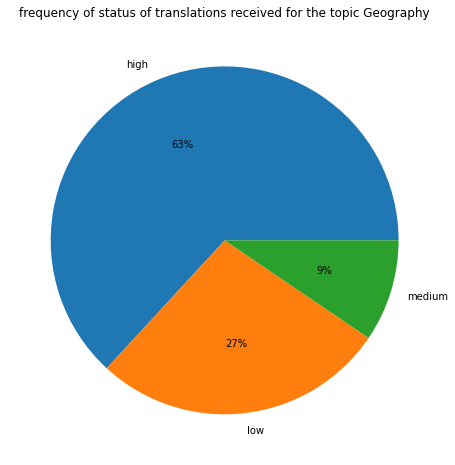

In [27]:
## Show distribution by specific language level

categories_status = set(status_by_category.index.get_level_values(0))
for label in categories_status:
    data = status_by_category[label]
    
    values = data.values.tolist()
    labels = data.index.tolist()
    
    plt.rcParams["figure.figsize"] = (20,8)
    plt.title(f'frequency of status of translations received for the topic {label}')
    plt.pie(values, labels=labels, autopct='%.0f%%')
    plt.show()
    

In [112]:
# NOTE/TODO: we could use these values to show, by status label (low, medium, high) 
# and the percentage it represents from the total of that category
# how each category/topic relate to one another 

display(status_by_category.index)
display(status_by_category.values)

MultiIndex([(  'Biography',    'low'),
            (  'Biography',   'high'),
            (  'Biography', 'medium'),
            (    'Biology',   'high'),
            (    'Biology',    'low'),
            (    'Biology', 'medium'),
            (   'Business',    'low'),
            (   'Business',   'high'),
            (   'Business', 'medium'),
            (  'Chemistry',   'high'),
            ...
            ( 'Technology', 'medium'),
            (  'Transport',    'low'),
            (  'Transport',   'high'),
            (  'Transport', 'medium'),
            ('Visual arts',    'low'),
            ('Visual arts',   'high'),
            ('Visual arts', 'medium'),
            (        'War',    'low'),
            (        'War',   'high'),
            (        'War', 'medium')],
           names=['category', 'status'], length=104)

array([300,  51,  36, 166,   4,   3, 282,  74,  25, 142,   5, 157,  20,
         8, 199,   3,   1, 207,  66,  18, 249,  42,  13, 214,  25,   8,
       180,  85,  29, 248, 105,  29, 233, 101,  35, 232,  72,  29, 193,
        14,   6, 238,  94,  22, 270,  25,  17, 246,  82,  21, 240,  55,
        27, 273,  14,   6, 240,  77,  30, 331,  21,   6, 276,  76,  25,
       257,  59,  35, 224,  93,  33, 351,  10,   7, 242,  72,  31, 343,
        26,   8, 237, 108,  39, 250, 100,  35, 361,  15,   8, 246,  58,
        42, 273,  63,  32, 268,  74,  42, 286,  69,  30, 246, 104,  35],
      dtype=int64)

In [60]:
display(status_by_category['Literature'])

status
low       240
high       55
medium     27
Name: status, dtype: int64

In [69]:
print(categories_status)
print(list(categories_status))

{'Society', 'Earth', 'Performing arts', 'Linguistics', 'Physics', 'Politics', 'Biography', 'Sports', 'Religion', 'Literature', 'Visual arts', 'Media', 'Transport', 'Education', 'Libraries', 'Military', 'Space', 'History', 'War', 'Philosophy', 'Business', 'Biology', 'Medicine', 'Technology', 'Computing', 'Food and drink', 'Health', 'Environment', 'Government', 'Engineering', 'Mathematics', 'Economic', 'Regions', 'Chemistry', 'Geography'}
['Society', 'Earth', 'Performing arts', 'Linguistics', 'Physics', 'Politics', 'Biography', 'Sports', 'Religion', 'Literature', 'Visual arts', 'Media', 'Transport', 'Education', 'Libraries', 'Military', 'Space', 'History', 'War', 'Philosophy', 'Business', 'Biology', 'Medicine', 'Technology', 'Computing', 'Food and drink', 'Health', 'Environment', 'Government', 'Engineering', 'Mathematics', 'Economic', 'Regions', 'Chemistry', 'Geography']


In [62]:
## Prepare data to provide a final answer to the research question
low_values = []
medium_values = []
high_values = []

for label_ in categories_status:
    # get values
    total = sum(status_by_category[label_].values)
    low = status_by_category[label_].get('low', 0.0)
    medium = status_by_category[label_].get('medium', 0.0)
    high = status_by_category[label_].get('high', 0.0)
    
    # transform to percentages so that they can be compared to others, add values to list
    low_values.append(low/total)
    medium_values.append(medium/total)
    high_values.append(high/total)
    

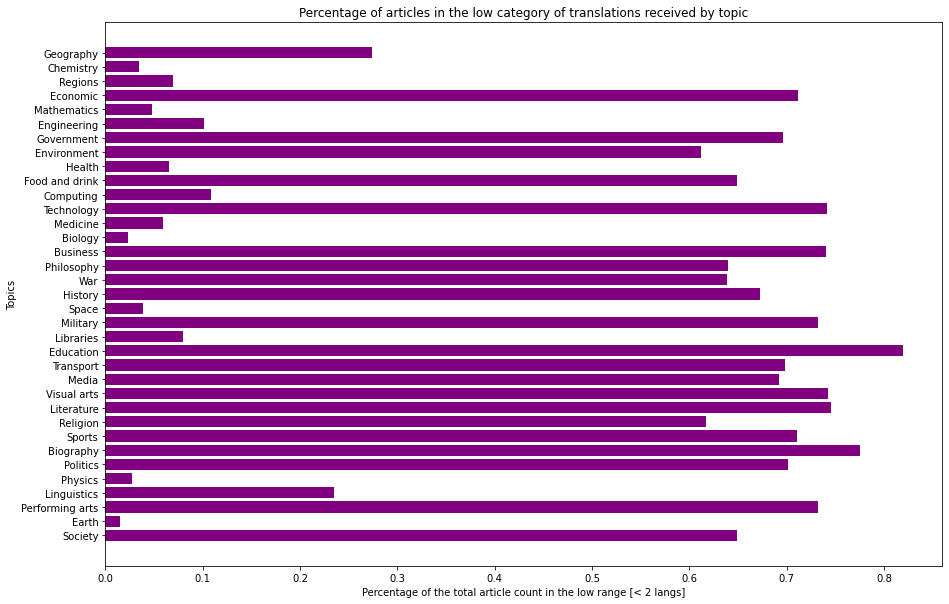

In [86]:
## Display results

## Low range
index =  list(categories_status)
values = low_values

fig = plt.figure(figsize = (15, 10))
plt.barh(index, values, color ='purple')     
 
plt.xlabel("Percentage of the total article count in the low range [< 2 langs]")
plt.ylabel("Topics")
plt.title("Percentage of articles in the low category of translations received by topic")
plt.show()



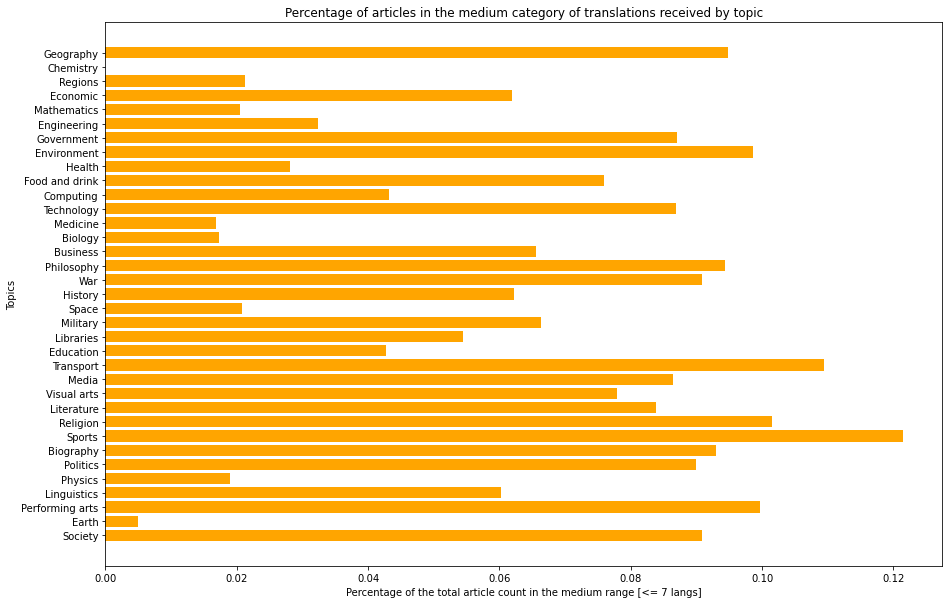

In [88]:
## Display results

## medium range
index =  list(categories_status)
values = medium_values

fig = plt.figure(figsize = (15, 10))
plt.barh(index, values, color ='orange')     
 
plt.xlabel("Percentage of the total article count in the medium range [<= 7 langs]")
plt.ylabel("Topics")
plt.title("Percentage of articles in the medium category of translations received by topic")
plt.show()

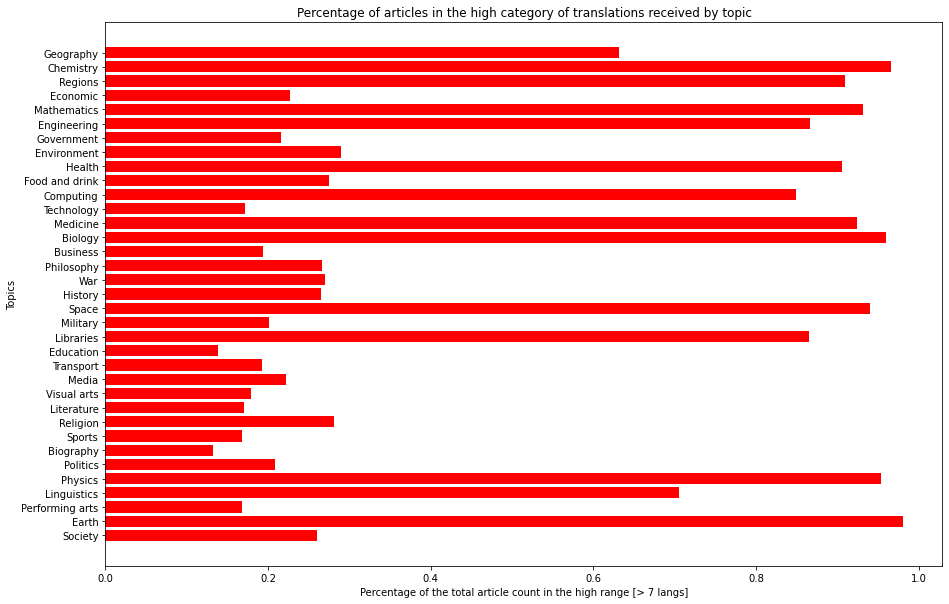

In [87]:
## Display results

## high range
index =  list(categories_status)
values = high_values

fig = plt.figure(figsize = (15, 10))
plt.barh(index, values, color ='red')     
 
plt.xlabel("Percentage of the total article count in the high range [> 7 langs]")
plt.ylabel("Topics")
plt.title("Percentage of articles in the high category of translations received by topic")
plt.show()

### 6. Explore further the groups of languages being translated and their pairs [optional]

In [1]:
#### English

In [ ]:
#### Czech

In [ ]:
#### Arabic

In [ ]:
#### Korean